<a href="https://colab.research.google.com/github/BhanuSrihridai/Promilo_BA/blob/main/Promilo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

import warnings
warnings.filterwarnings("ignore")

## Loading the data set

In [2]:
data=pd.read_excel("Promilo_BA.xlsx")
# data.head()

## Getting the list of sheets in the dataset

In [3]:
ex_Book=pd.ExcelFile("Promilo_BA.xlsx")
sheets=ex_Book.sheet_names
sheets

['Report Snapshot',
 'User Acquisition',
 'Traffic Aquisition',
 'Event Report',
 'Conversion Report',
 'Pages & Screens Report',
 'Retention Overview',
 'User Engagement Overview',
 'Demographics Report',
 'Citywise Report',
 'Gender Report',
 'User By Interest',
 'User by Language',
 'User By Age',
 'Google Ads Report']

## Exploring each sheet

### 1. Report Snapshot

In [7]:
data_report_snap=pd.read_excel("Promilo_BA.xlsx",sheet_name='Report Snapshot')

In [9]:
data_report_snap

Empty DataFrame
Columns: []
Index: []

This sheet contains no data except a picture.

### 2. User Acquisition

In [12]:
data_user_aqs=pd.read_excel("Promilo_BA.xlsx",sheet_name='User Acquisition')
data_user_aqs

First user default channel group  New users  Engaged sessions  \
0                          Display       9957             12008   
1                   Organic Search       7652             18141   
2                      Paid Search       3025              4408   
3                           Direct       1903              4975   
4                       Unassigned        325              1619   
5                   Organic Social         10                13   

   Engagement rate  Engaged sessions per user  Average engagement time  \
0         0.544457                   1.206107                 58.86209   
1         0.813680                   2.367041                534.31280   
2         0.474284                   1.458154                102.23780   
3         0.318808                   2.261364               1128.88100   
4         0.813159                   4.981538                798.34150   
5         0.722222                   1.300000                145.30000   

   Event count  Conversions  Total revenue  
0       204820        37434              0  
1       770710       109801              0  
2        81997        14770              0  
3       227434        31093              0  
4        33320          789              0  
5          248           27              0

In [123]:
data_user_aqs.style.bar(cmap='icefire',height=50,width=55) # Adding internal bar charts to numerical columns for a sample of the data

In [29]:
data_user_aqs.shape

(6, 9)

In [42]:
data_user_aqs.describe().T

count           mean            std         min  \
New users                    6.0    3812.000000    4083.739659   10.000000   
Engaged sessions             6.0    6860.666667    6894.604867   13.000000   
Engagement rate              6.0       0.614435       0.201367    0.318808   
Engaged sessions per user    6.0       2.262367       1.420806    1.206107   
Average engagement time      6.0     461.322532     437.111008   58.862090   
Event count                  6.0  219754.833333  284869.104021  248.000000   
Conversions                  6.0   32319.000000   40929.227185   27.000000   
Total revenue                6.0       0.000000       0.000000    0.000000   

                                    25%            50%            75%  \
New users                    719.500000    2464.000000    6495.250000   
Engaged sessions            2316.250000    4691.500000   10249.750000   
Engagement rate                0.491827       0.633339       0.790425   
Engaged sessions per user      1.339538       1.859759       2.340622   
Average engagement time      113.003350     339.806400     732.334325   
Event count                45489.250000  143408.500000  221780.500000   
Conversions                 4284.250000   22931.500000   35848.750000   
Total revenue                  0.000000       0.000000       0.000000   

                                     max  
New users                    9957.000000  
Engaged sessions            18141.000000  
Engagement rate                 0.813680  
Engaged sessions per user       4.981538  
Average engagement time      1128.881000  
Event count                770710.000000  
Conversions                109801.000000  
Total revenue                   0.000000

In [44]:
data_user_aqs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   First user default channel group  6 non-null      object 
 1   New users                         6 non-null      int64  
 2   Engaged sessions                  6 non-null      int64  
 3   Engagement rate                   6 non-null      float64
 4   Engaged sessions per user         6 non-null      float64
 5   Average engagement time           6 non-null      float64
 6   Event count                       6 non-null      int64  
 7   Conversions                       6 non-null      int64  
 8   Total revenue                     6 non-null      int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 560.0+ bytes


In [45]:
data_user_aqs.duplicated().sum()

0

In [307]:
def columns(data):

  cols=data.columns                                              # Retreiving the columns of the data frame
  cat_cols=data.select_dtypes(include='object').columns          # Retreiving the categorical columns
  numeric_cols=data.select_dtypes(include='number').columns      # Retreiving the continuous/numerical columns
  return numeric_cols,cat_cols

In [289]:
def scatter_and_reg_plots(data,cat,x,y):

  fig,axes=plt.subplots(2,1,figsize=(15,10))
  plt.subplots_adjust(hspace=0.5)

  fig1=sns.scatterplot(data=data,x=x,y=y,hue=cat,palette='magma',ax=axes[0]).set_title(f"Scatter plot of {x} vs {y}",fontweight='bold',fontsize=20)
  fig2=sns.regplot(data=data,x=x,y=y,color='orange',scatter_kws={"facecolors": "blue",'s':50,'edgecolor':'blue'},ax=axes[1]).set_title(f"Regression plot of {x} & {y}",fontweight='bold',fontsize=20)



In [ ]:
numeric_cols,cat_cols=columns(data_user_aqs)
combis=list(combinations(numeric_cols,2))
combis

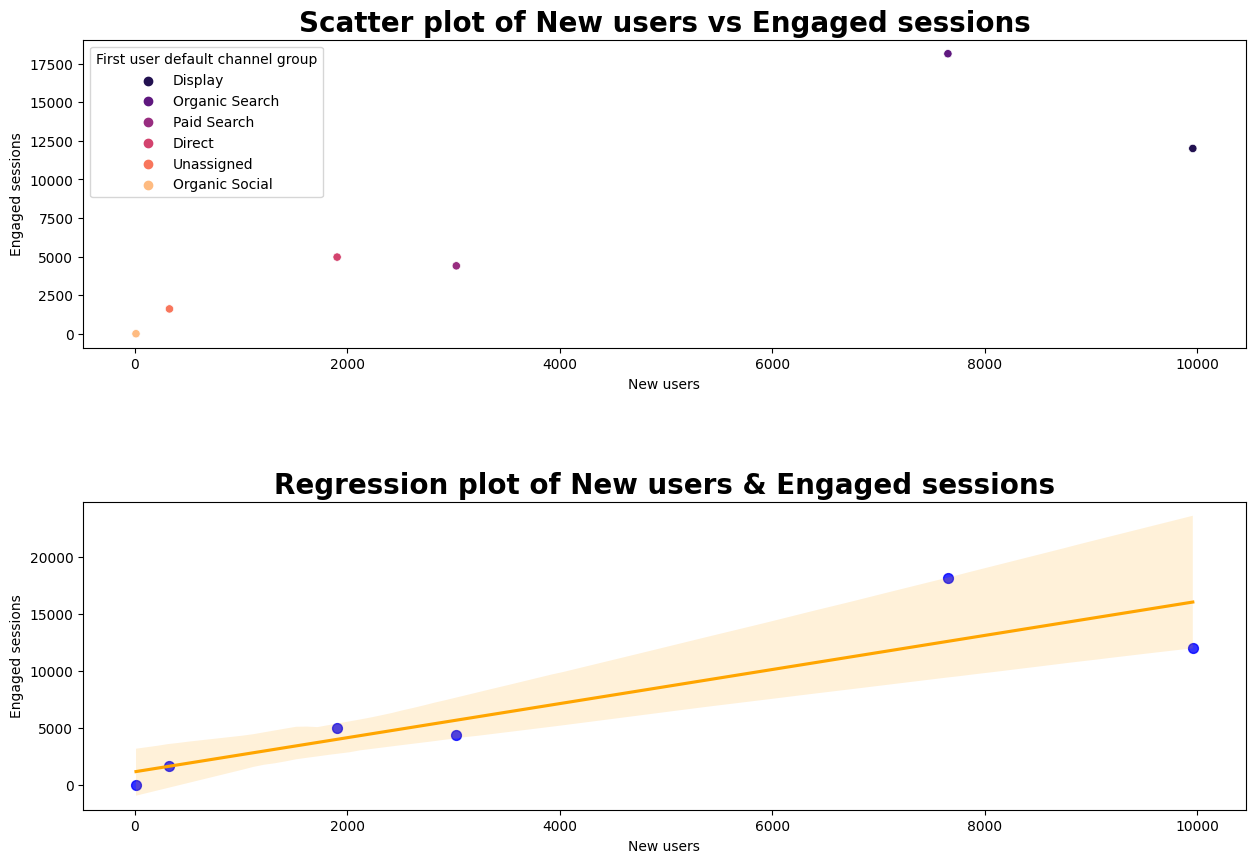

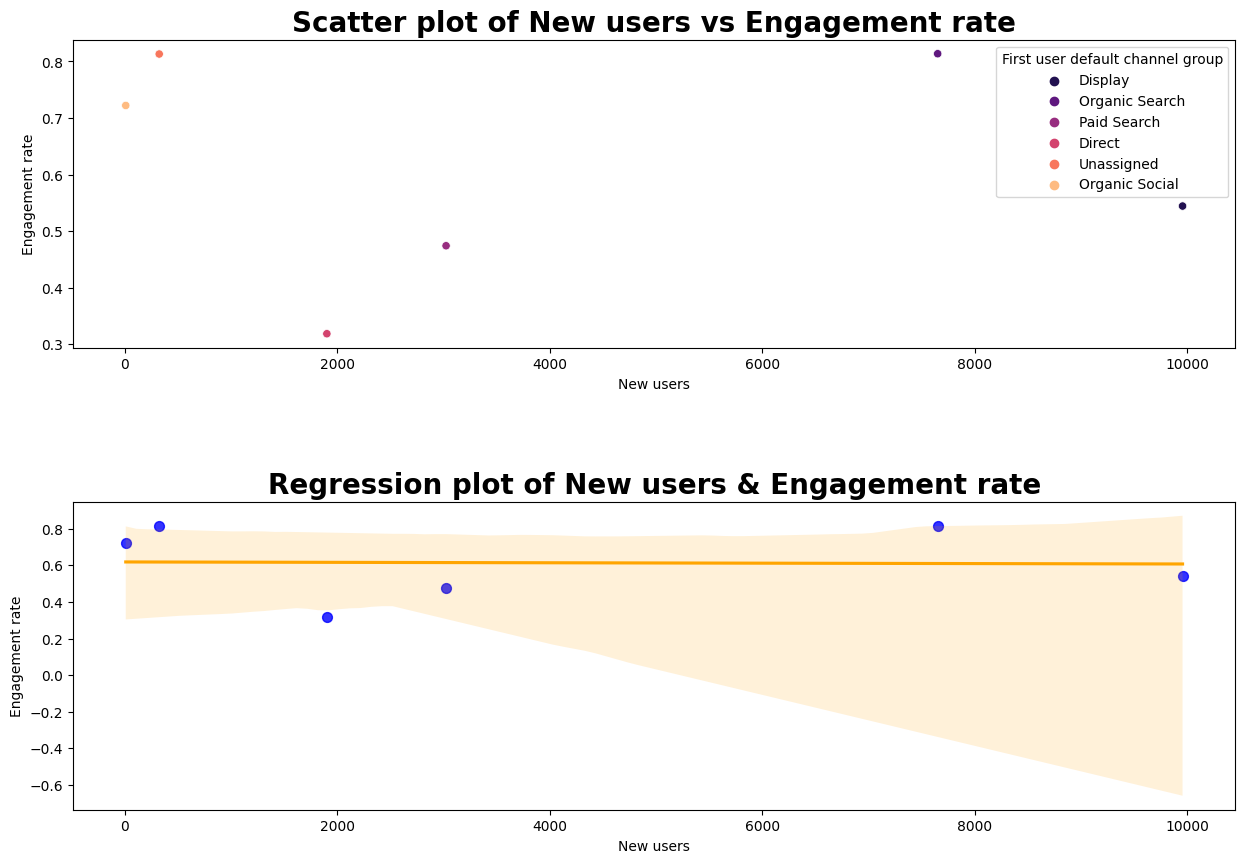

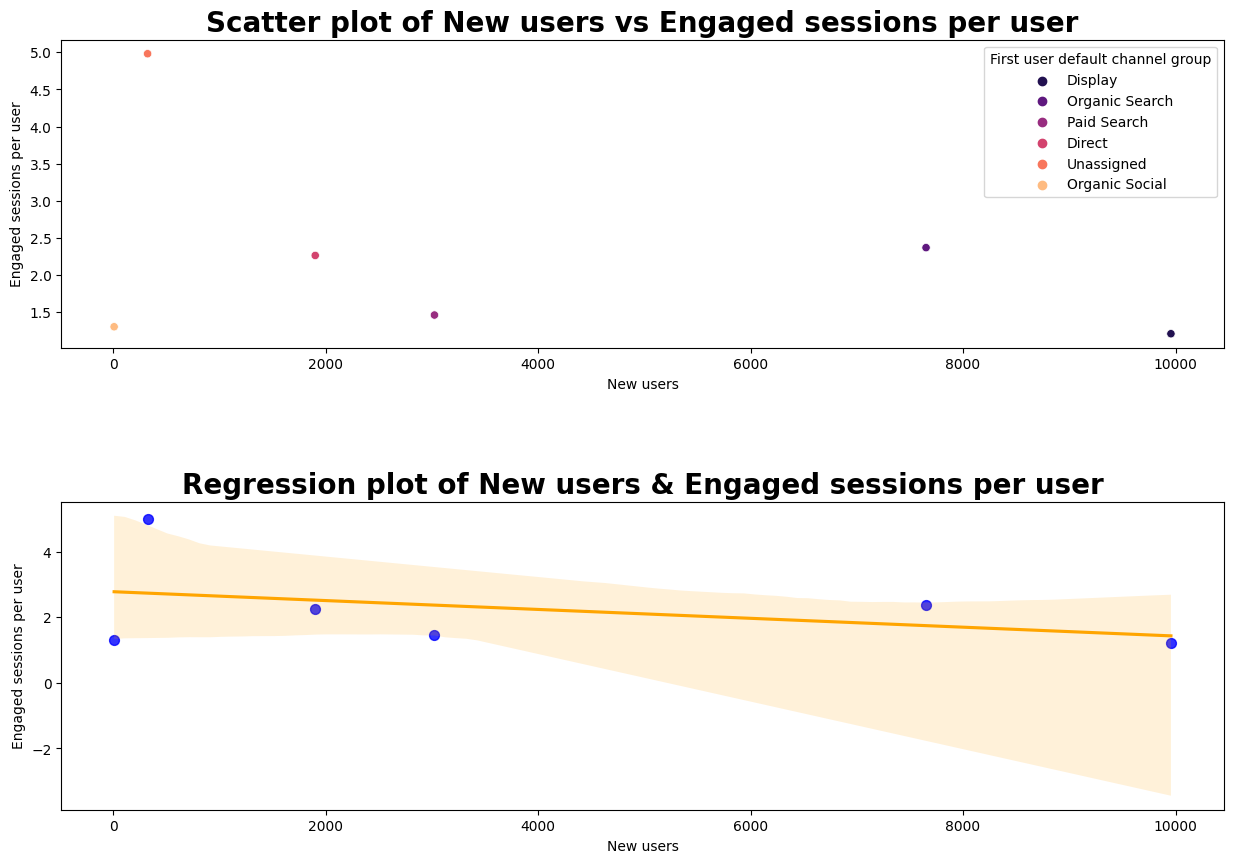

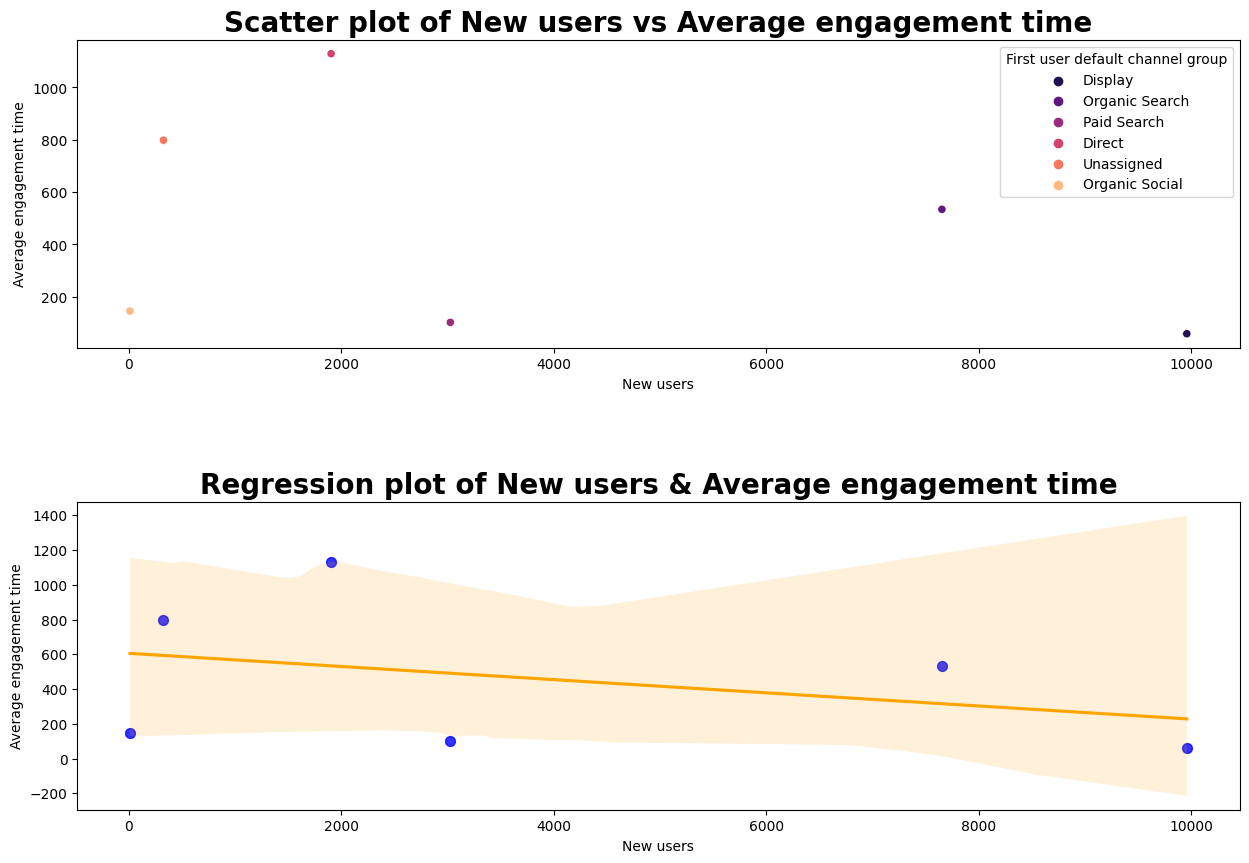

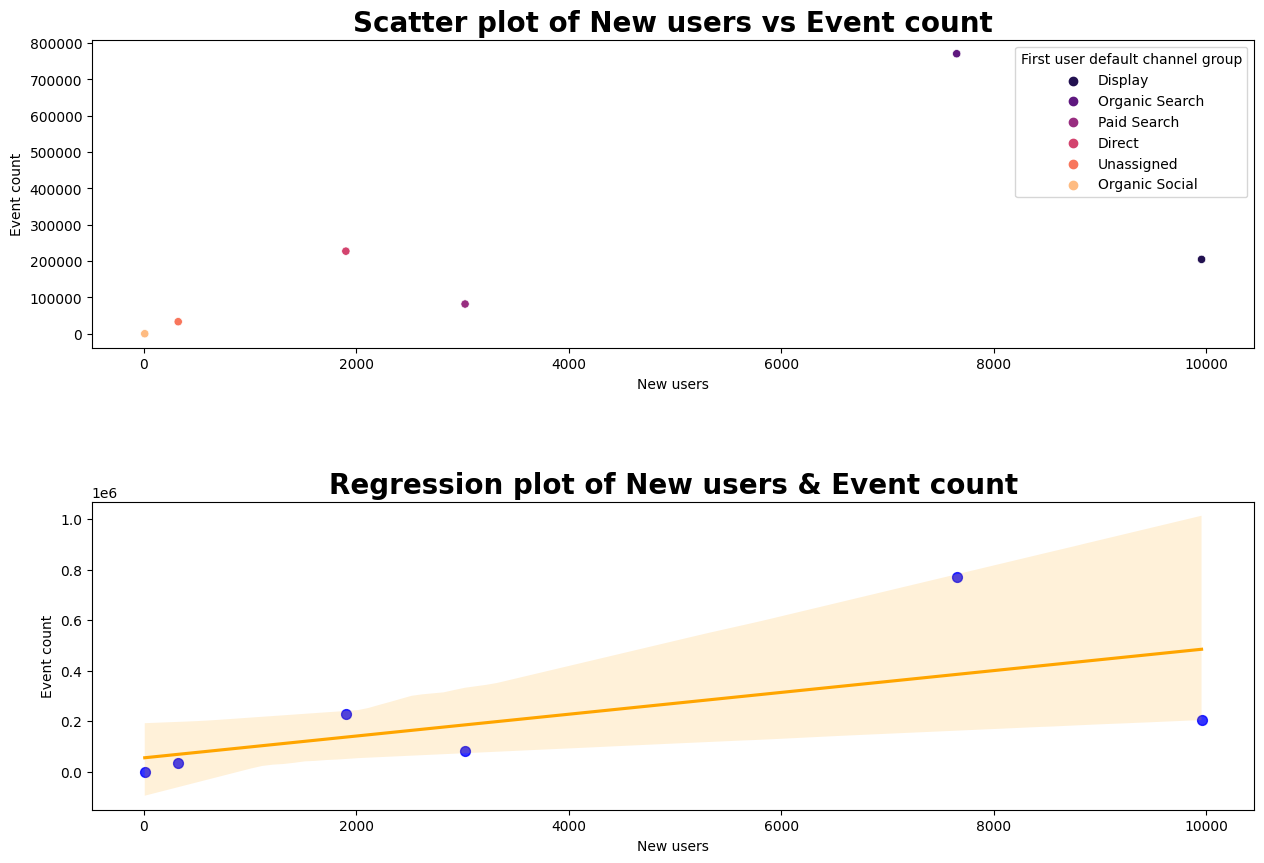

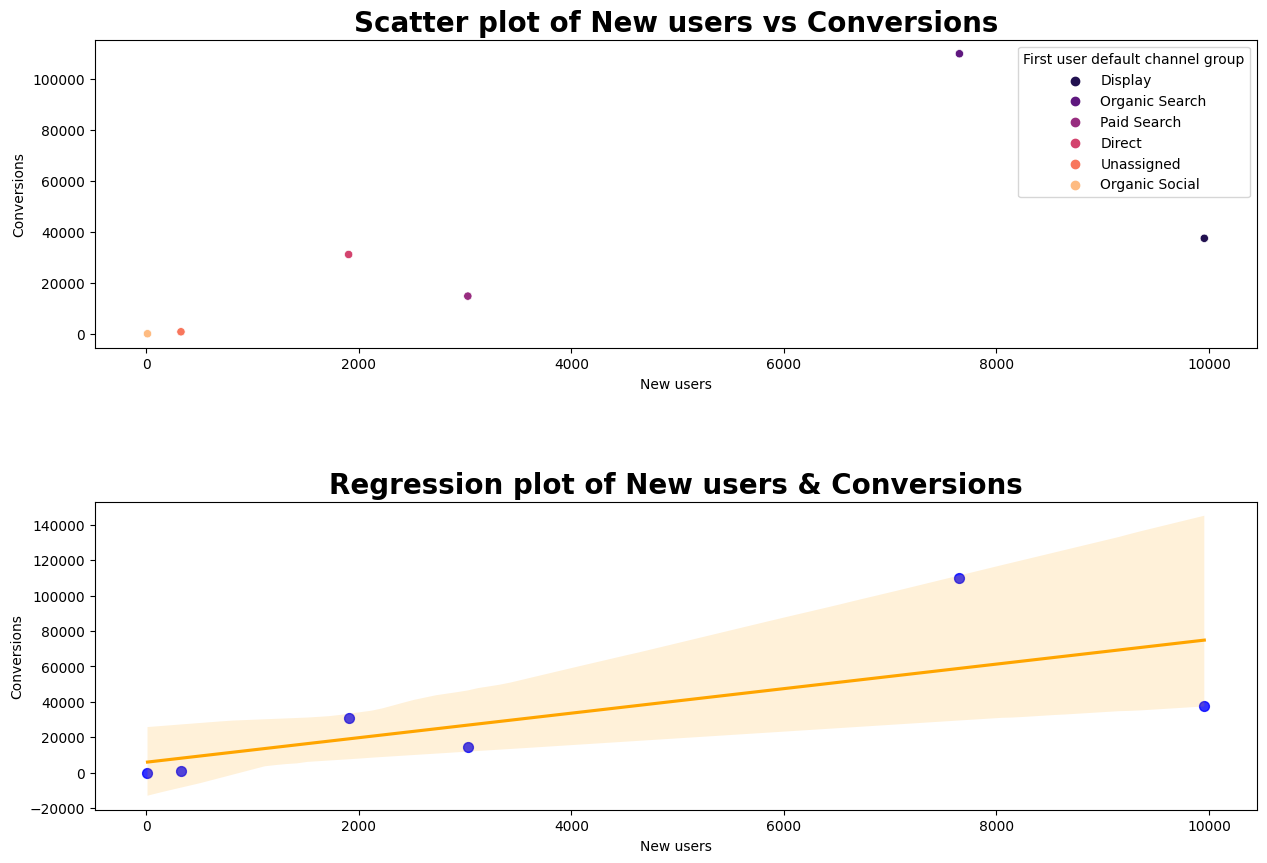

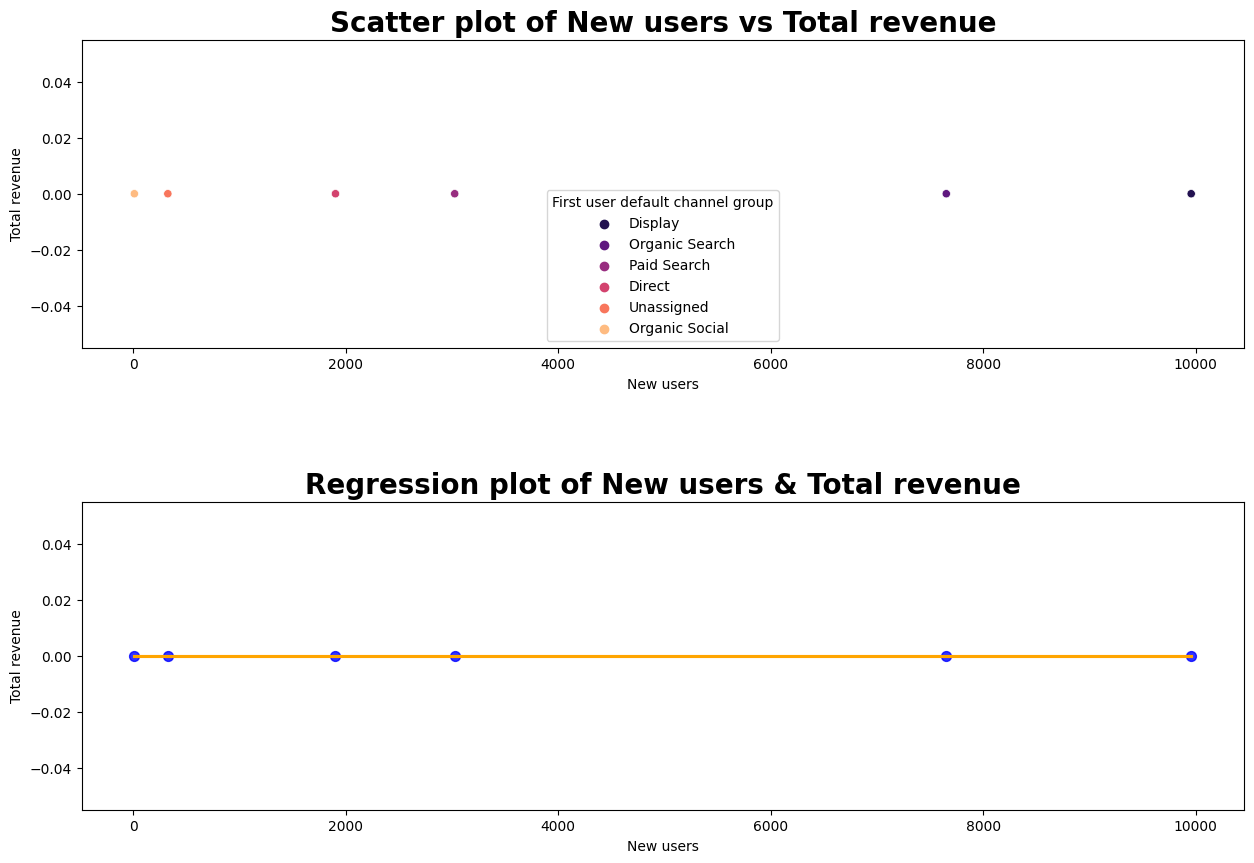

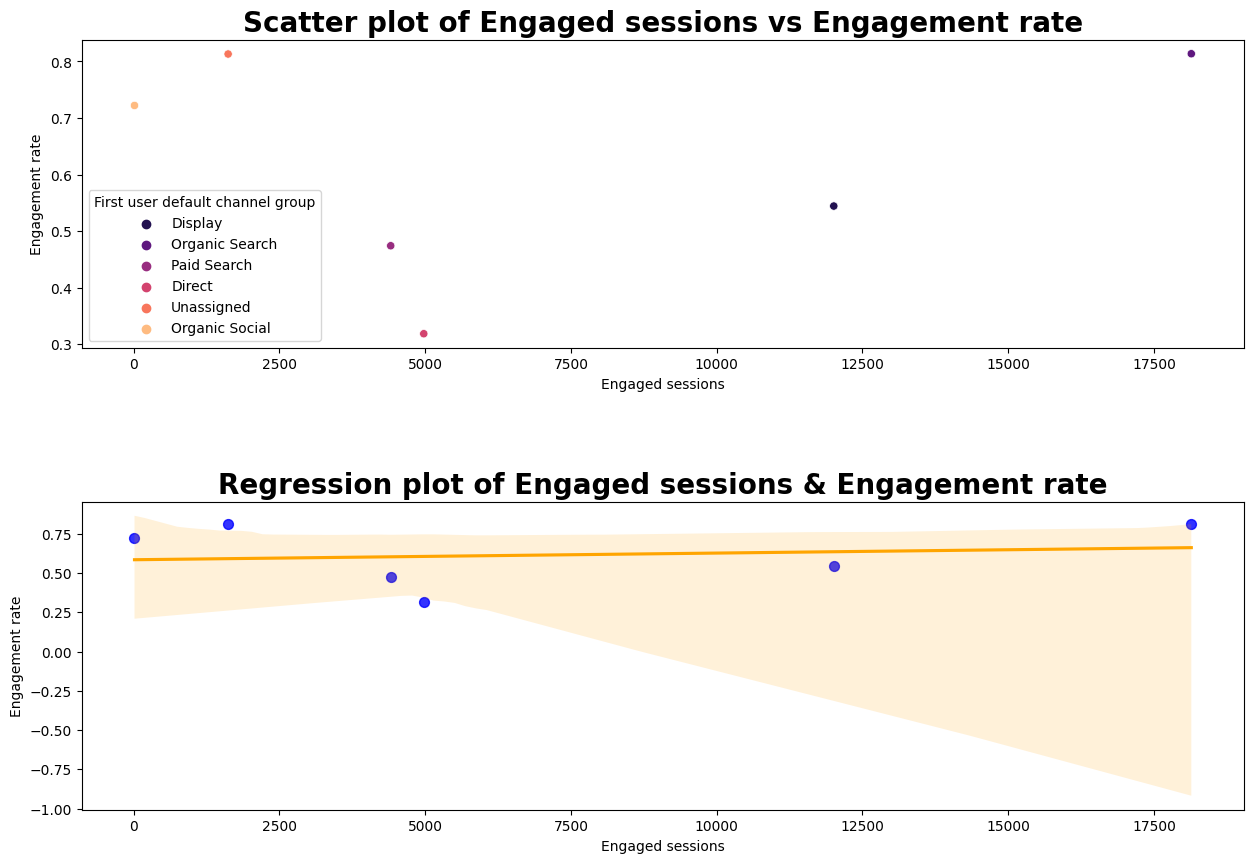

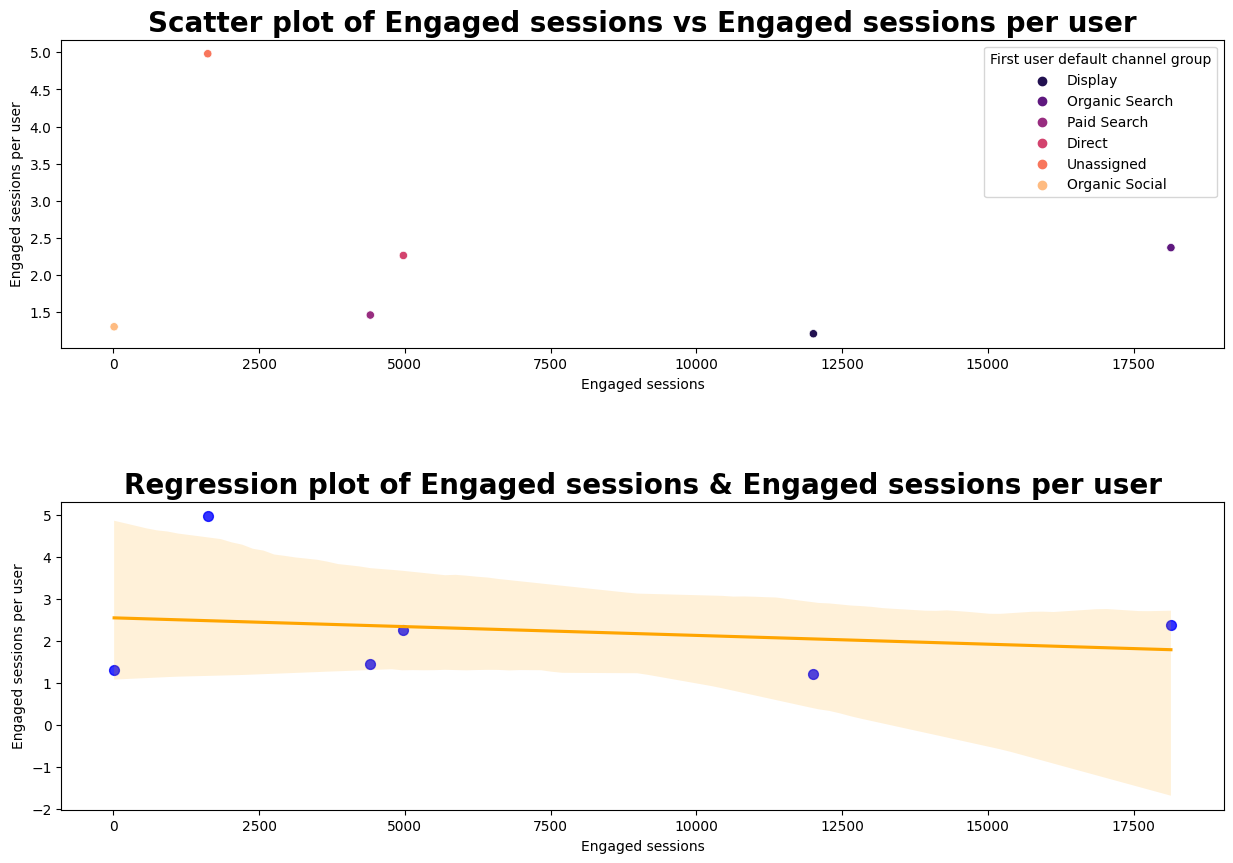

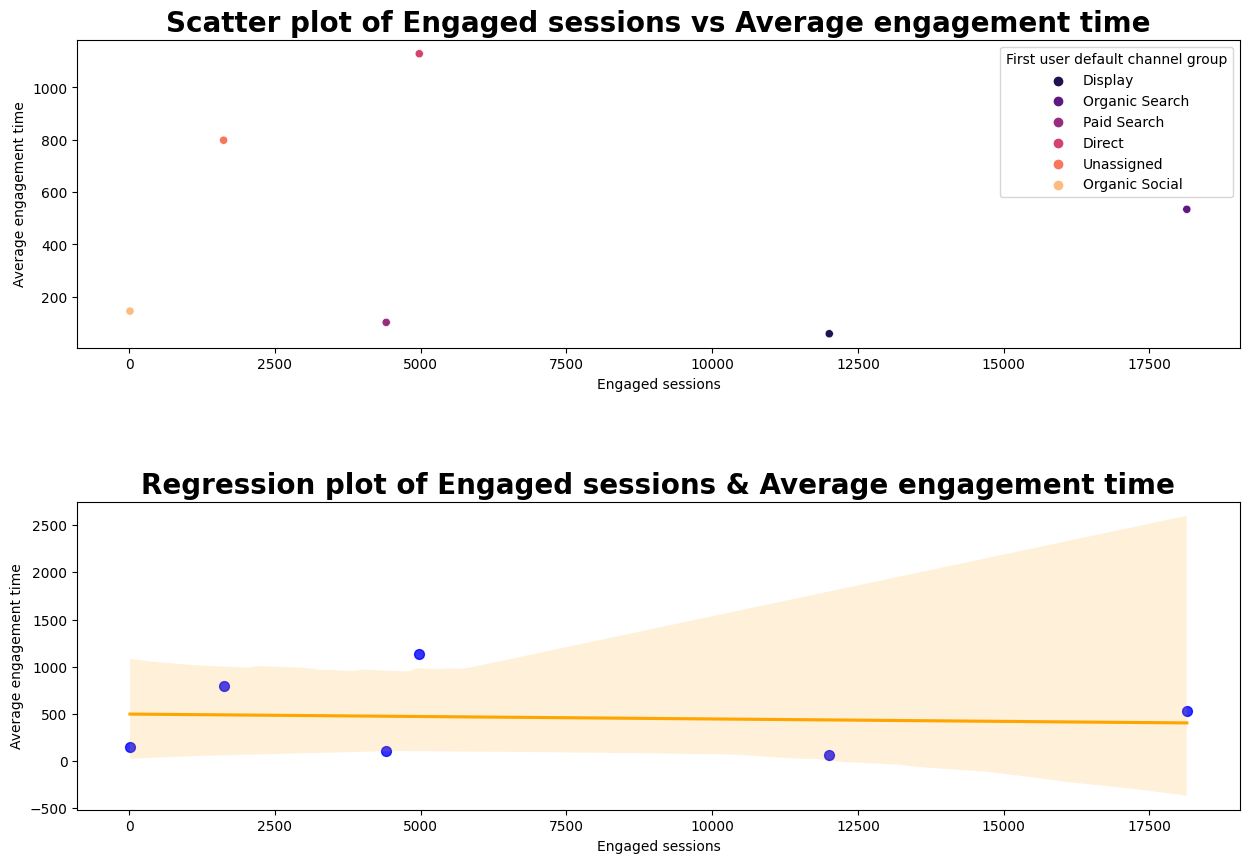

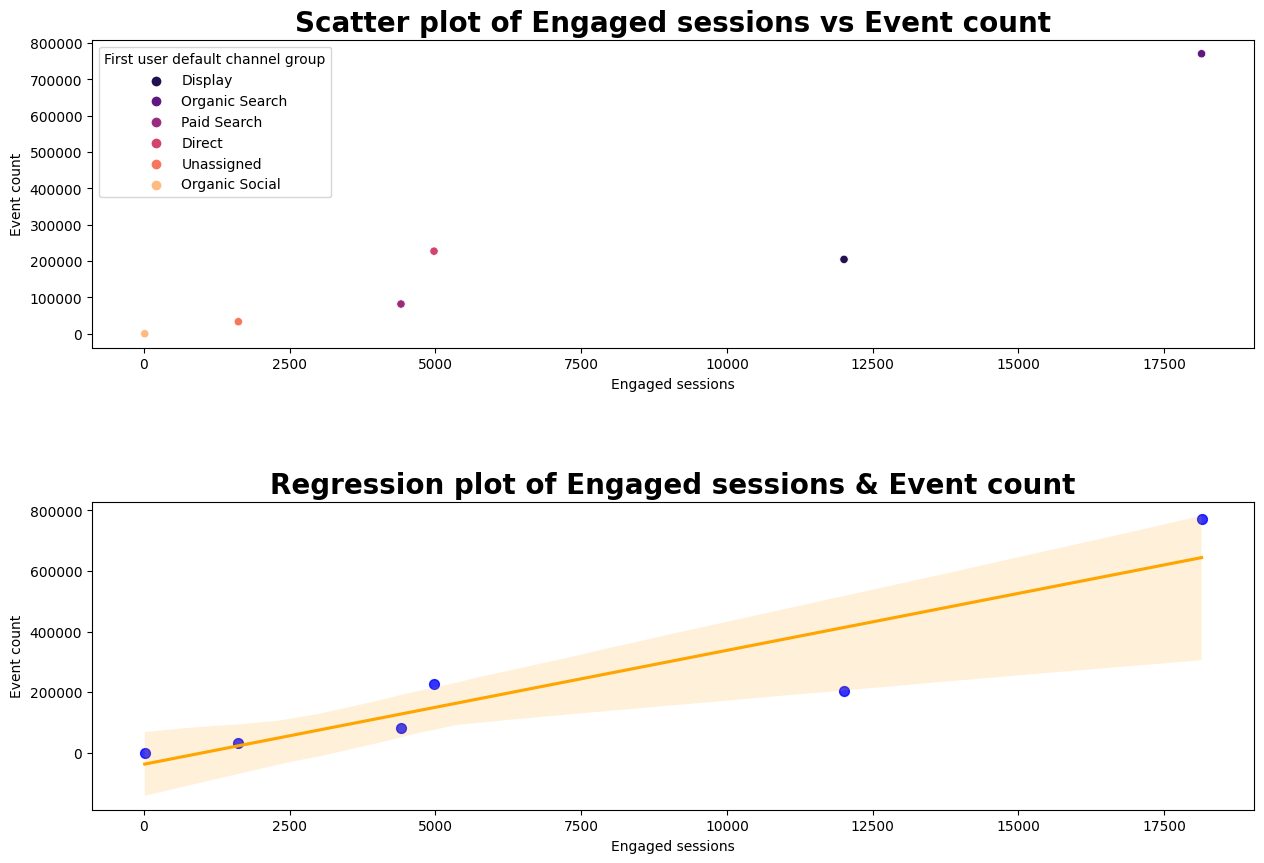

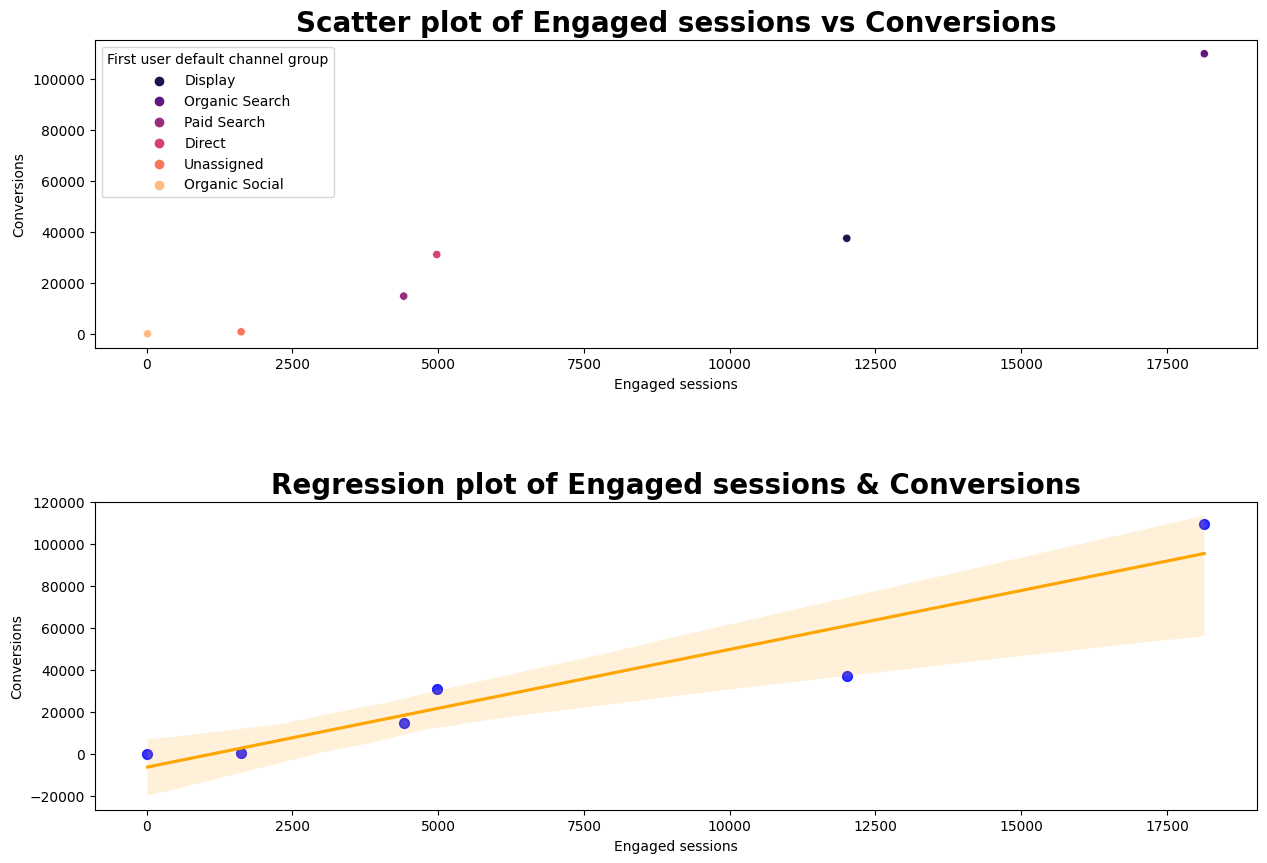

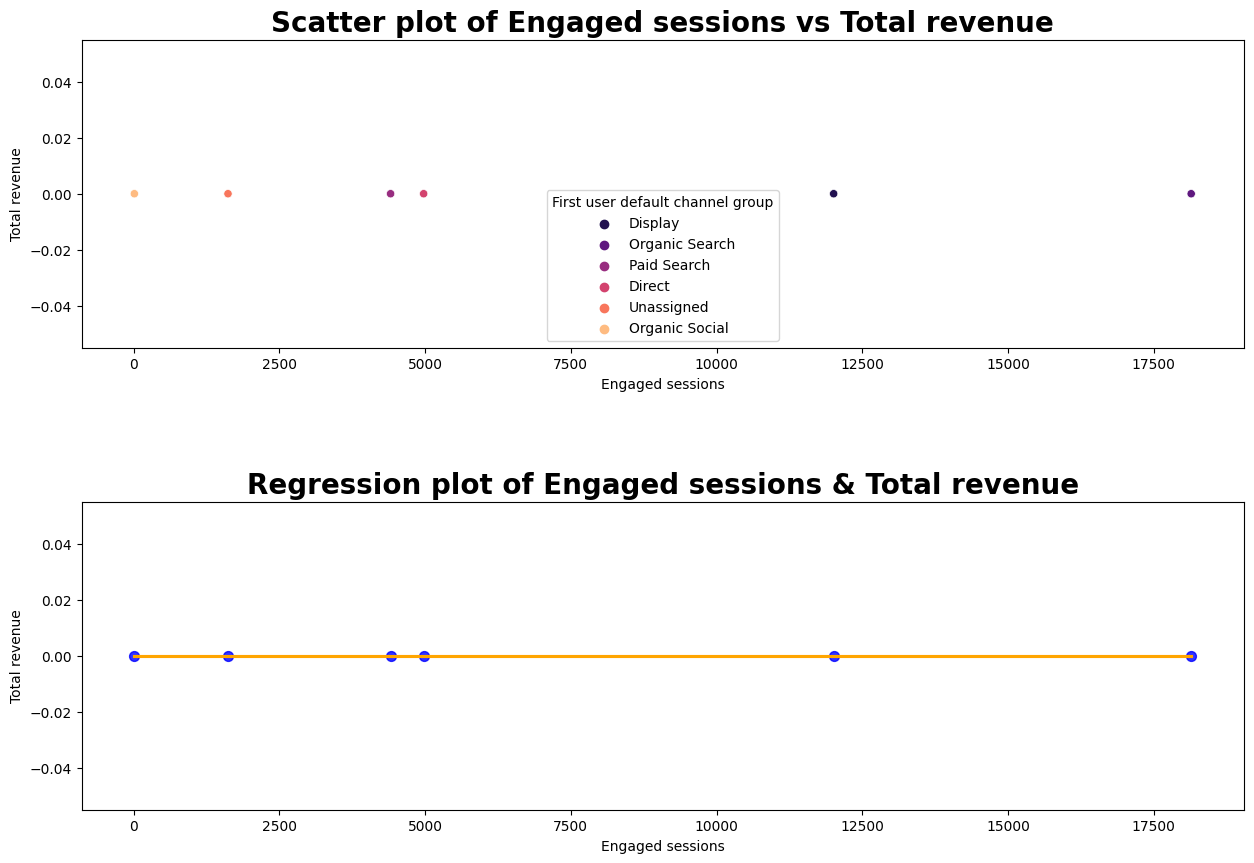

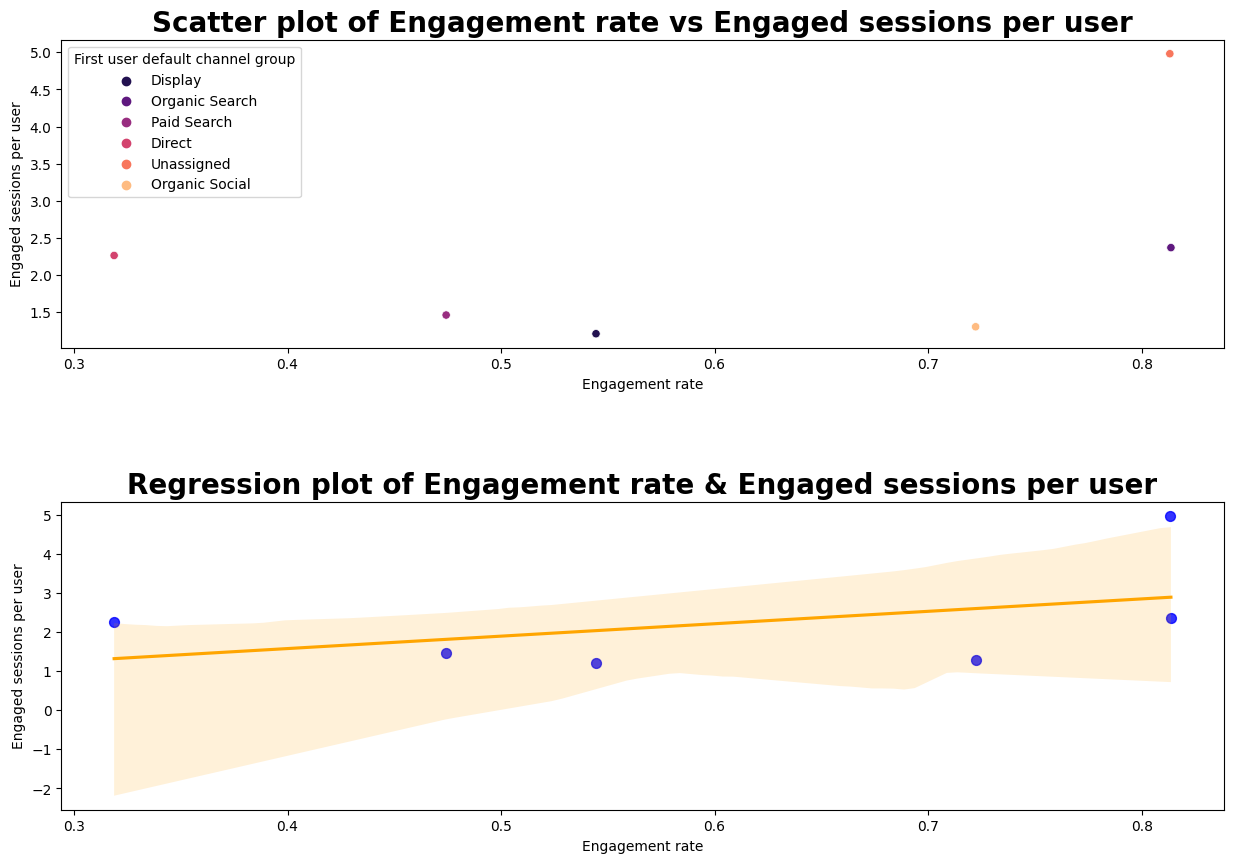

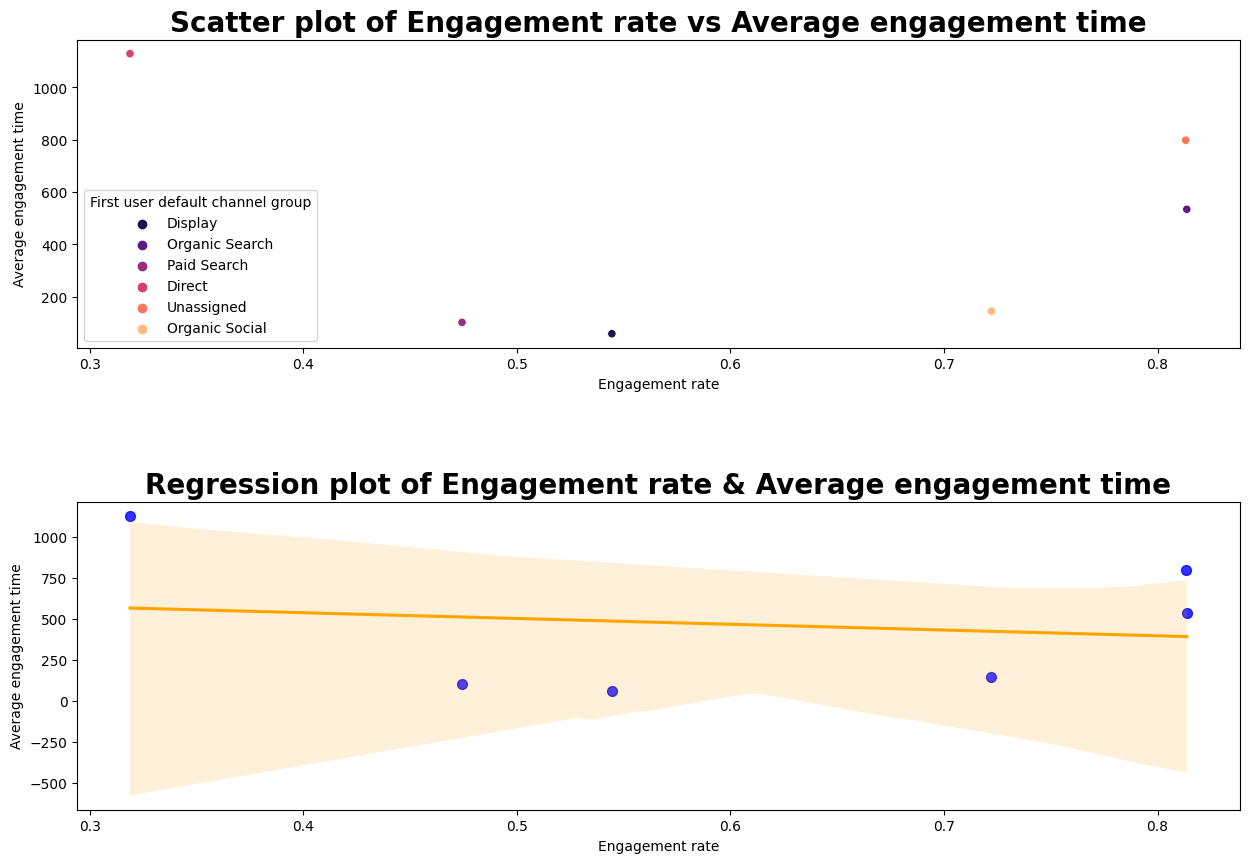

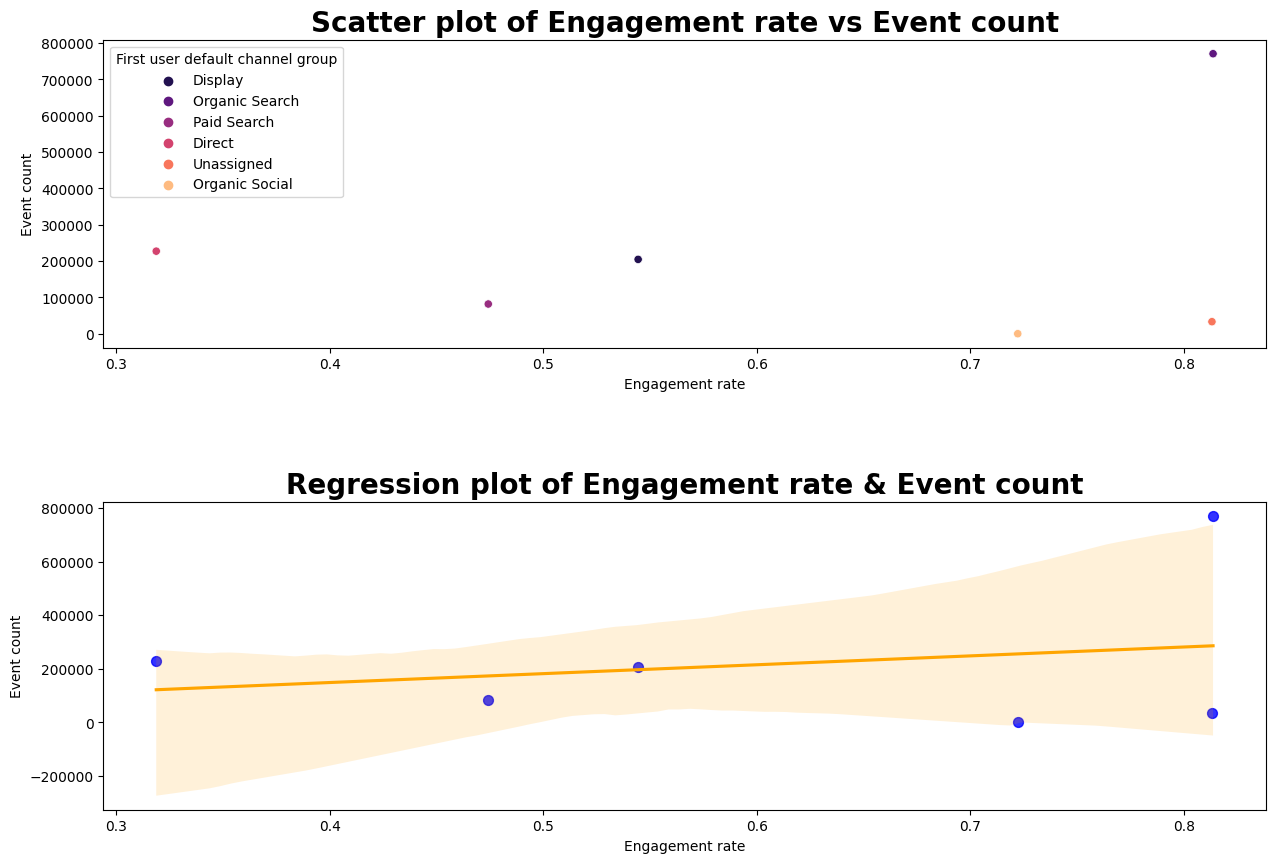

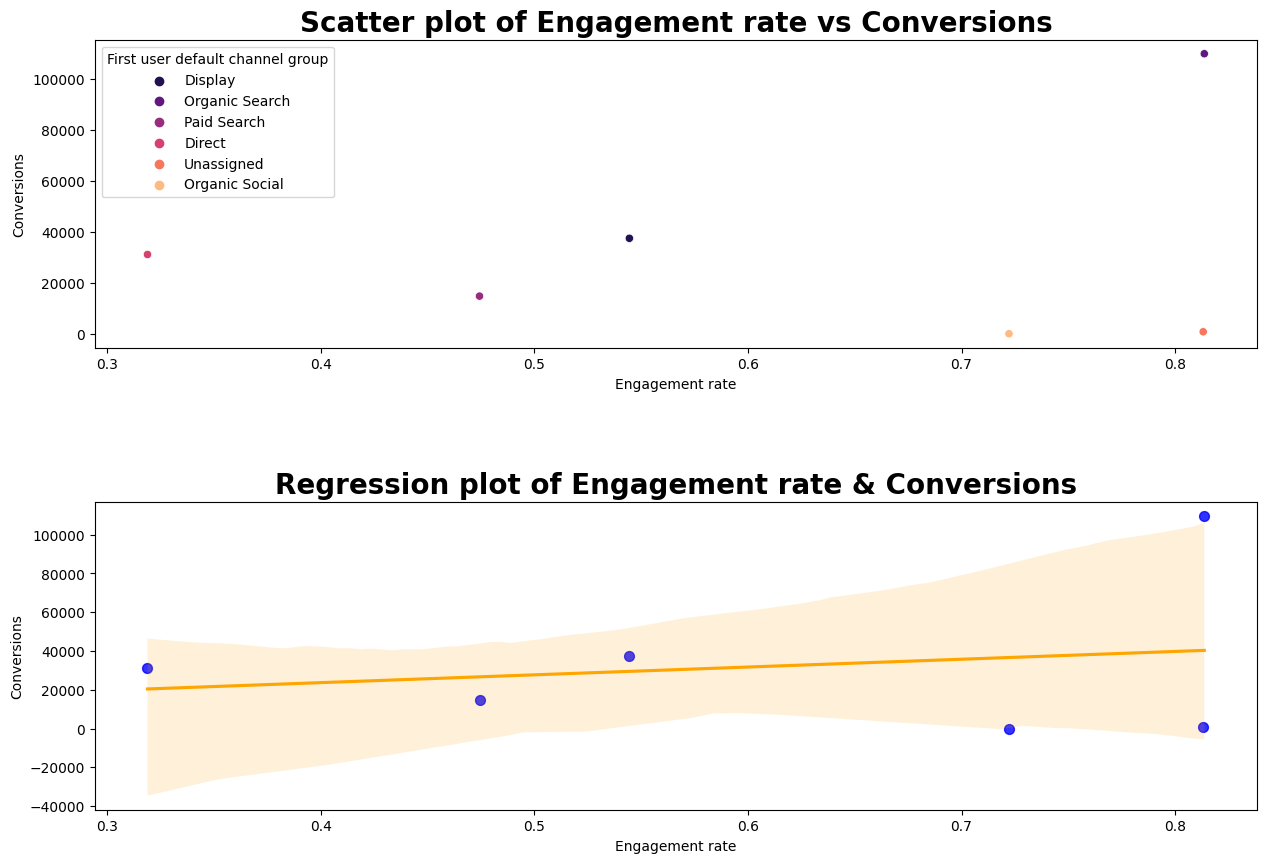

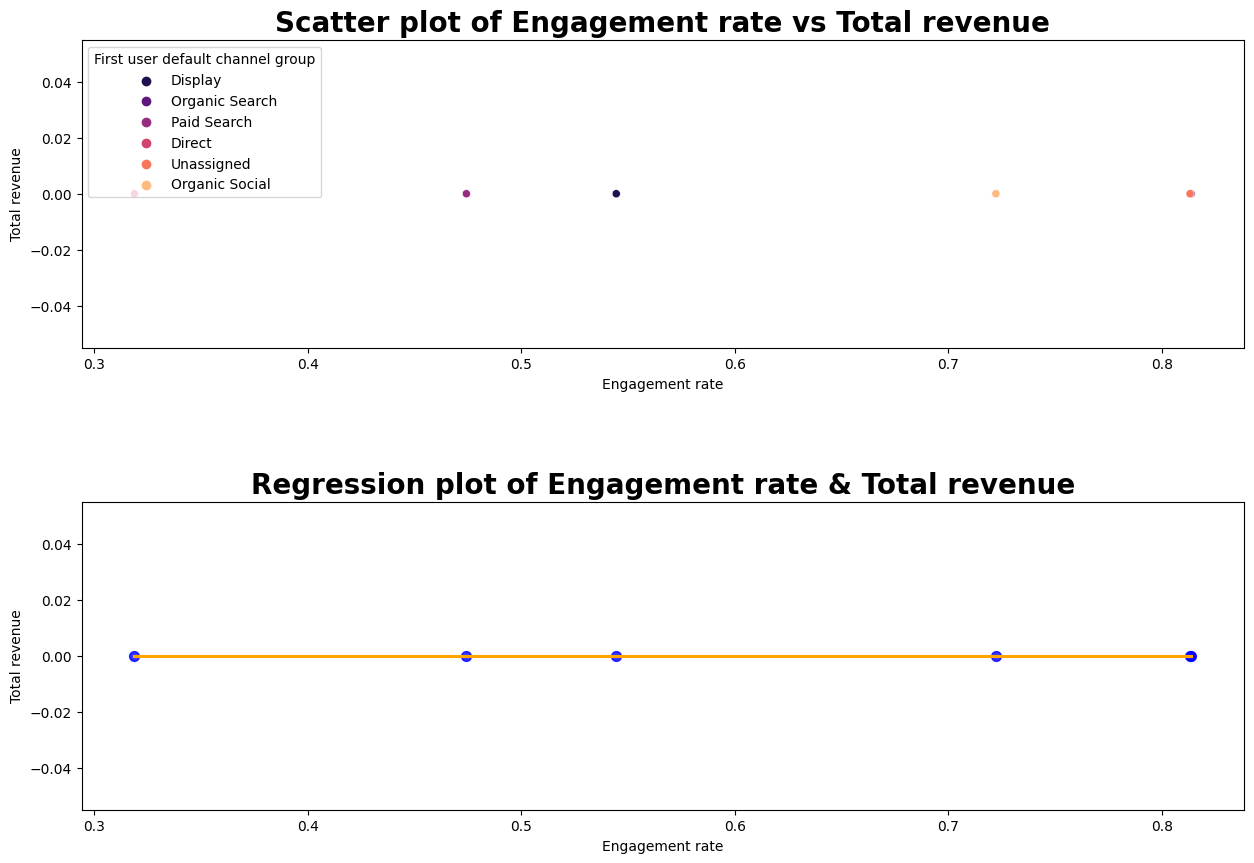

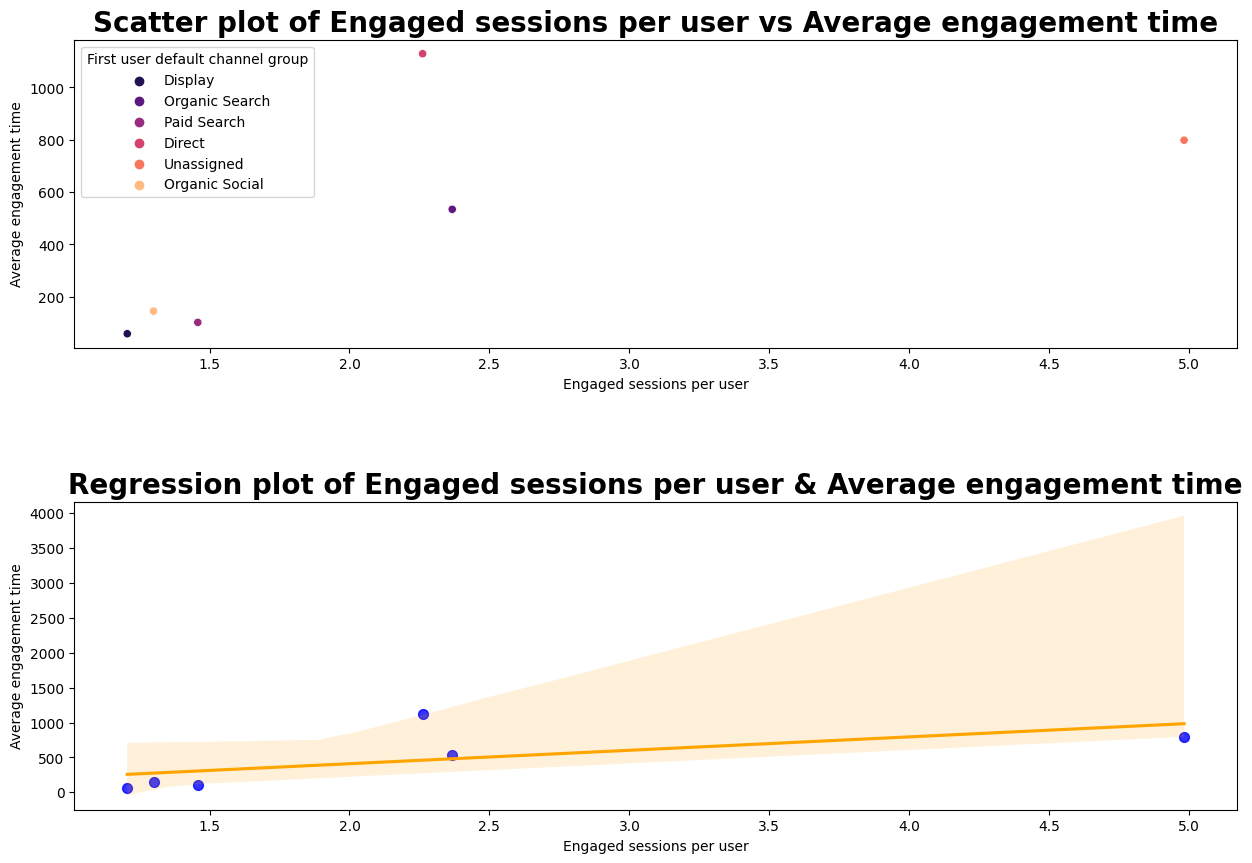

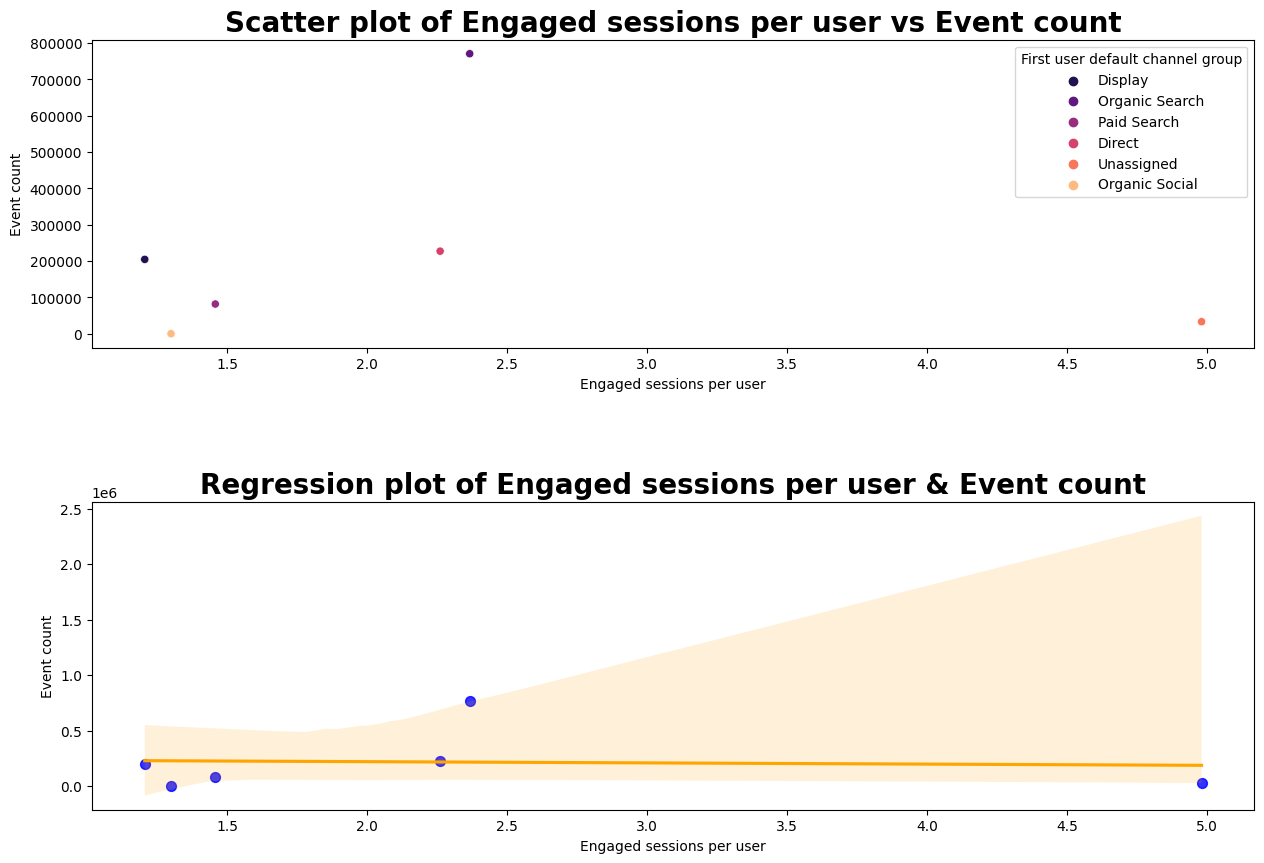

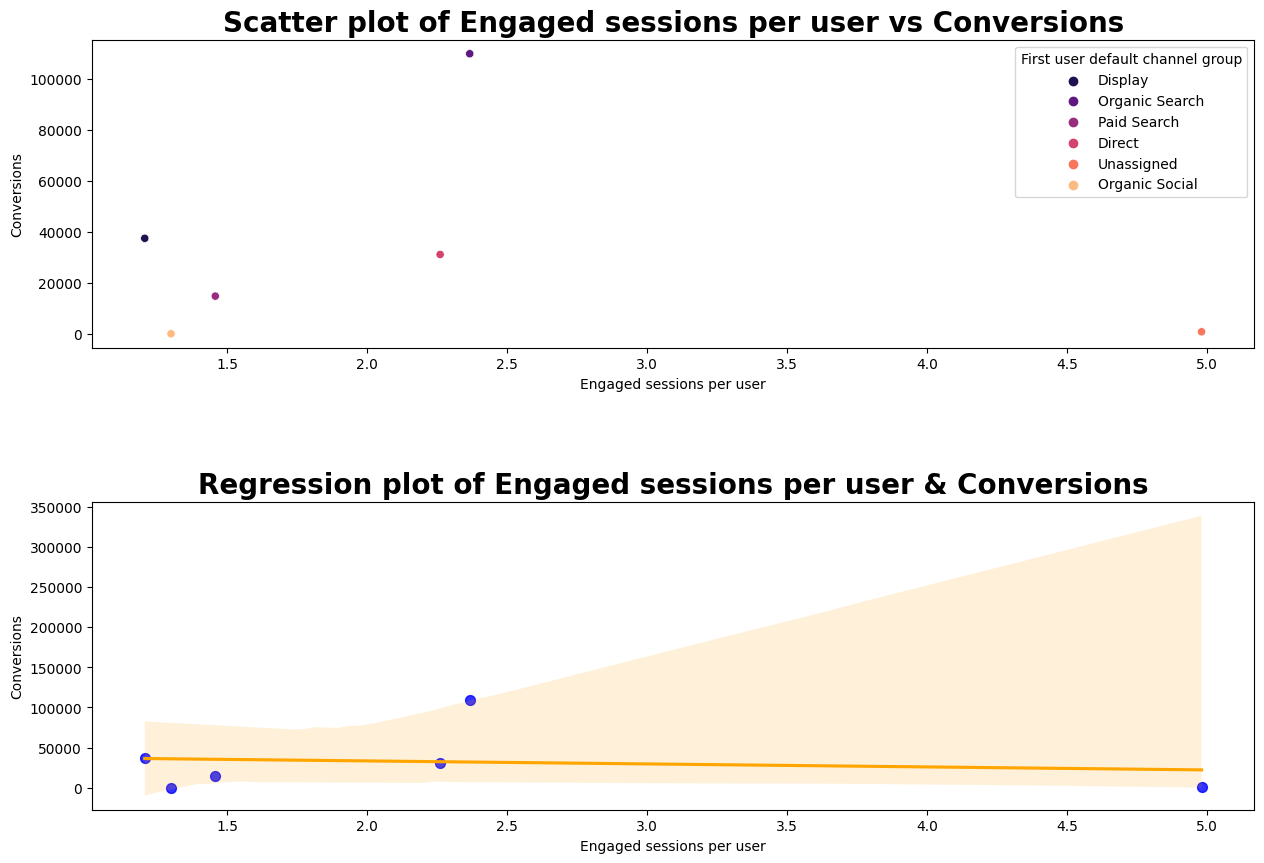

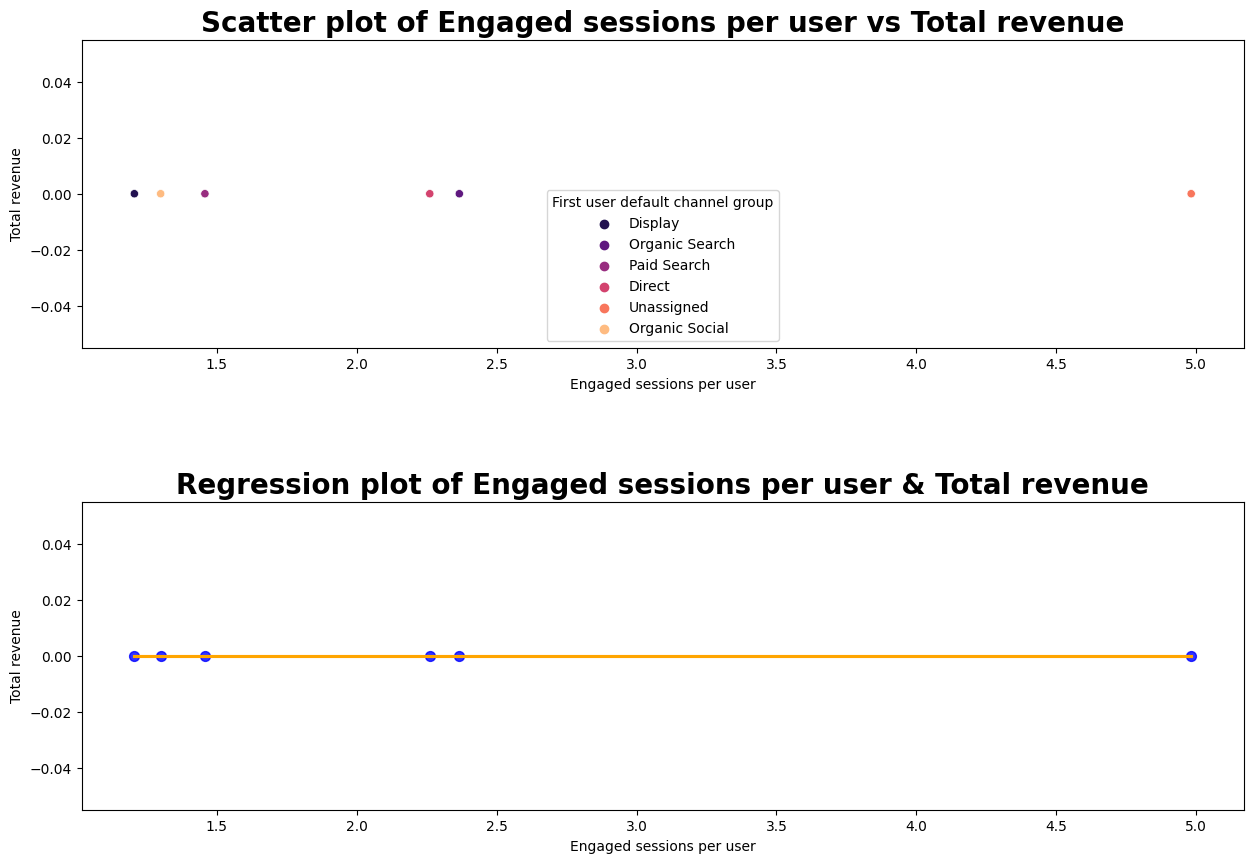

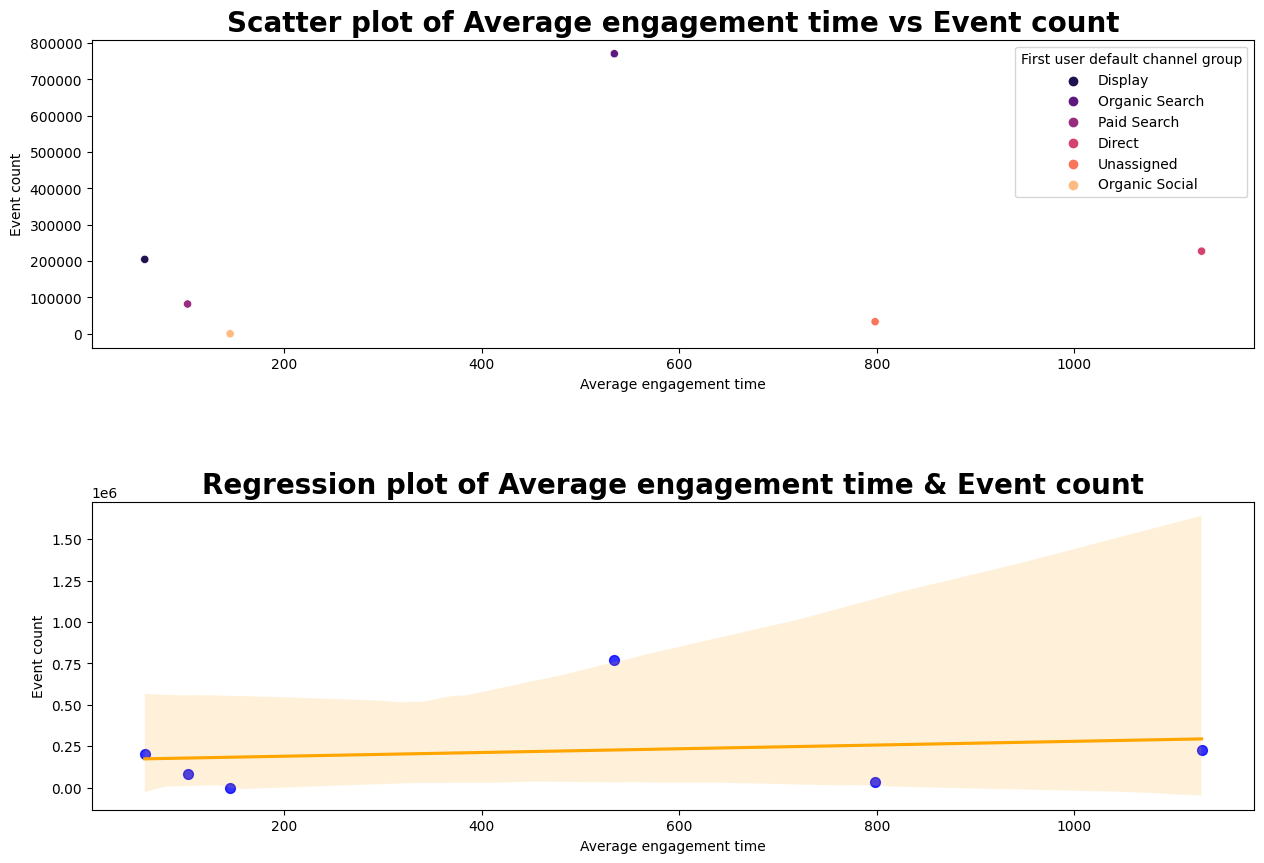

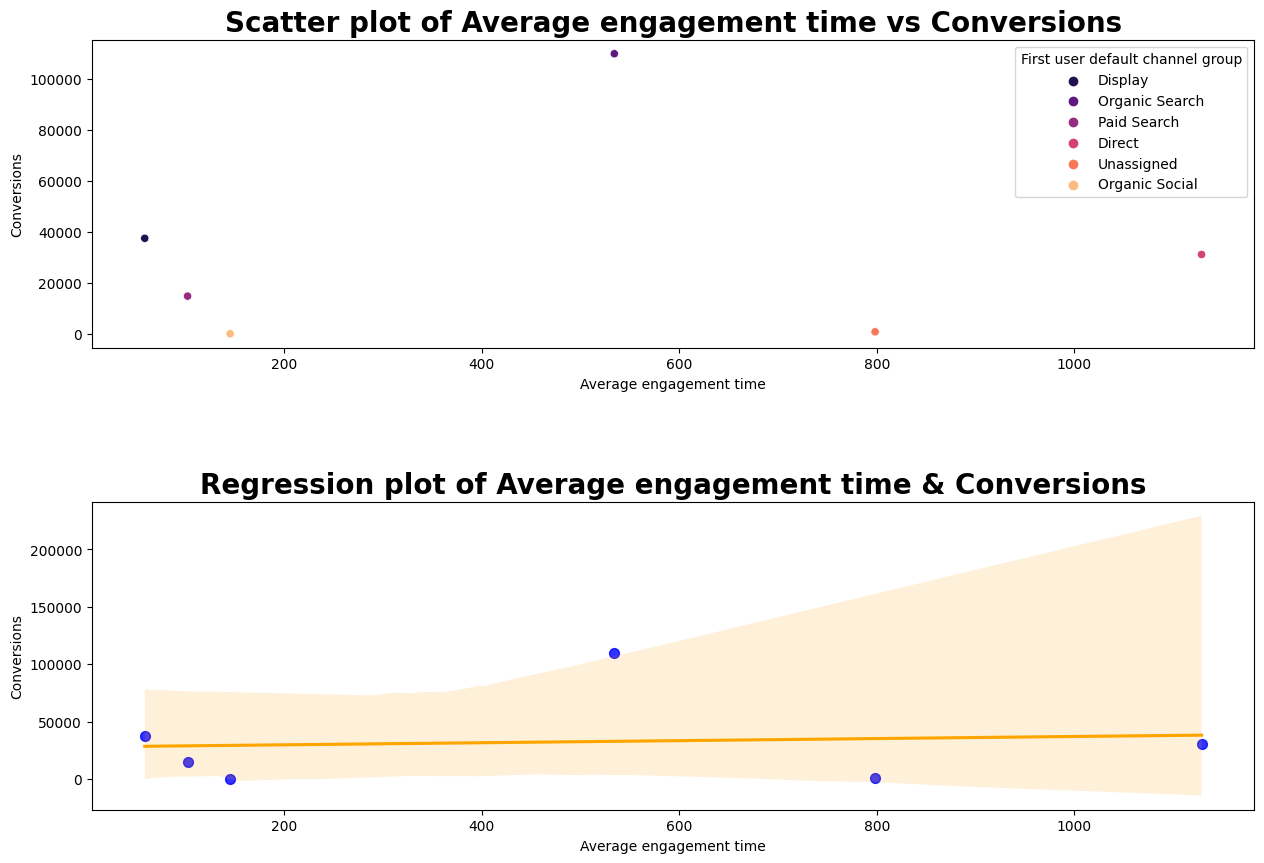

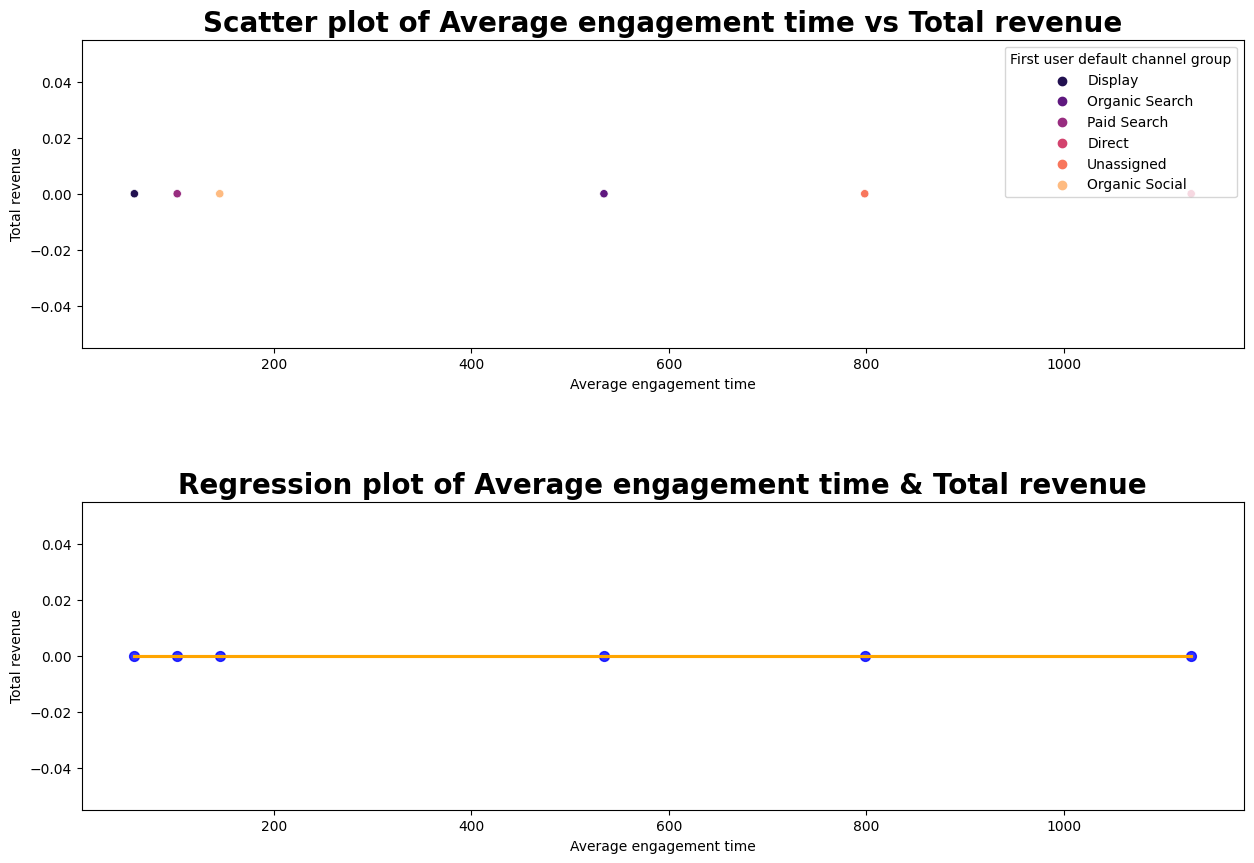

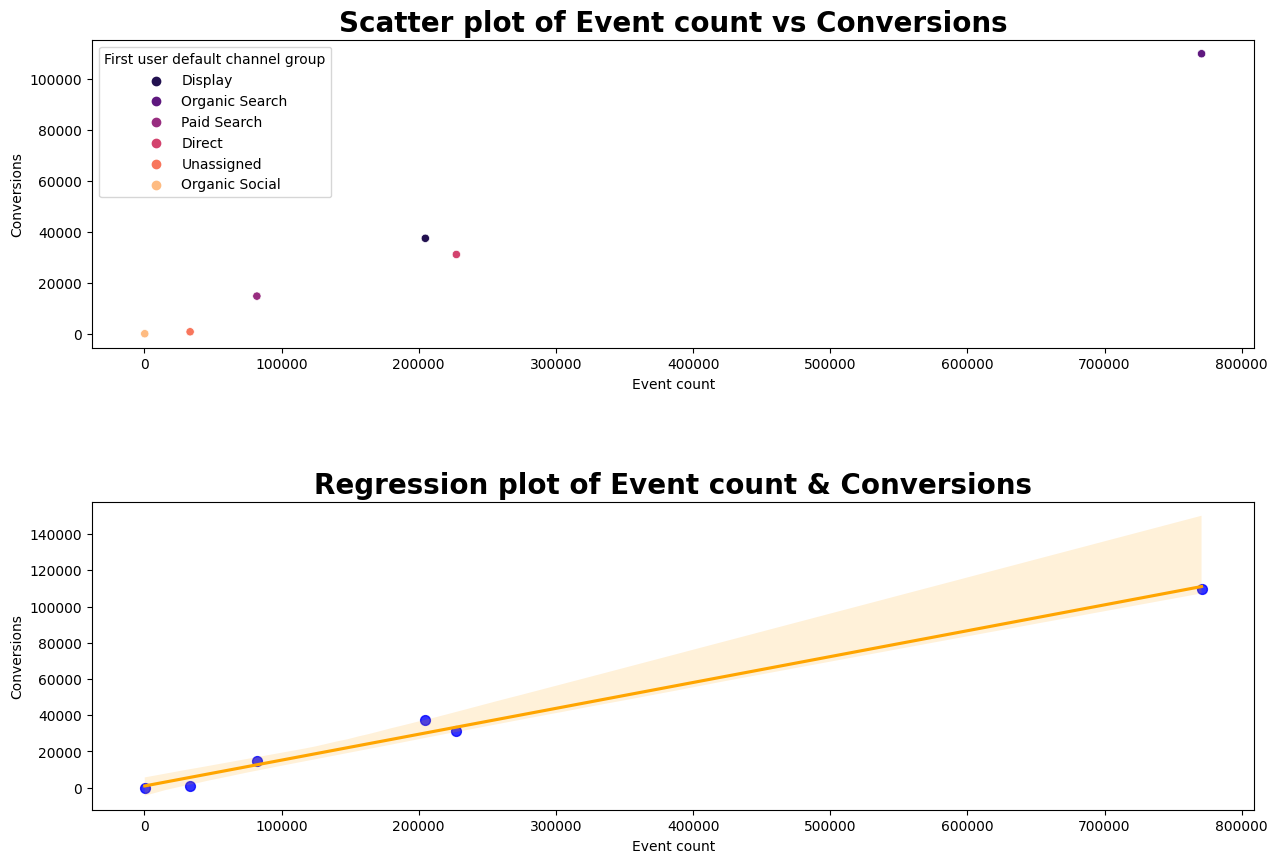

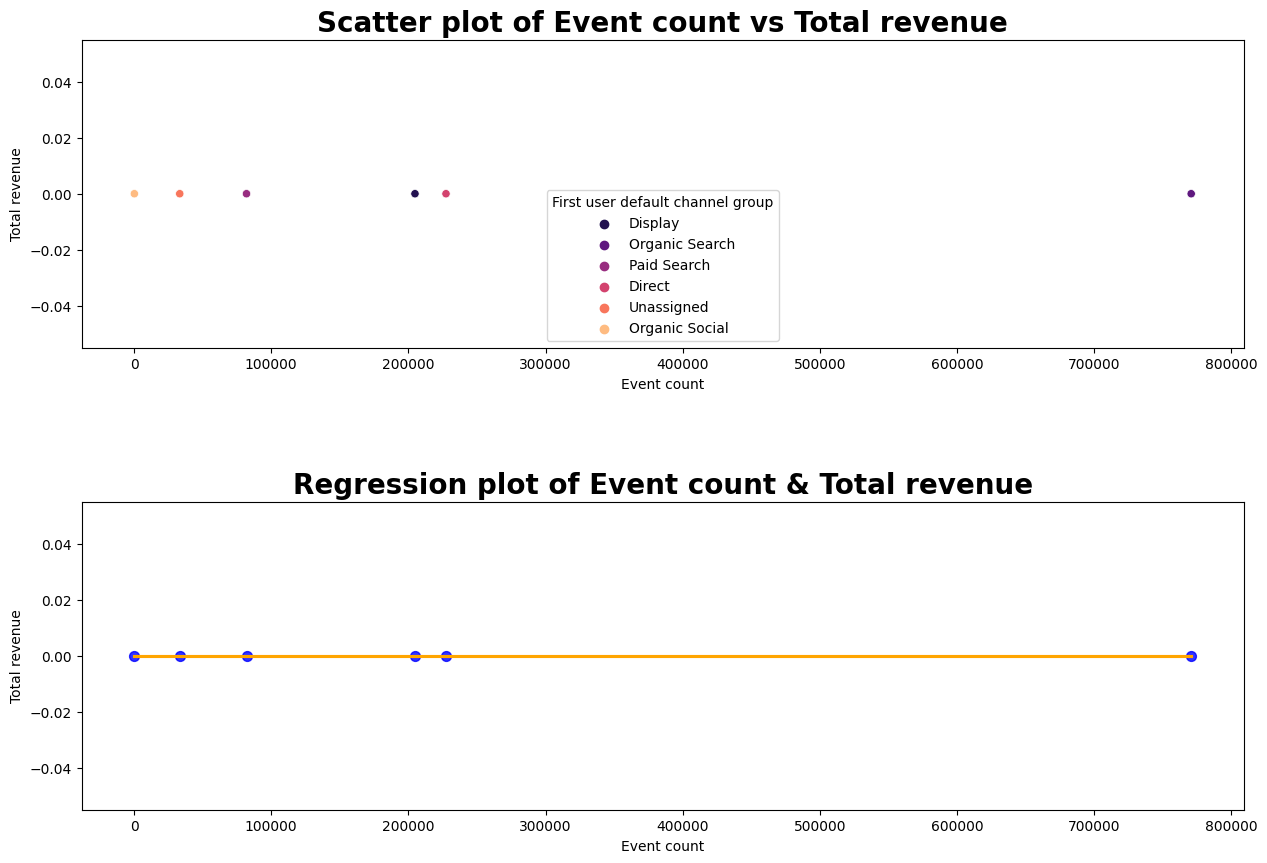

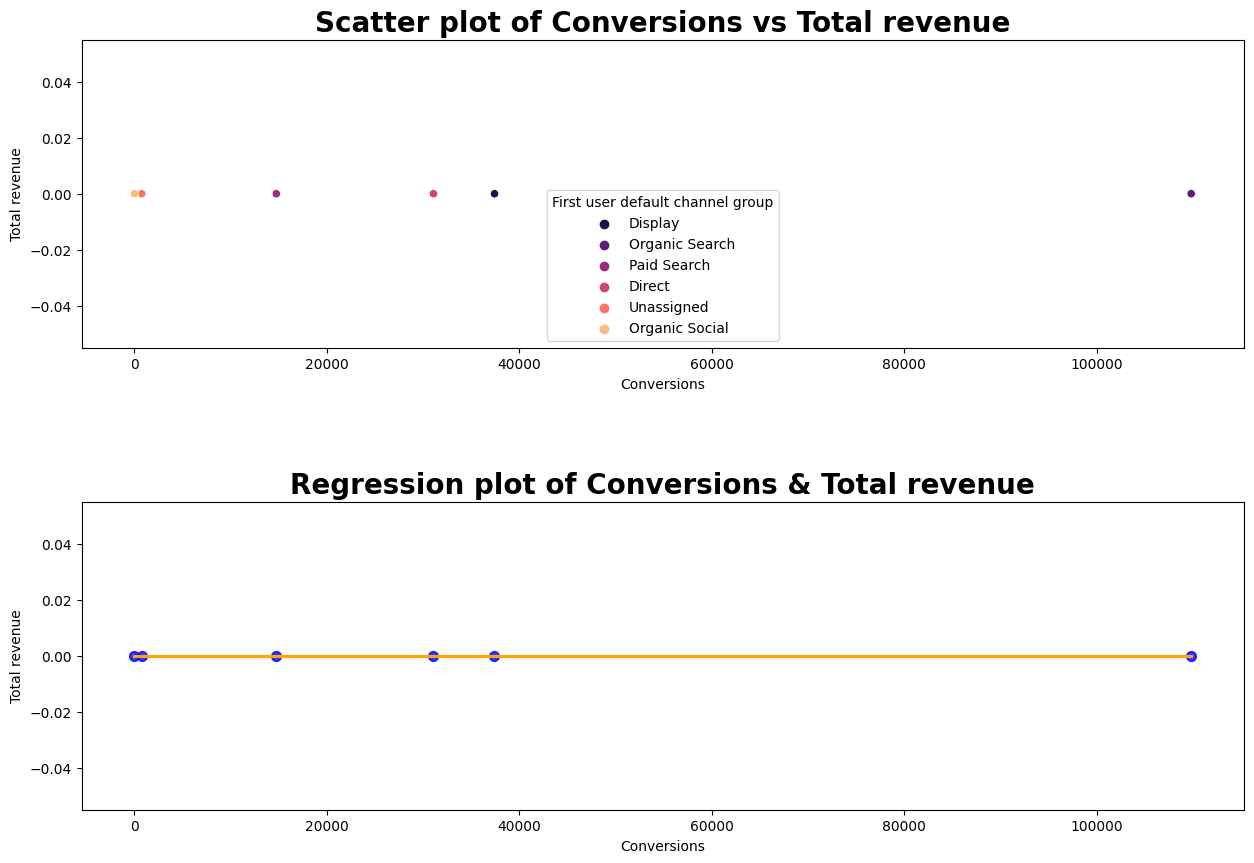

In [292]:
for x in combis:
  scatter_and_reg_plots(data_user_aqs,'First user default channel group',x[0],x[1])

In [317]:
def bar_plot(data,x,y): # x-continuous variable, y-categorical variable

  plt.figure(figsize=(10,3))
  plt.title(f"Barplot of {y} & {x}",pad=25,fontweight='bold')

  fig=sns.barplot(data=data.sort_values(by=x),x=x,y=y,palette='rocket')
  fig.bar_label(fig.containers[0],fontweight='bold',padding=5)       # Setting bar labels with percentage of conversion
  fig.spines[['right','top','bottom']].set_visible(False)            # Removing the chart junk
  fig.xaxis.set_visible(False)                                       # Hiding the x-axis

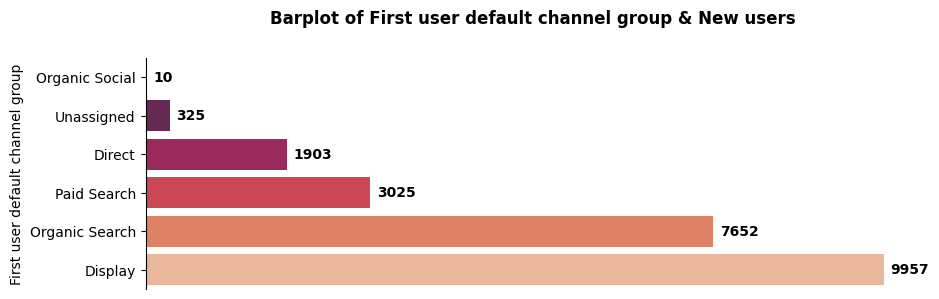

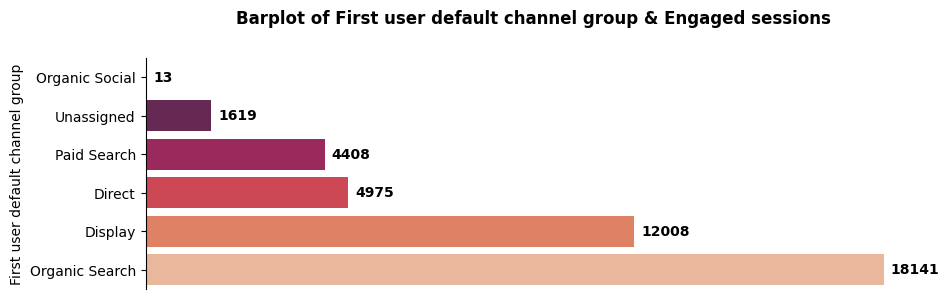

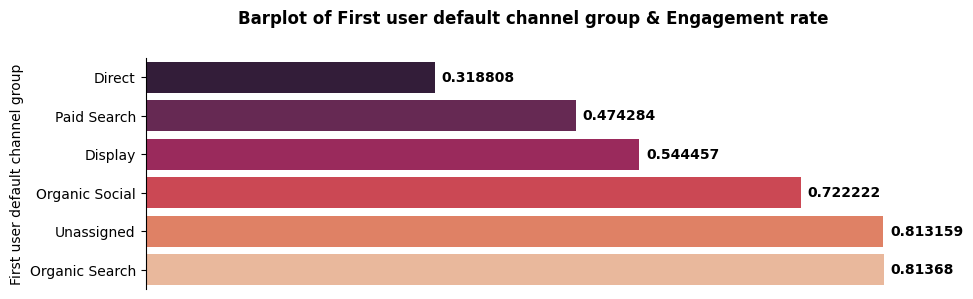

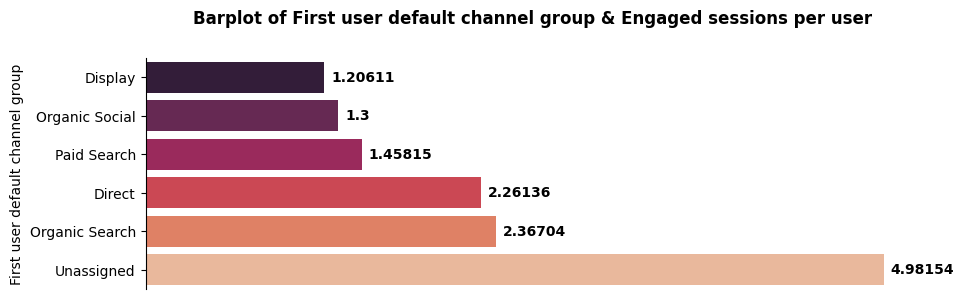

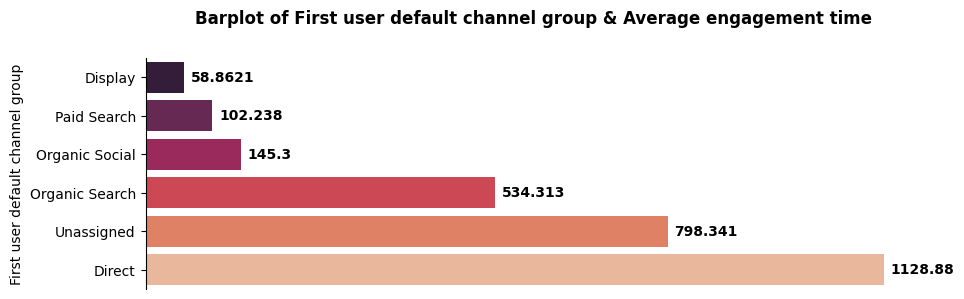

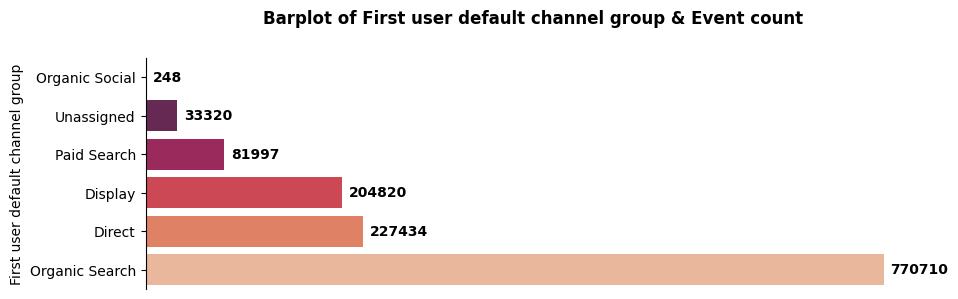

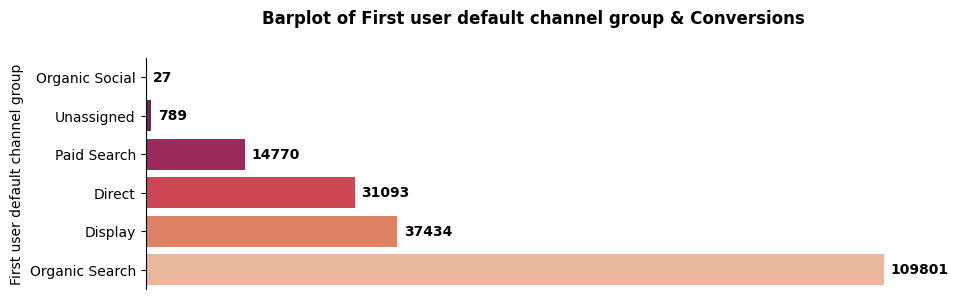

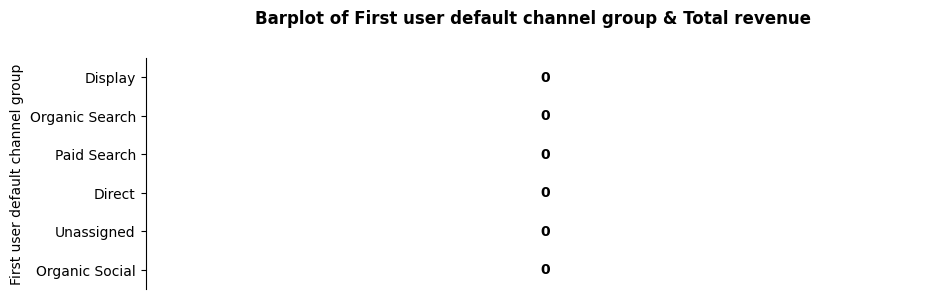

In [305]:
for x in numeric_cols:
  bar_plot(x,"First user default channel group")

In [197]:
correlation_matrix=data_user_aqs[['New users','Engaged sessions','Engagement rate','Engaged sessions per user','Average engagement time','Event count','Conversions']].corr()

<Axes: title={'center': 'Heatmap of correlation score of columns in User acquistion'}>

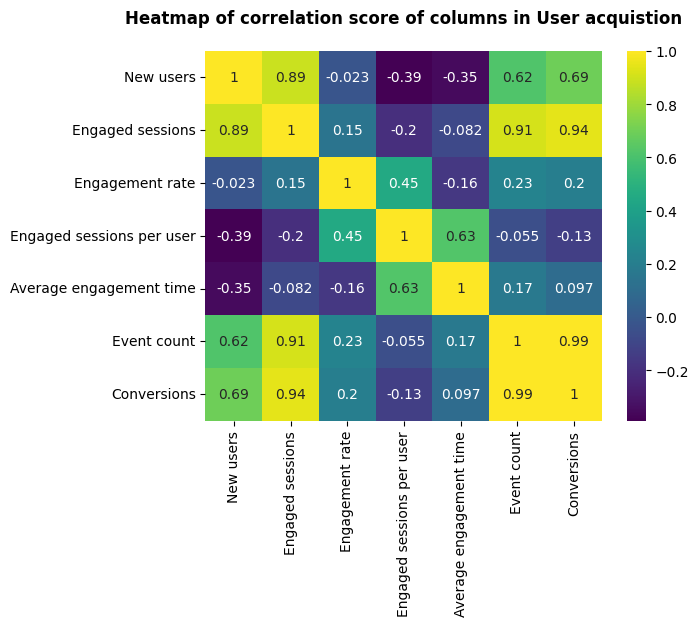

In [204]:
plt.title("Heatmap of correlation score of columns in User acquistion",pad=20,fontweight='bold')
sns.heatmap(data=correlation_matrix,annot=True,cmap='viridis')

**Good correlation score is observed between New users & Engaged sessions, Engaged sessions & Event count, Engaged sessions & Conversions and Event count & Conversions.**

In [326]:
def hist_and_box_plots(data,x):
  fig,axes=plt.subplots(1,2,figsize=(30,7))

  sns.boxplot(data=data,x=x,palette='rocket',ax=axes[0]).set_title(f"Box plot of {x}",fontweight='bold',fontsize=20)
  sns.histplot(data=data,x=x,palette='seismic_r',kde=True,ax=axes[1]).set_title(f"Histogram of {x} Column",fontweight='bold',fontsize=20)

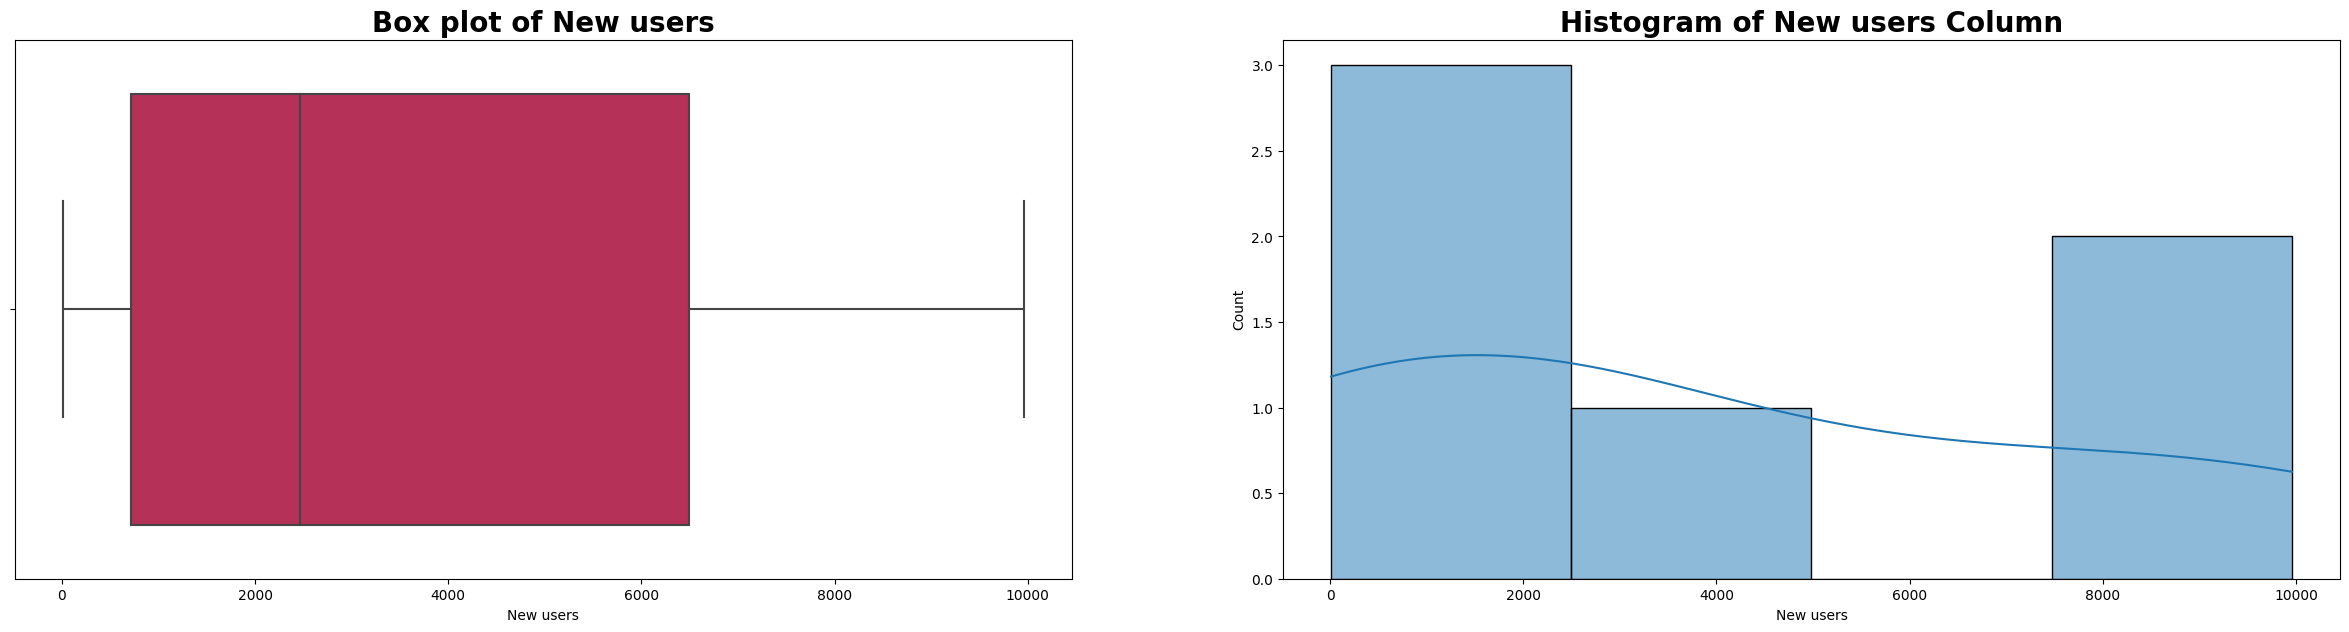

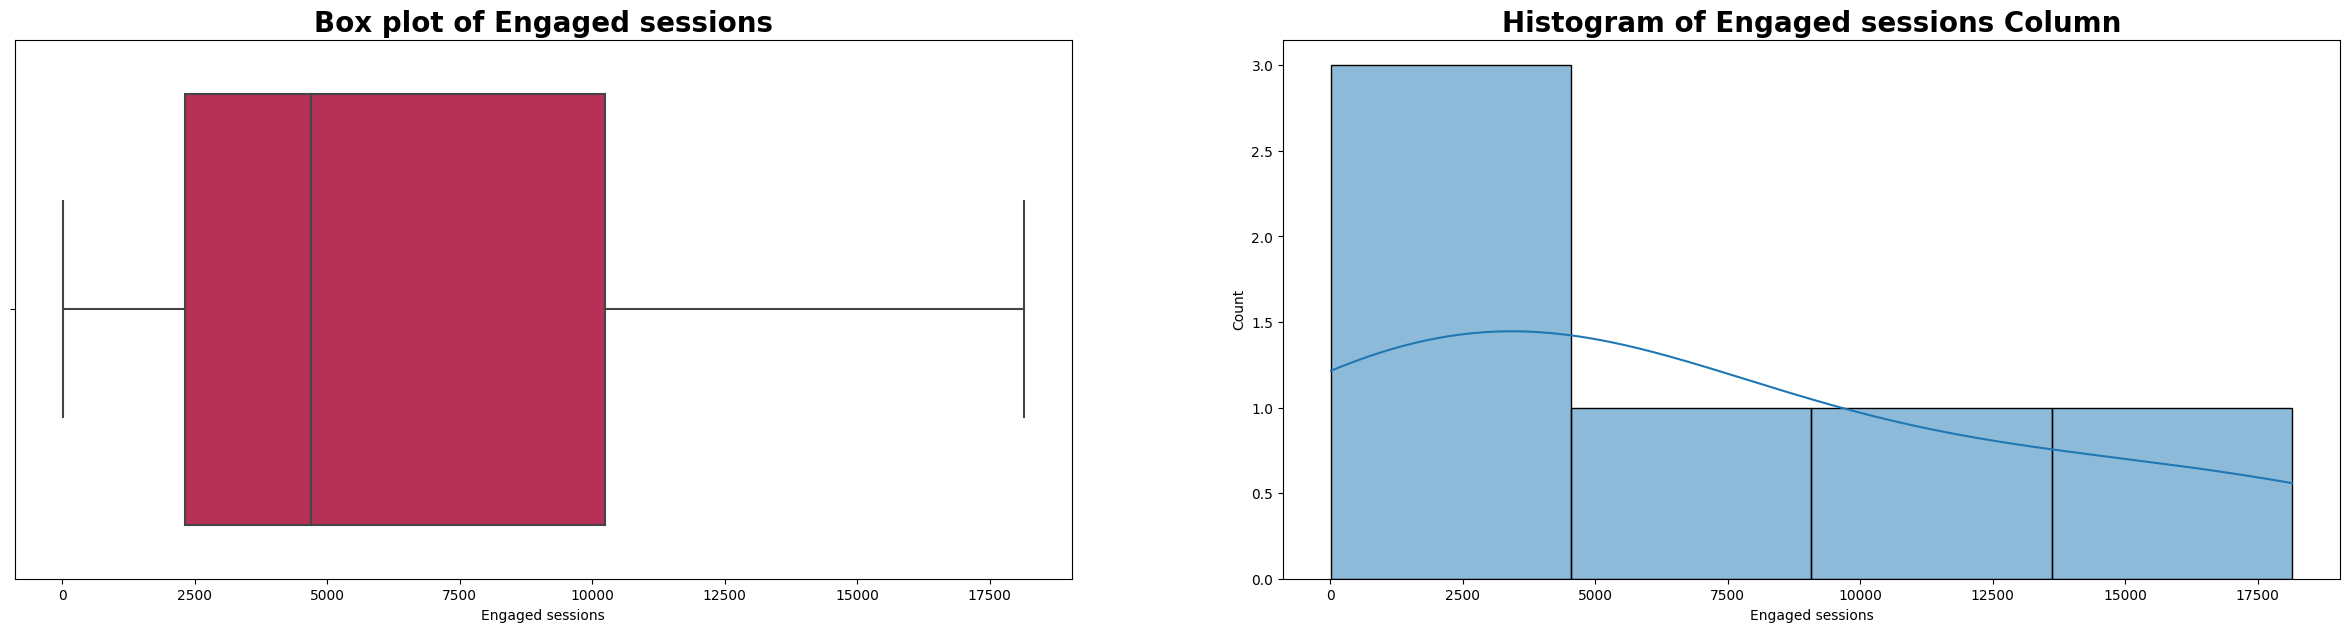

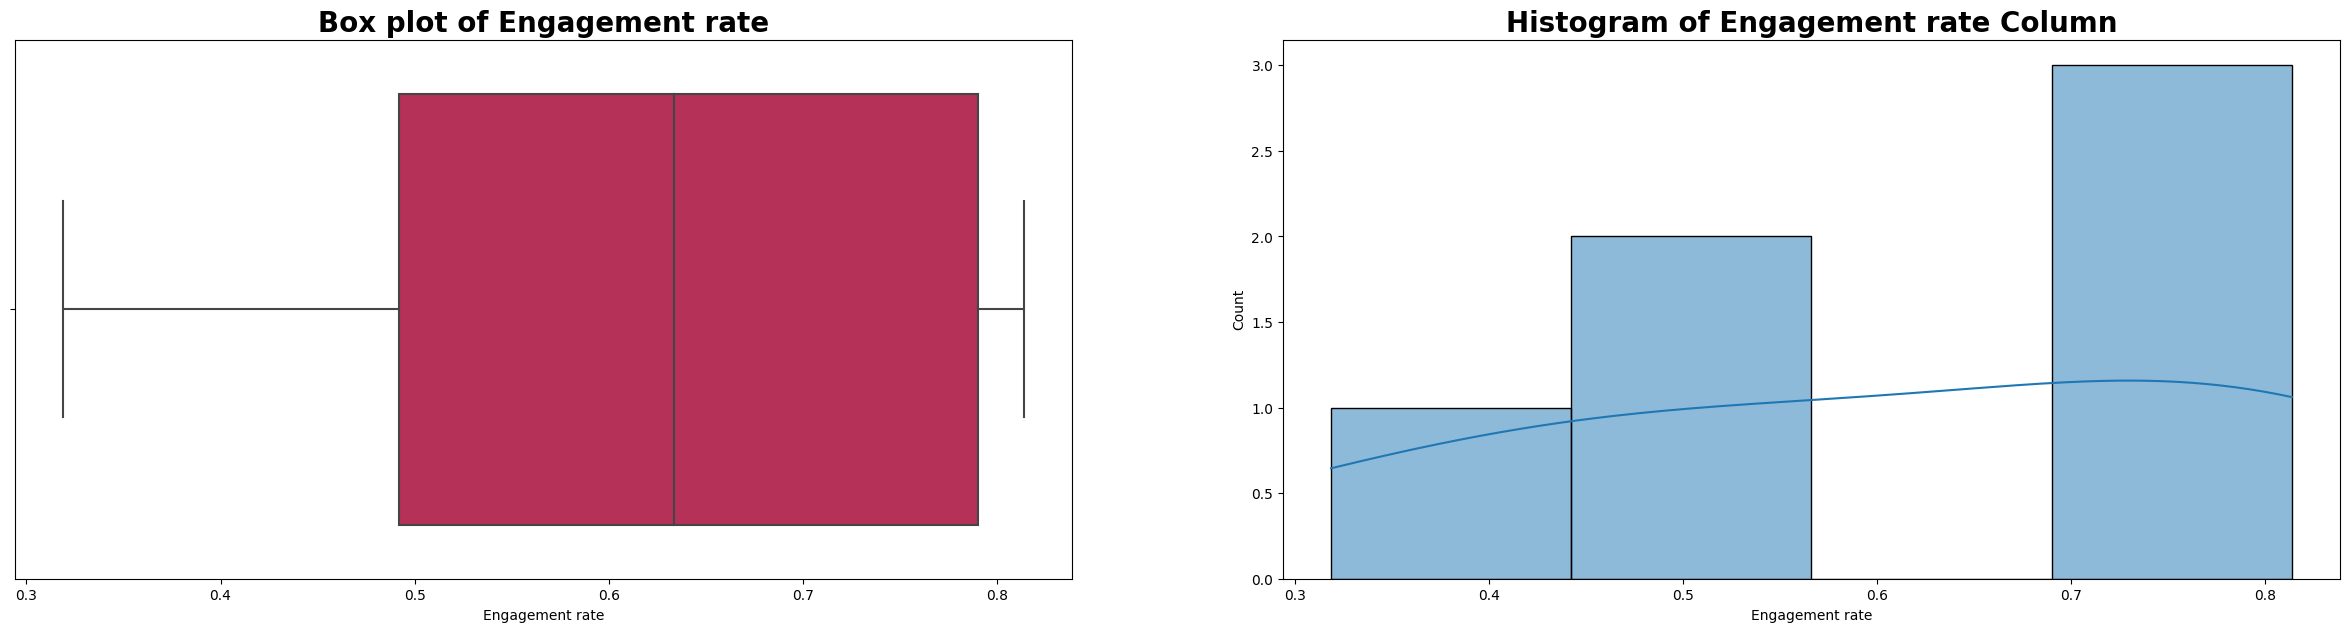

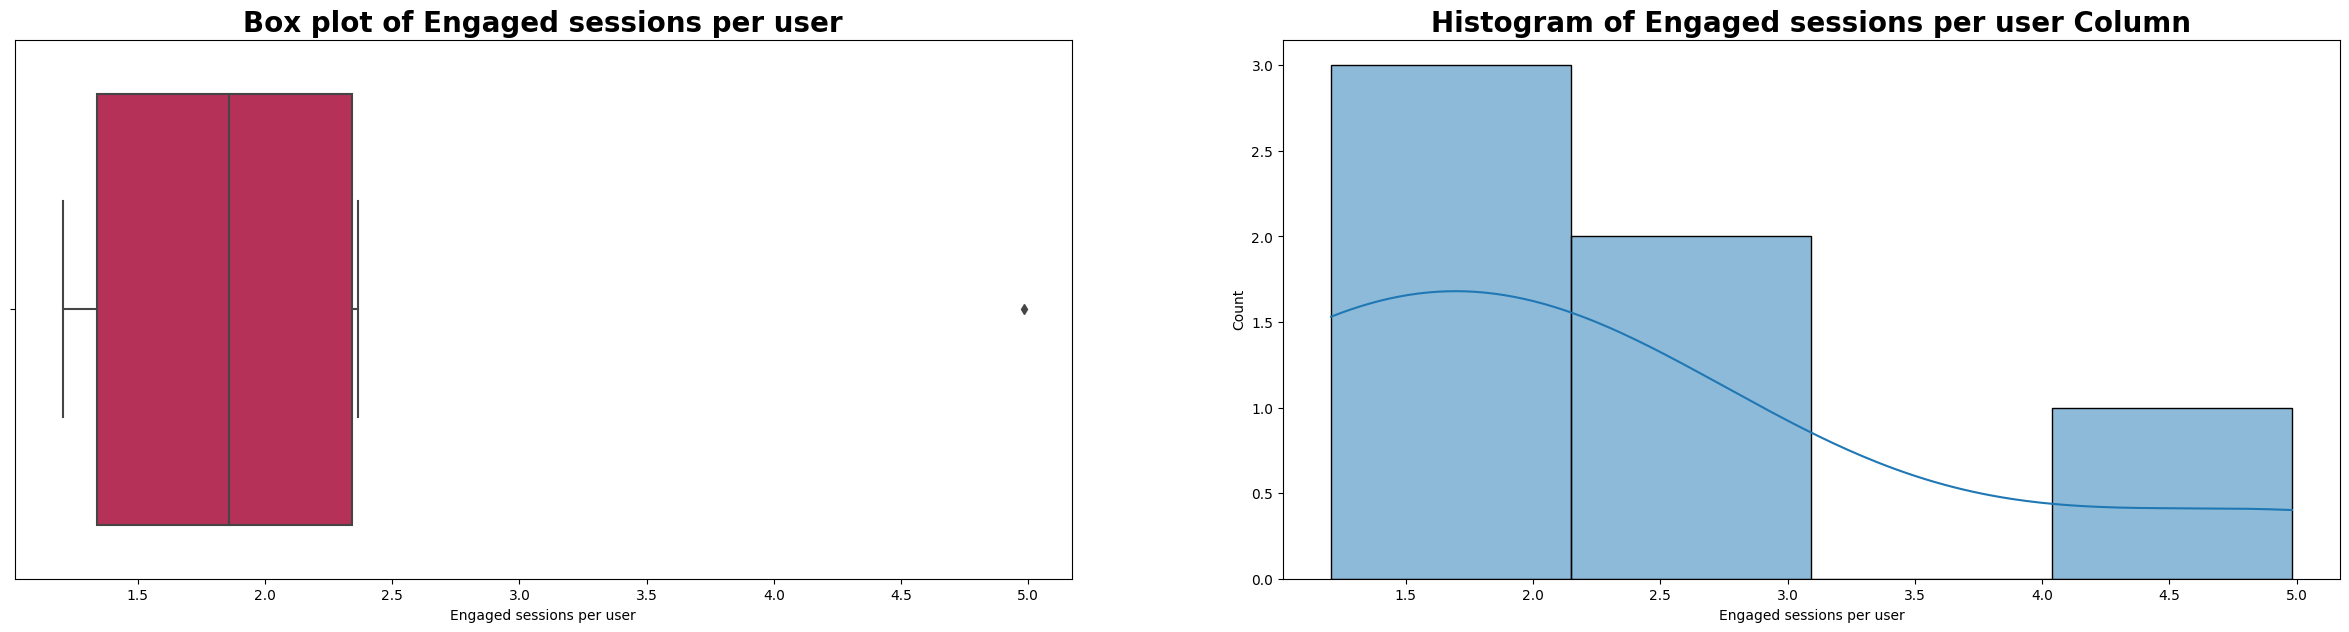

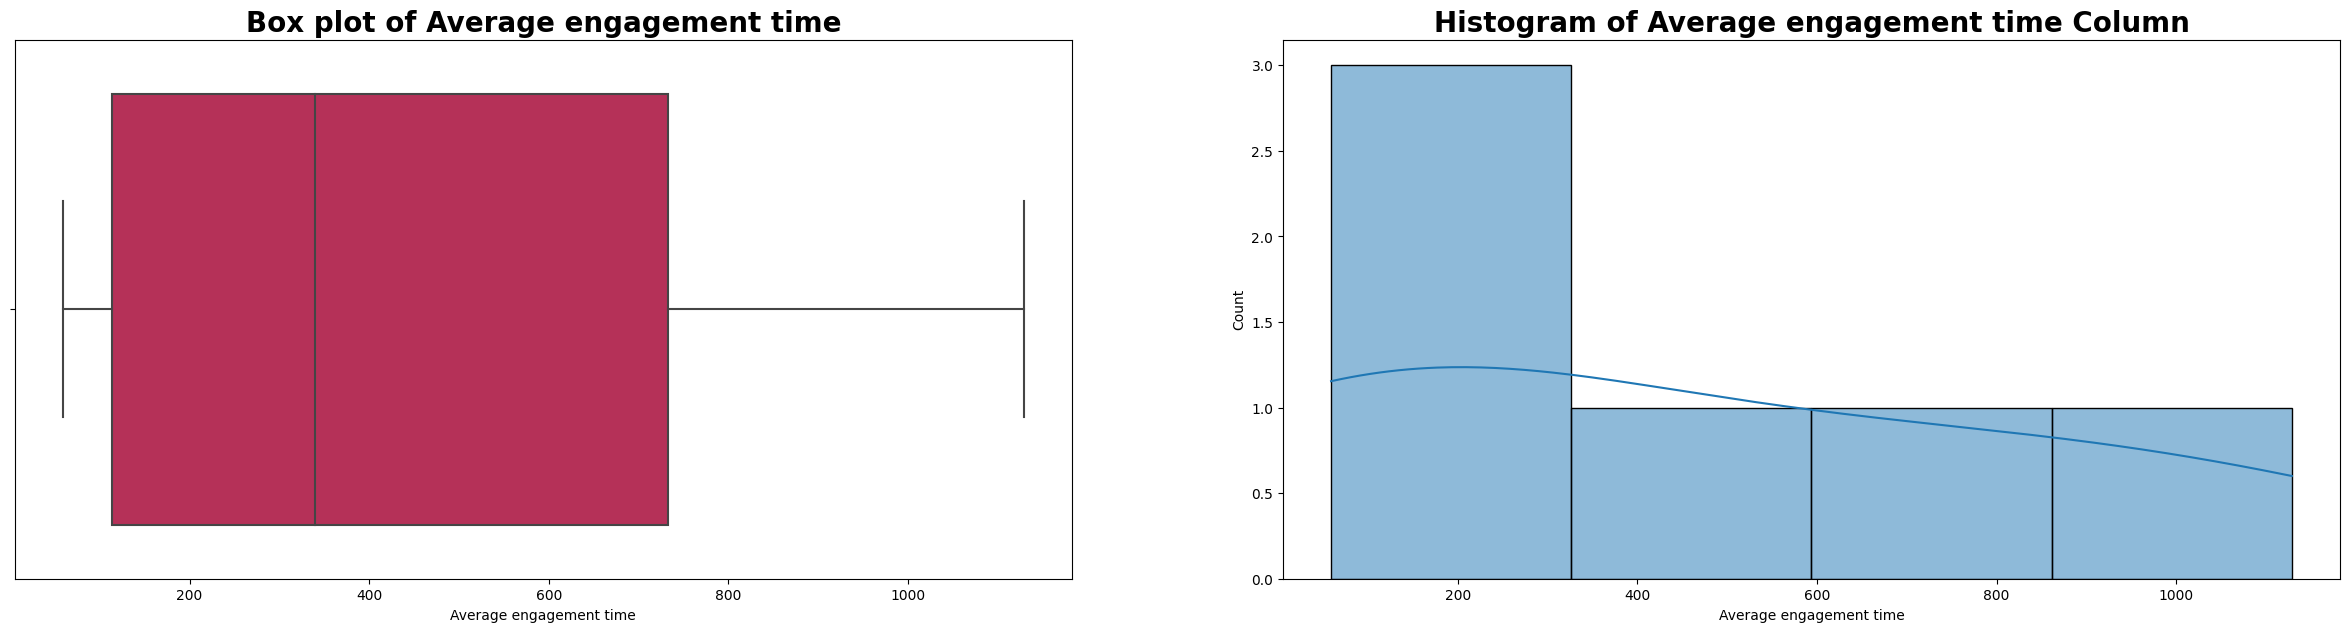

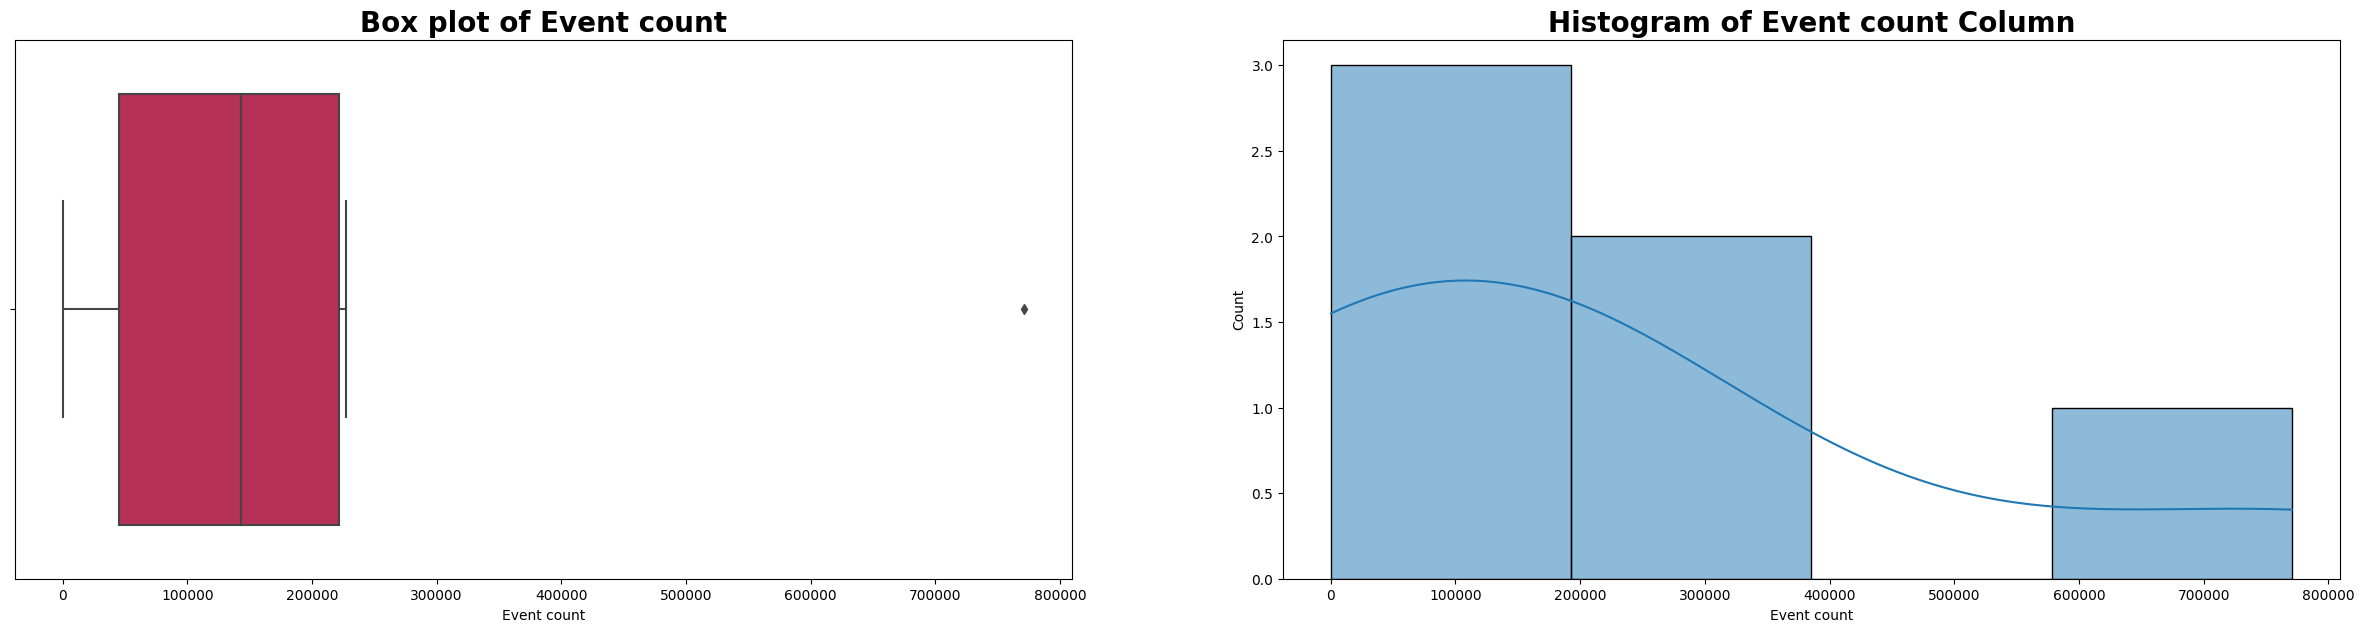

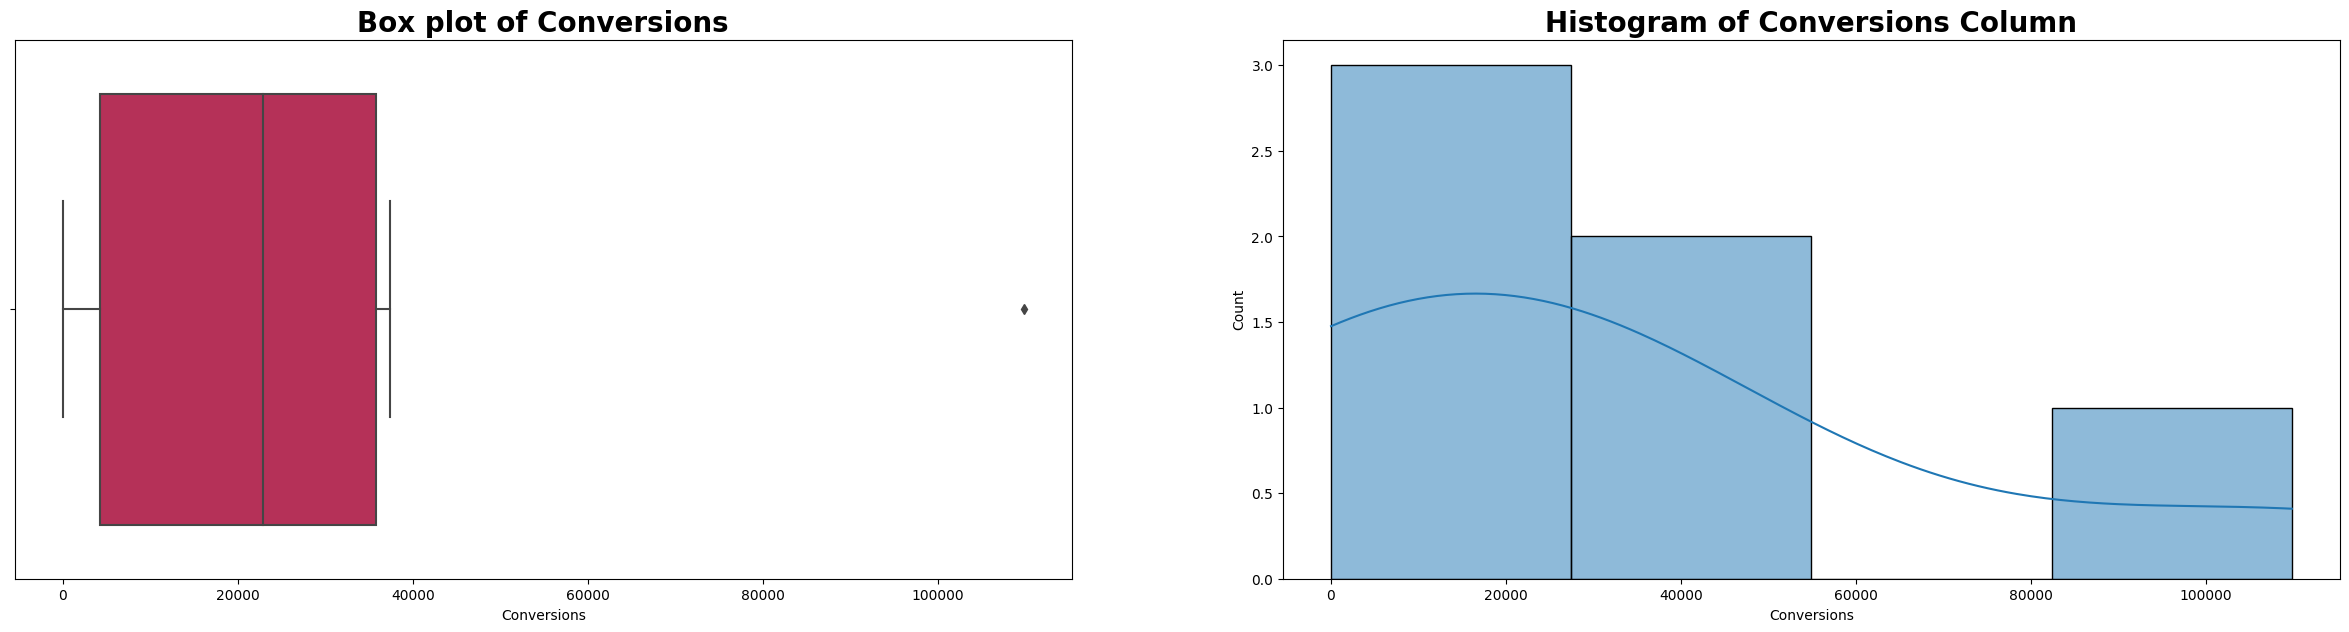

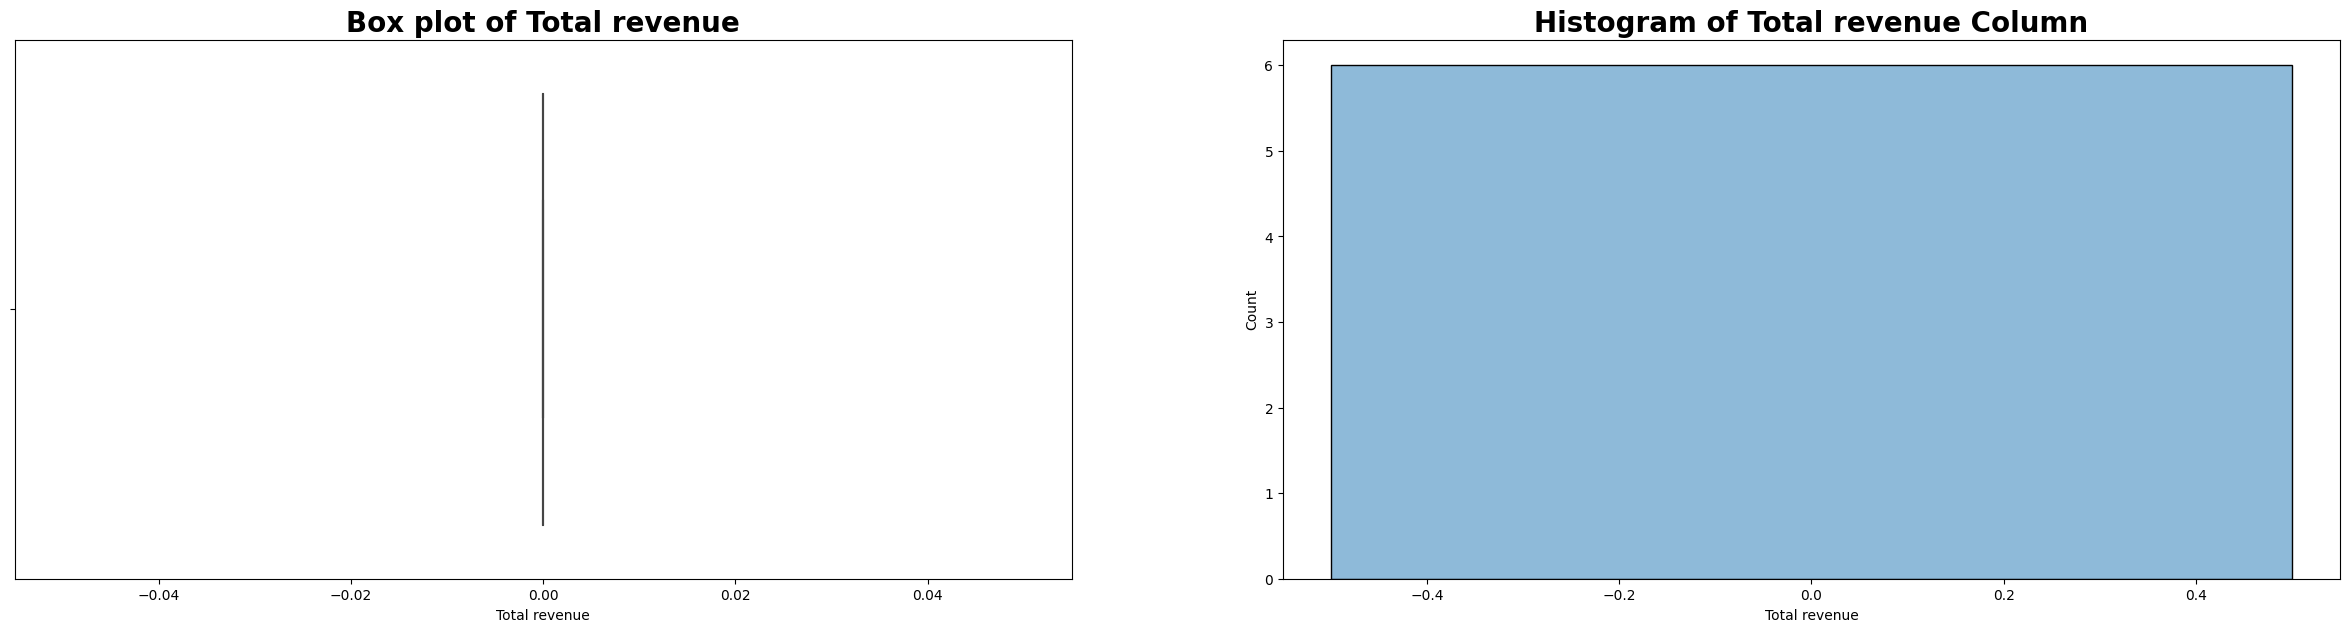

In [234]:
for x in numeric_cols:
  hist_and_box_plots(data_user_aqs,x)

**Outliers are observed in the following columns:** Engages sessions per user, Event count, Conversions

### 3. Traffic Acquisition

In [268]:
data_traffic_aqs=pd.read_excel("Promilo_BA.xlsx",sheet_name='Traffic Aquisition')
data_traffic_aqs

Session default channel group  Users  Sessions  Engaged sessions  \
0                    Unassigned  20263     13448              1481   
1                       Display   9613     18292             10613   
2                Organic Search   7689     21241             17814   
3                        Direct   4042     13220              7649   
4                   Paid Search   2909      6788              3452   
5                Organic Social     11        16                12   

   Average engagement time per session  Engaged sessions per user  \
0                             34.11704                   0.073089   
1                             28.52198                   1.104026   
2                            195.94340                   2.316816   
3                            177.17060                   1.892380   
4                             36.65321                   1.186662   
5                             60.06250                   1.090909   

   Events per session  Engagement rate  Event count  Conversions  \
0           18.023130         0.110128       242375       114161   
1            9.069320         0.580199       165896        20031   
2           29.302290         0.838661       622410        33612   
3           17.135850         0.578593       226536        18496   
4            8.989982         0.508544        61024         7595   
5           18.000000         0.750000          288           19   

   Total revenue  
0              0  
1              0  
2              0  
3              0  
4              0  
5              0

In [270]:
data_traffic_aqs.style.bar(cmap='coolwarm',height=50,width=55) # Adding internal bar charts to numerical columns for a sample of the data


In [273]:
data_traffic_aqs.shape

(6, 11)

In [275]:
data_traffic_aqs.describe().T

count           mean            std  \
Users                                  6.0    7421.166667    7162.088199   
Sessions                               6.0   12167.500000    7735.416104   
Engaged sessions                       6.0    6836.833333    6665.397735   
Average engagement time per session    6.0      88.744788      76.756564   
Engaged sessions per user              6.0       1.277314       0.772272   
Events per session                     6.0      16.753429       7.484689   
Engagement rate                        6.0       0.561021       0.252797   
Event count                            6.0  219754.833333  218609.598013   
Conversions                            6.0   32319.000000   41704.726979   
Total revenue                          6.0       0.000000       0.000000   

                                            min           25%            50%  \
Users                                 11.000000   3192.250000    5865.500000   
Sessions                              16.000000   8396.000000   13334.000000   
Engaged sessions                      12.000000   1973.750000    5550.500000   
Average engagement time per session   28.521980     34.751083      48.357855   
Engaged sessions per user              0.073089      1.094188       1.145344   
Events per session                     8.989982     11.085952      17.567925   
Engagement rate                        0.110128      0.526056       0.579396   
Event count                          288.000000  87242.000000  196216.000000   
Conversions                           19.000000  10320.250000   19263.500000   
Total revenue                          0.000000      0.000000       0.000000   

                                               75%            max  
Users                                  9132.000000   20263.000000  
Sessions                              17081.000000   21241.000000  
Engaged sessions                       9872.000000   17814.000000  
Average engagement time per session     147.893575     195.943400  
Engaged sessions per user                 1.715950       2.316816  
Events per session                       18.017347      29.302290  
Engagement rate                           0.707550       0.838661  
Event count                          238415.250000  622410.000000  
Conversions                           30216.750000  114161.000000  
Total revenue                             0.000000       0.000000

In [276]:
data_traffic_aqs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Session default channel group        6 non-null      object 
 1   Users                                6 non-null      int64  
 2   Sessions                             6 non-null      int64  
 3   Engaged sessions                     6 non-null      int64  
 4   Average engagement time per session  6 non-null      float64
 5   Engaged sessions per user            6 non-null      float64
 6   Events per session                   6 non-null      float64
 7   Engagement rate                      6 non-null      float64
 8   Event count                          6 non-null      int64  
 9   Conversions                          6 non-null      int64  
 10  Total revenue                        6 non-null      int64  
dtypes: float64(4), int64(6), object(1)
m

In [278]:
data_traffic_aqs.duplicated().sum()

0

In [314]:
numeric_cols,cat_cols=columns(data_traffic_aqs)

In [315]:
combis=list(combinations(numeric_cols,2))
combis

[('Users', 'Sessions'),
 ('Users', 'Engaged sessions'),
 ('Users', 'Average engagement time per session'),
 ('Users', 'Engaged sessions per user'),
 ('Users', 'Events per session'),
 ('Users', 'Engagement rate'),
 ('Users', 'Event count'),
 ('Users', 'Conversions'),
 ('Users', 'Total revenue'),
 ('Sessions', 'Engaged sessions'),
 ('Sessions', 'Average engagement time per session'),
 ('Sessions', 'Engaged sessions per user'),
 ('Sessions', 'Events per session'),
 ('Sessions', 'Engagement rate'),
 ('Sessions', 'Event count'),
 ('Sessions', 'Conversions'),
 ('Sessions', 'Total revenue'),
 ('Engaged sessions', 'Average engagement time per session'),
 ('Engaged sessions', 'Engaged sessions per user'),
 ('Engaged sessions', 'Events per session'),
 ('Engaged sessions', 'Engagement rate'),
 ('Engaged sessions', 'Event count'),
 ('Engaged sessions', 'Conversions'),
 ('Engaged sessions', 'Total revenue'),
 ('Average engagement time per session', 'Engaged sessions per user'),
 ('Average engagemen

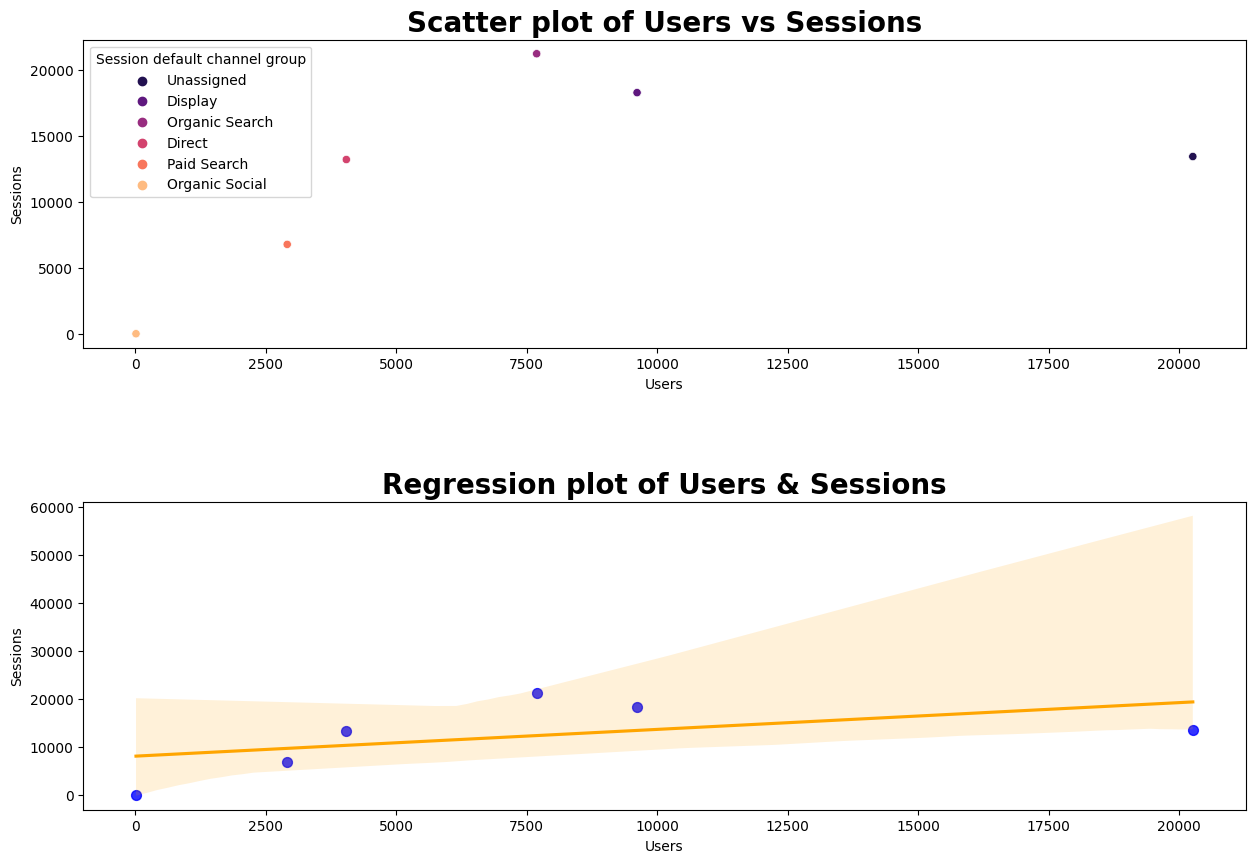

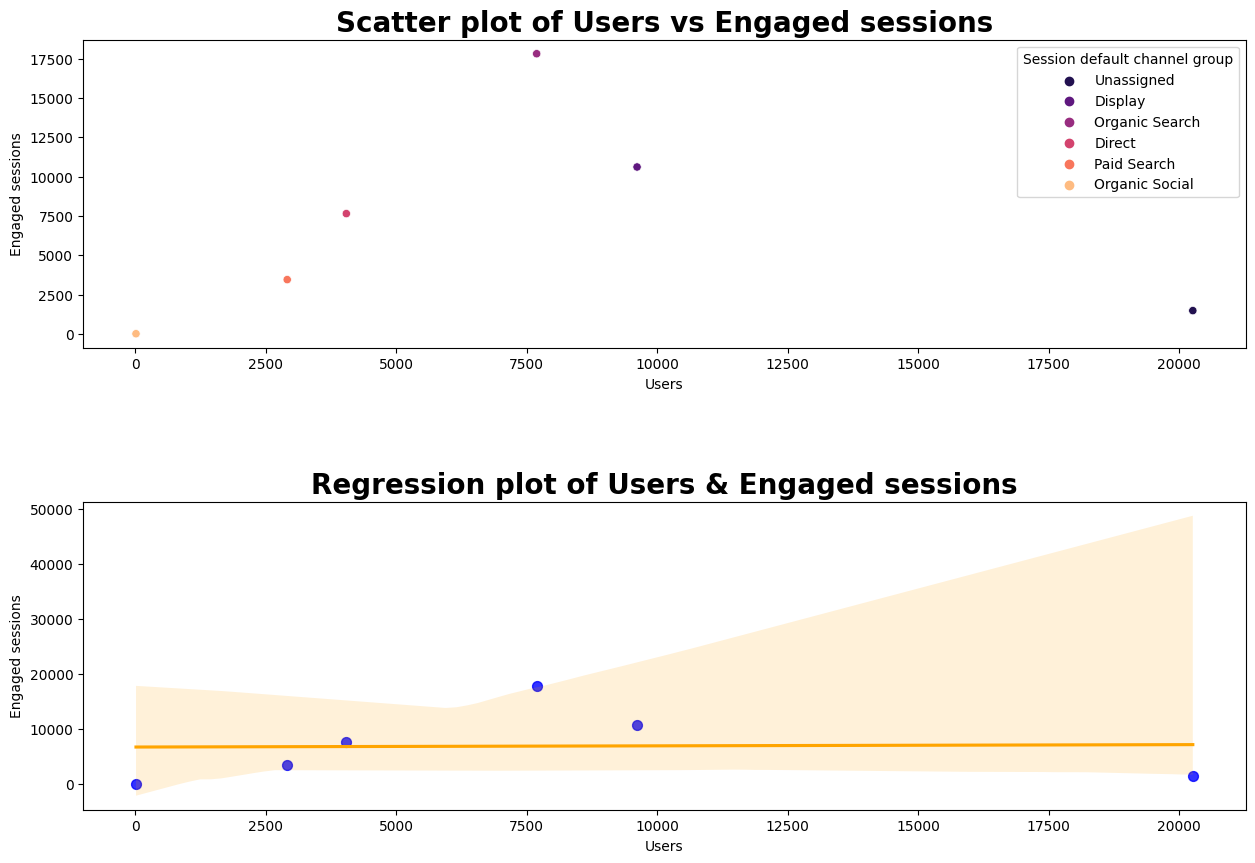

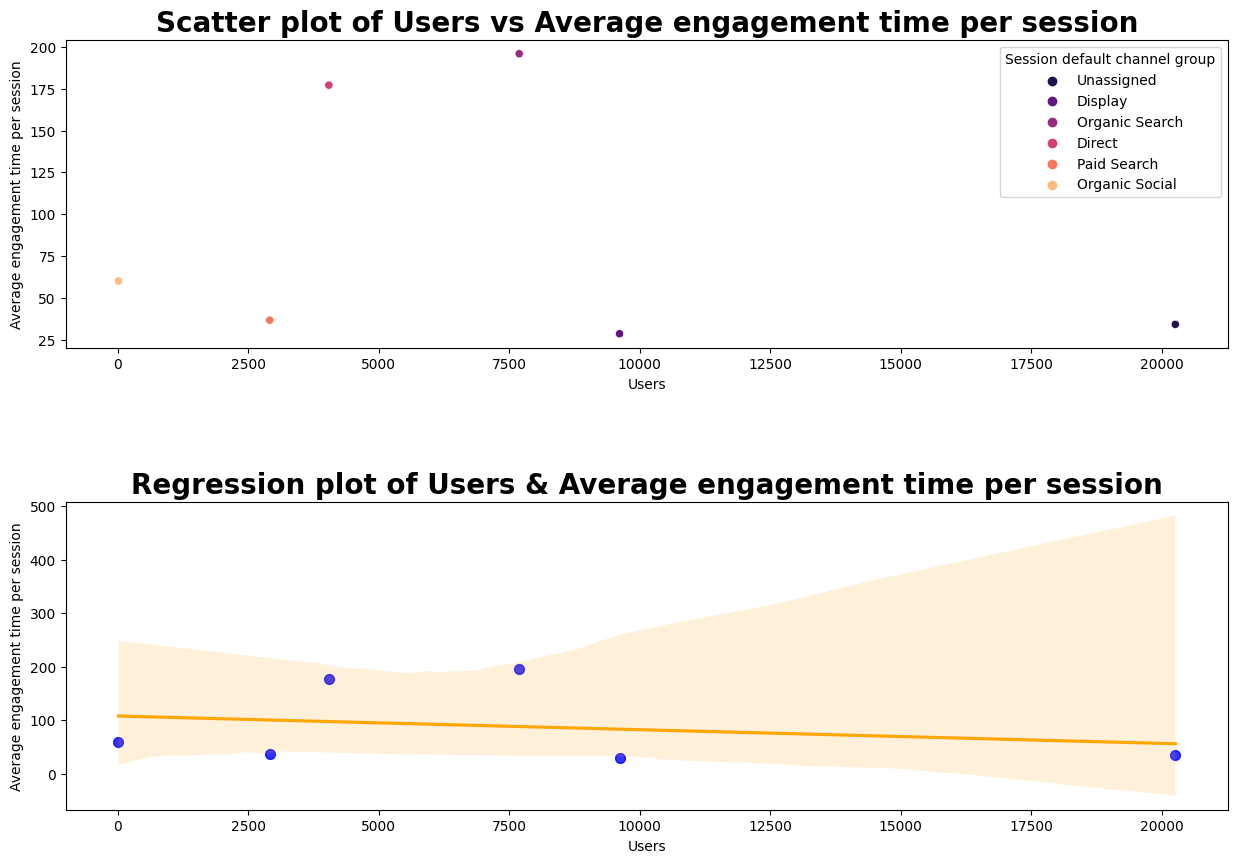

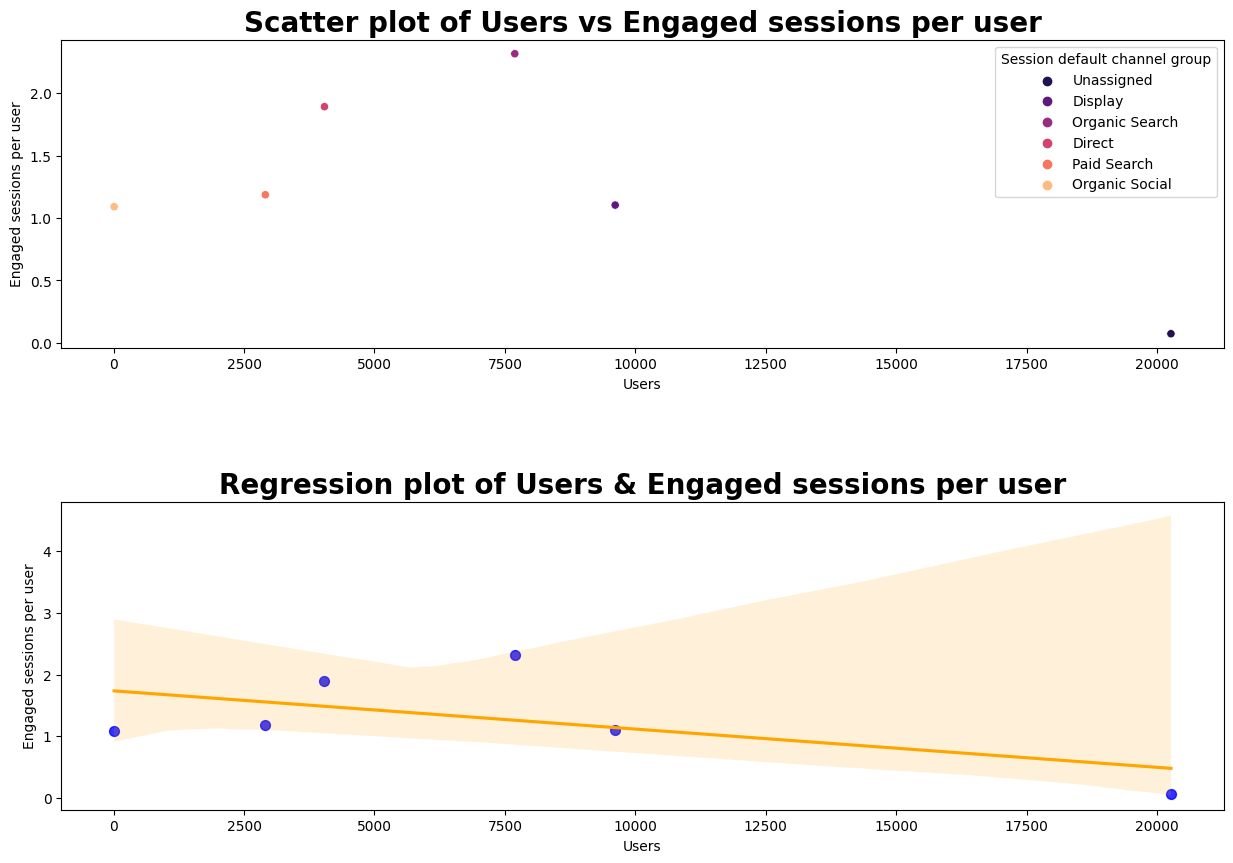

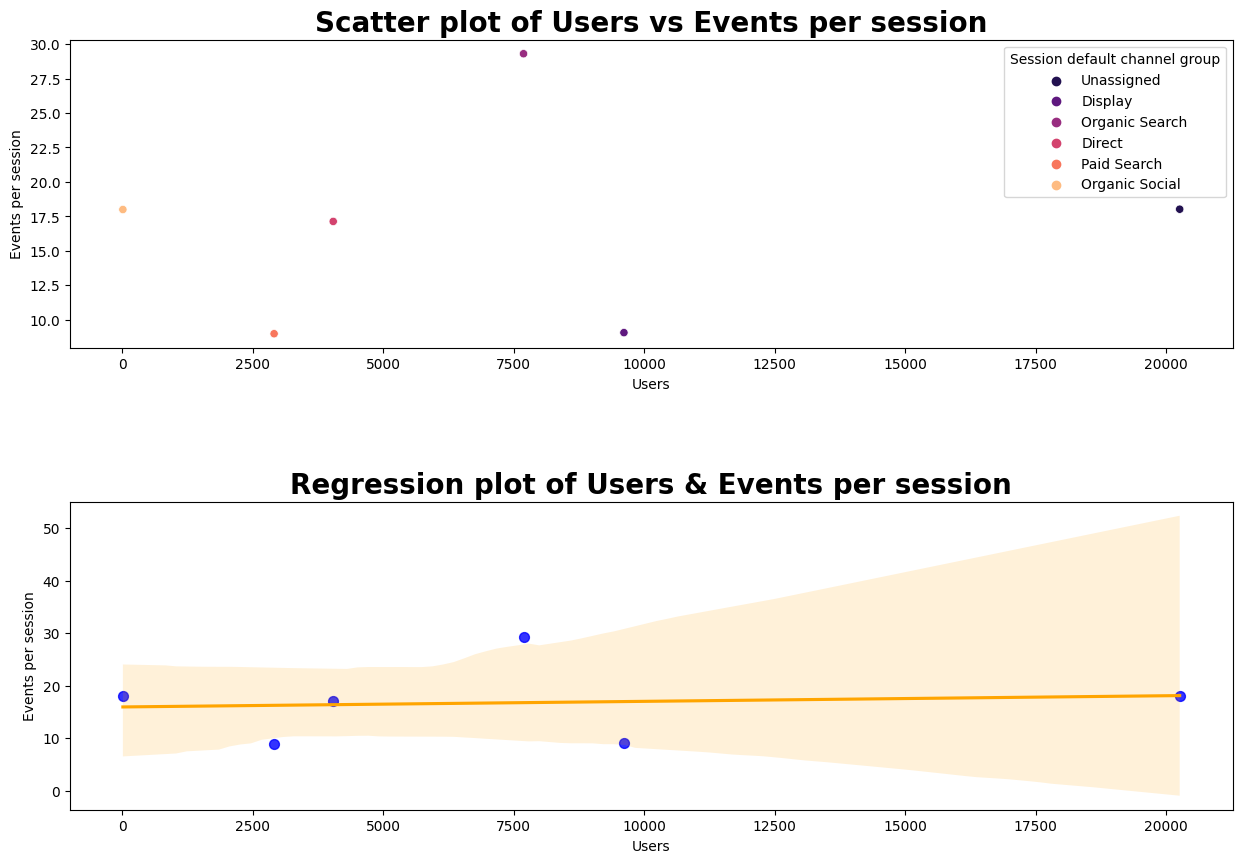

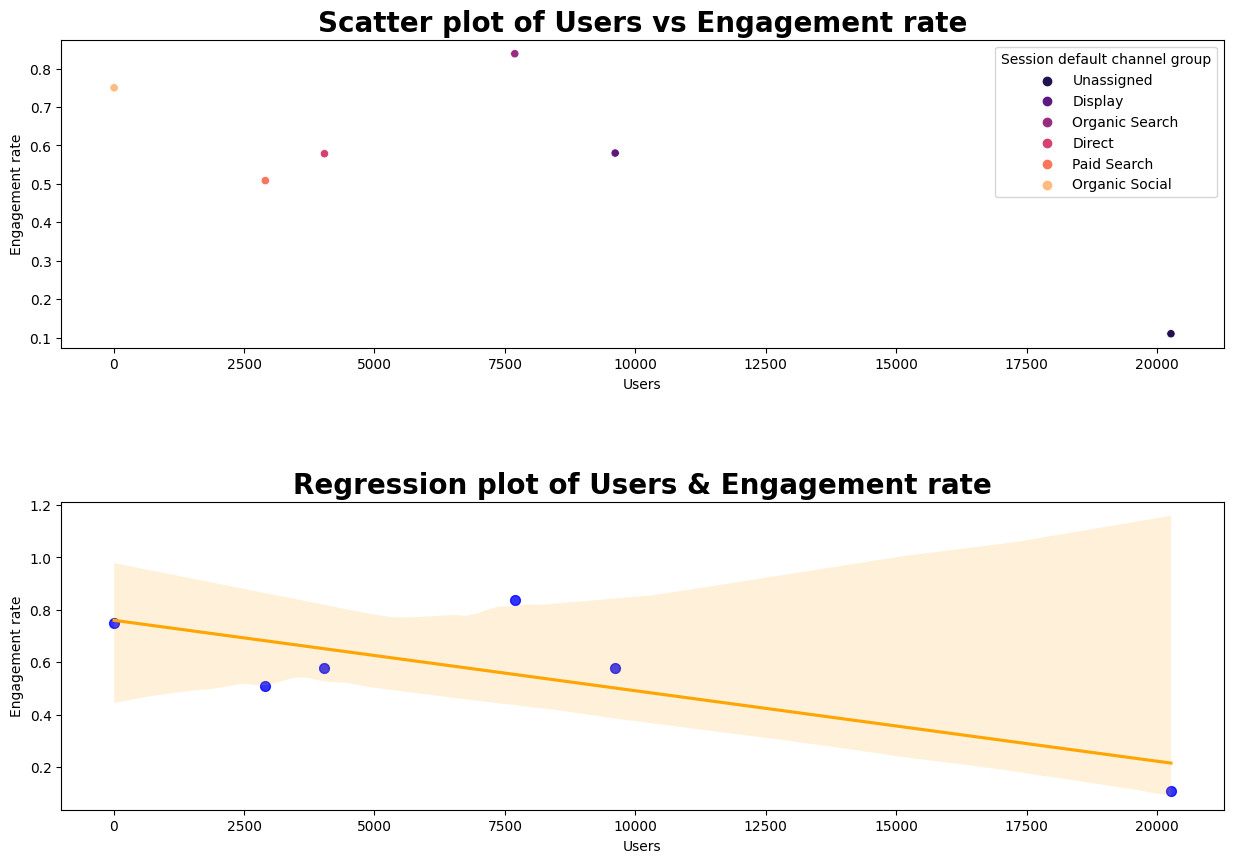

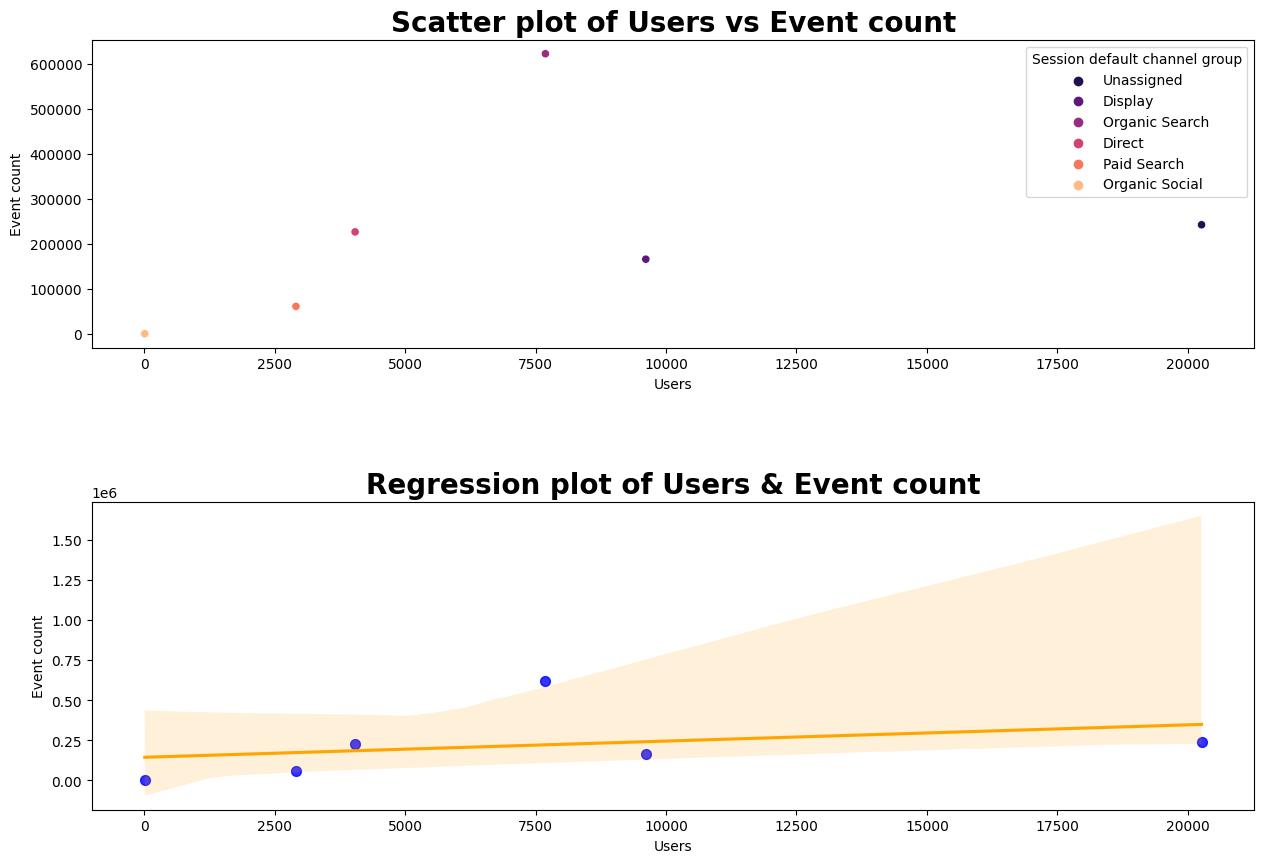

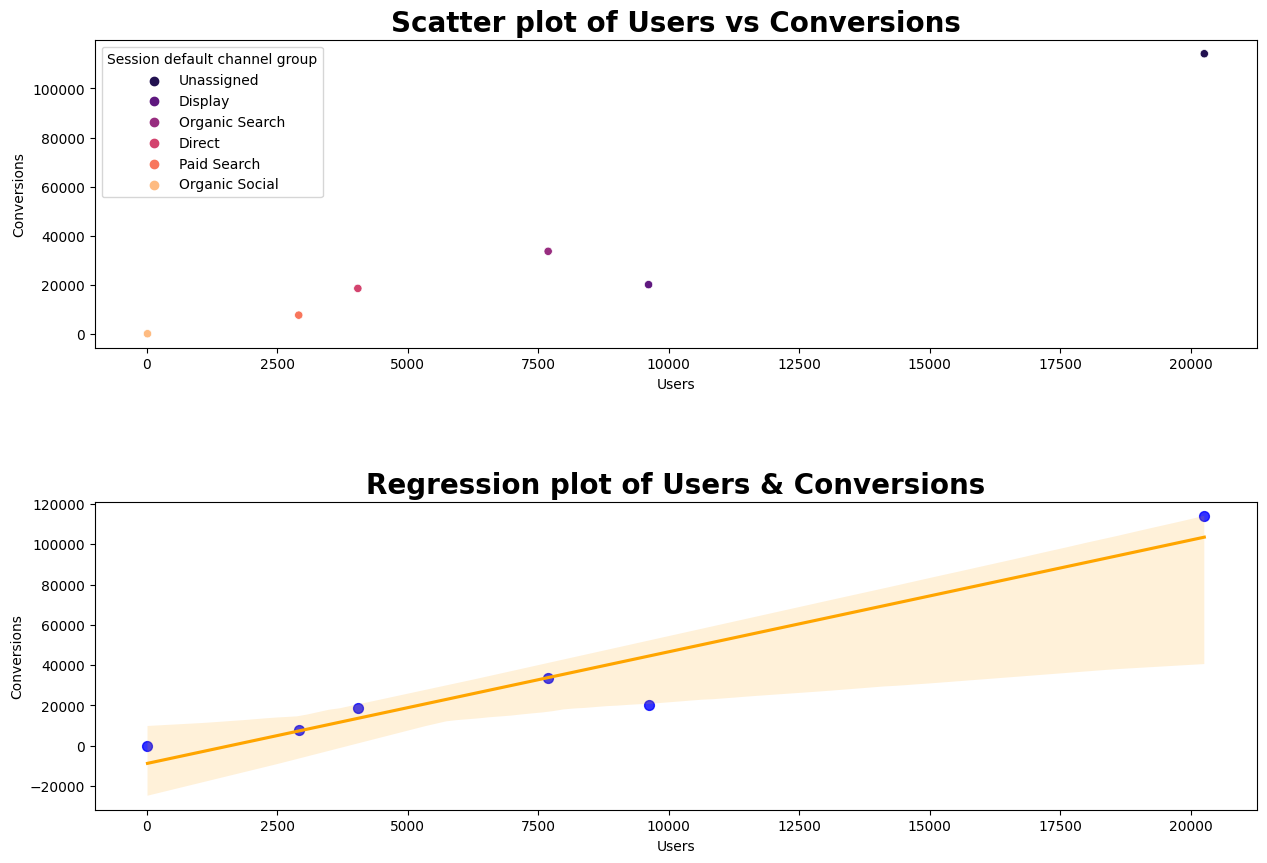

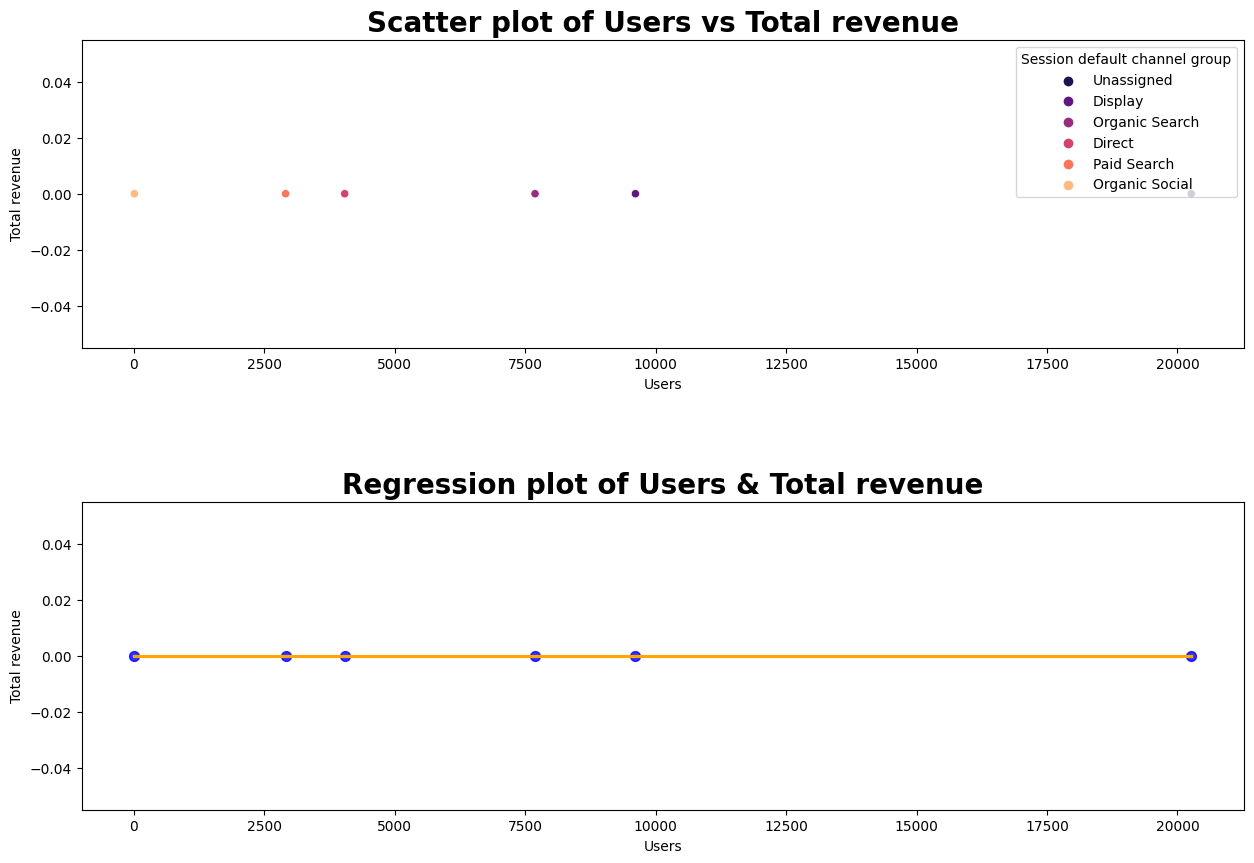

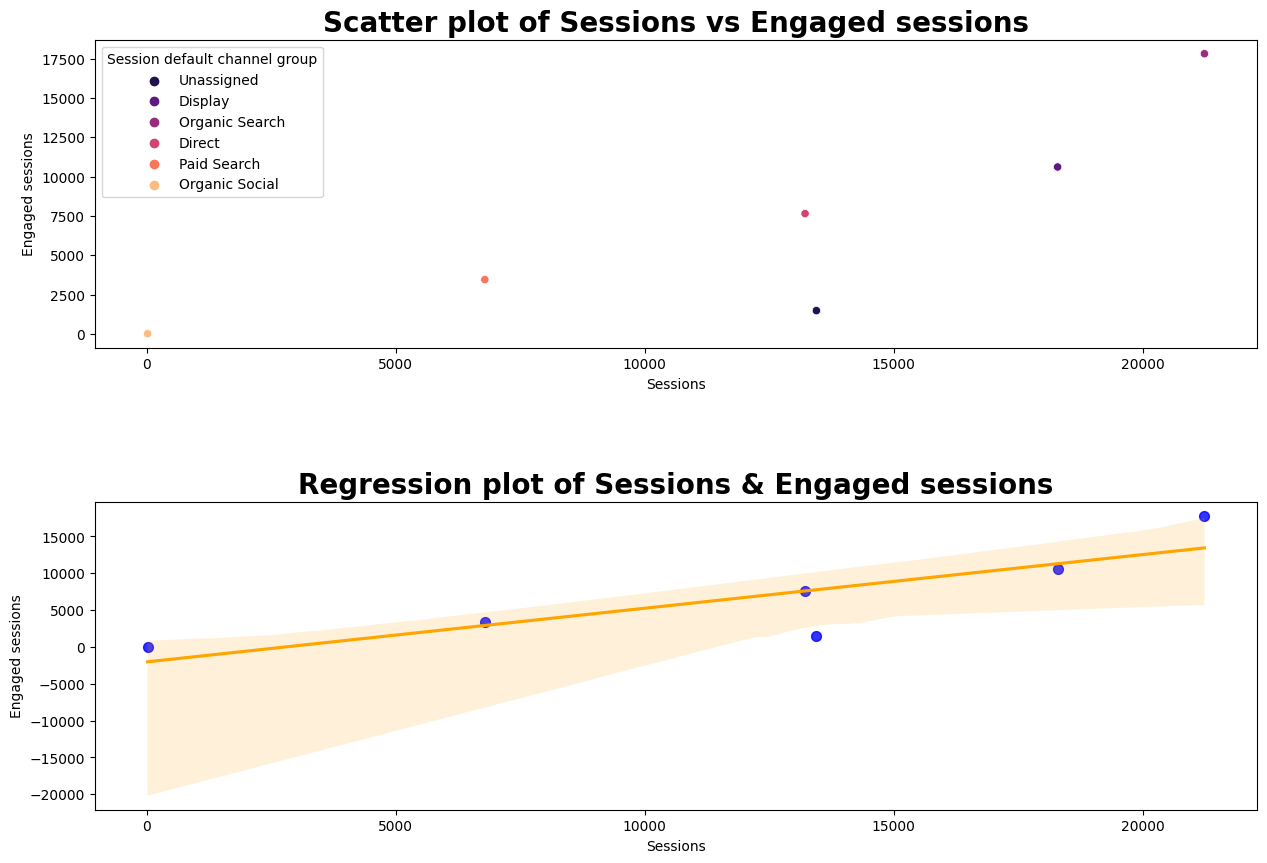

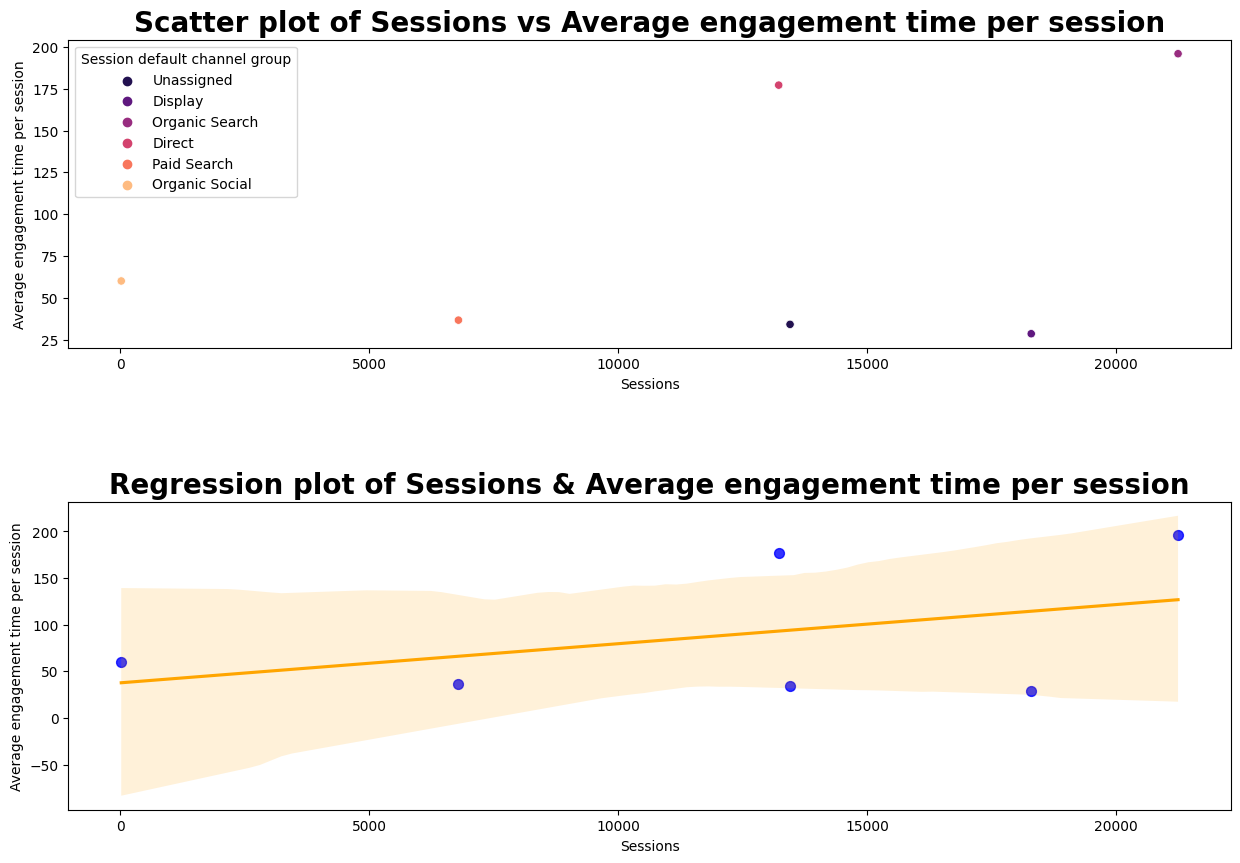

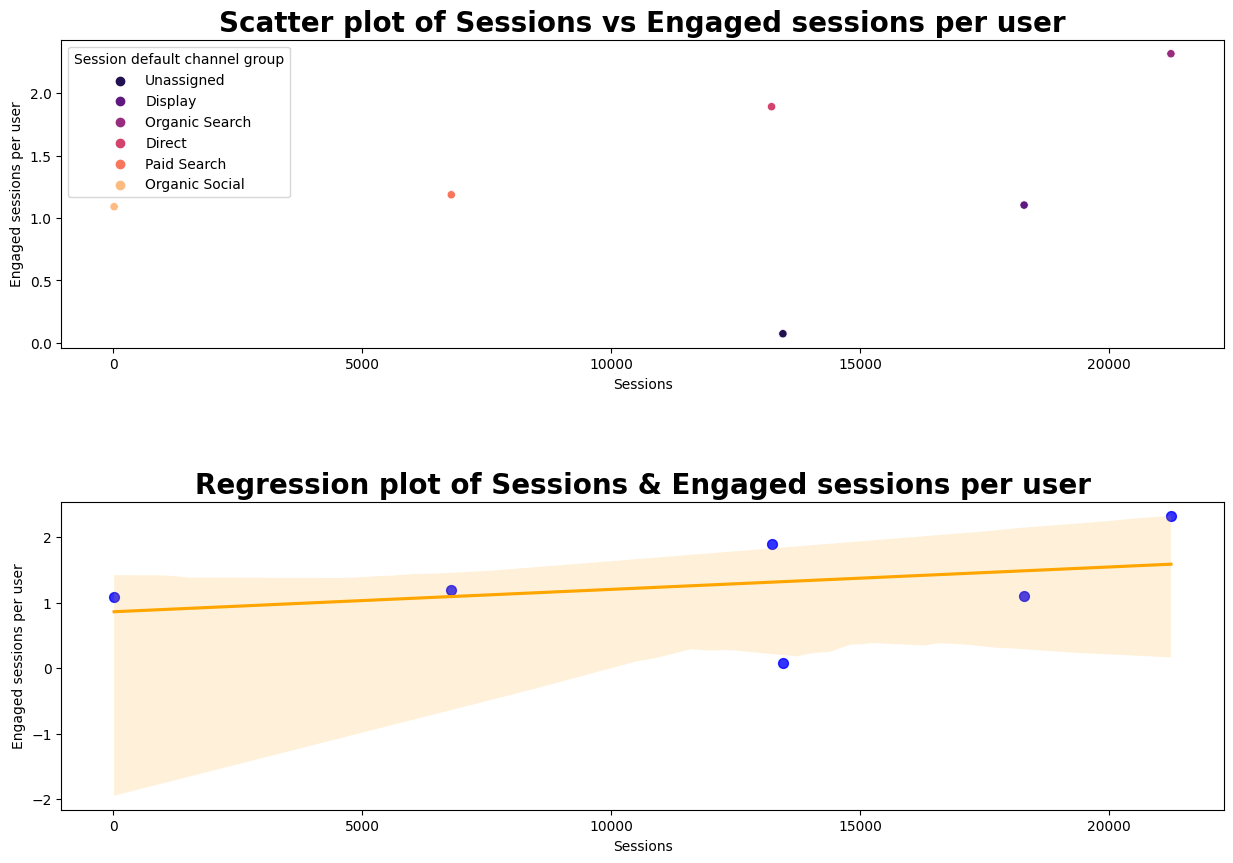

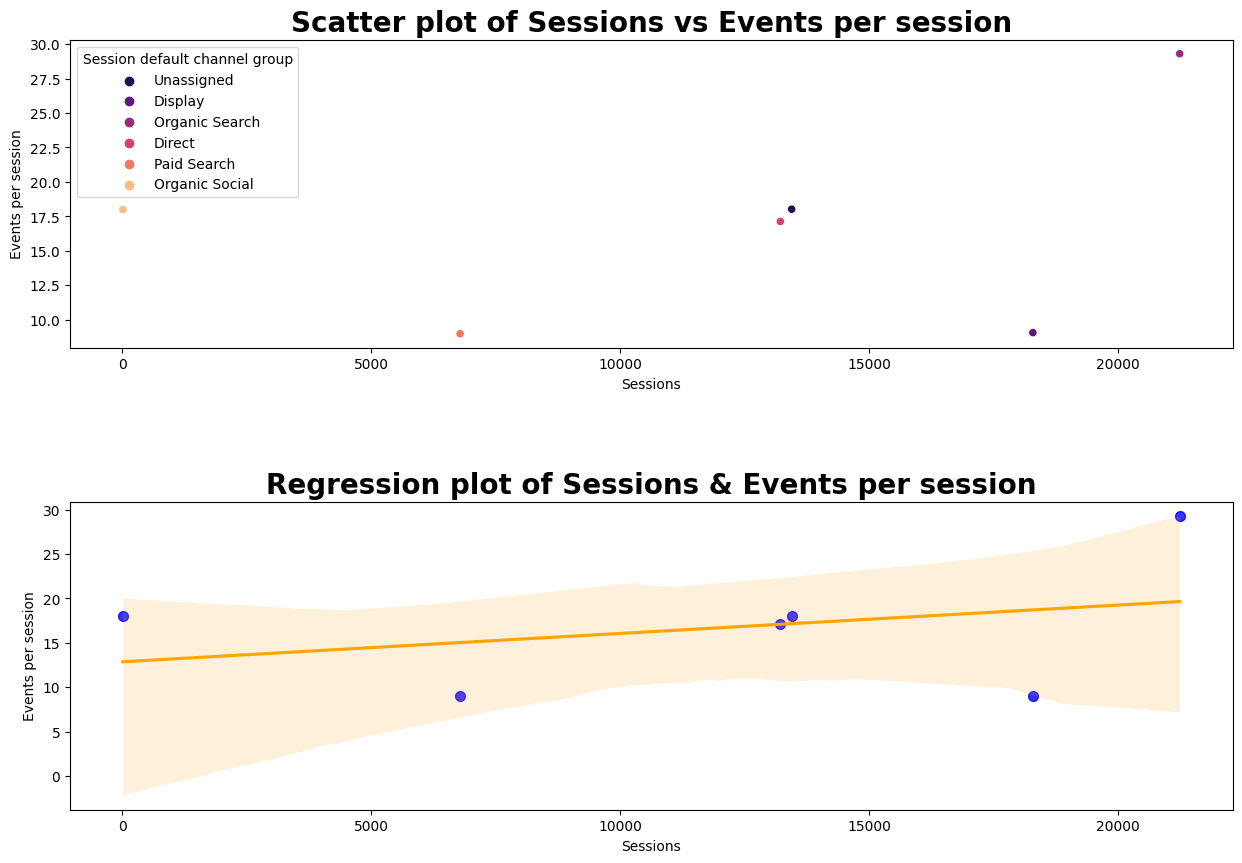

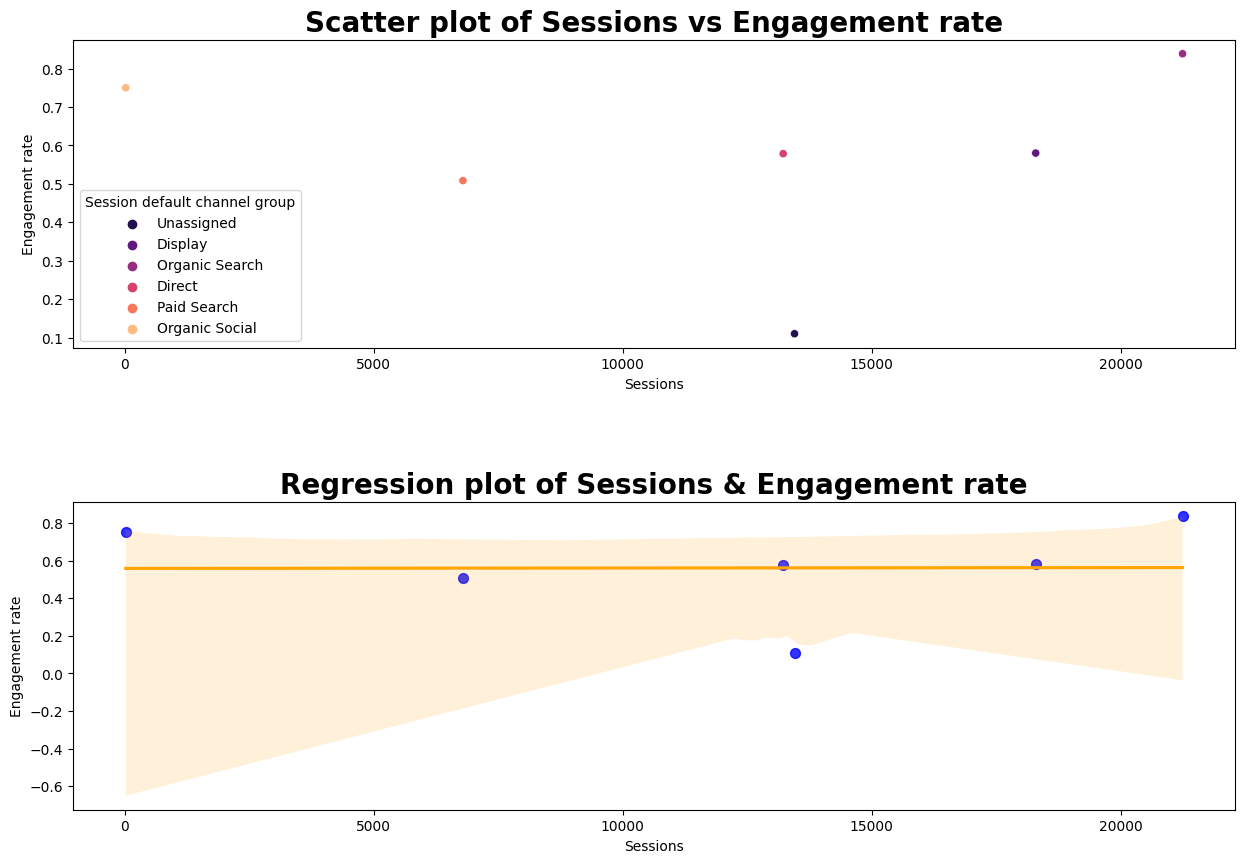

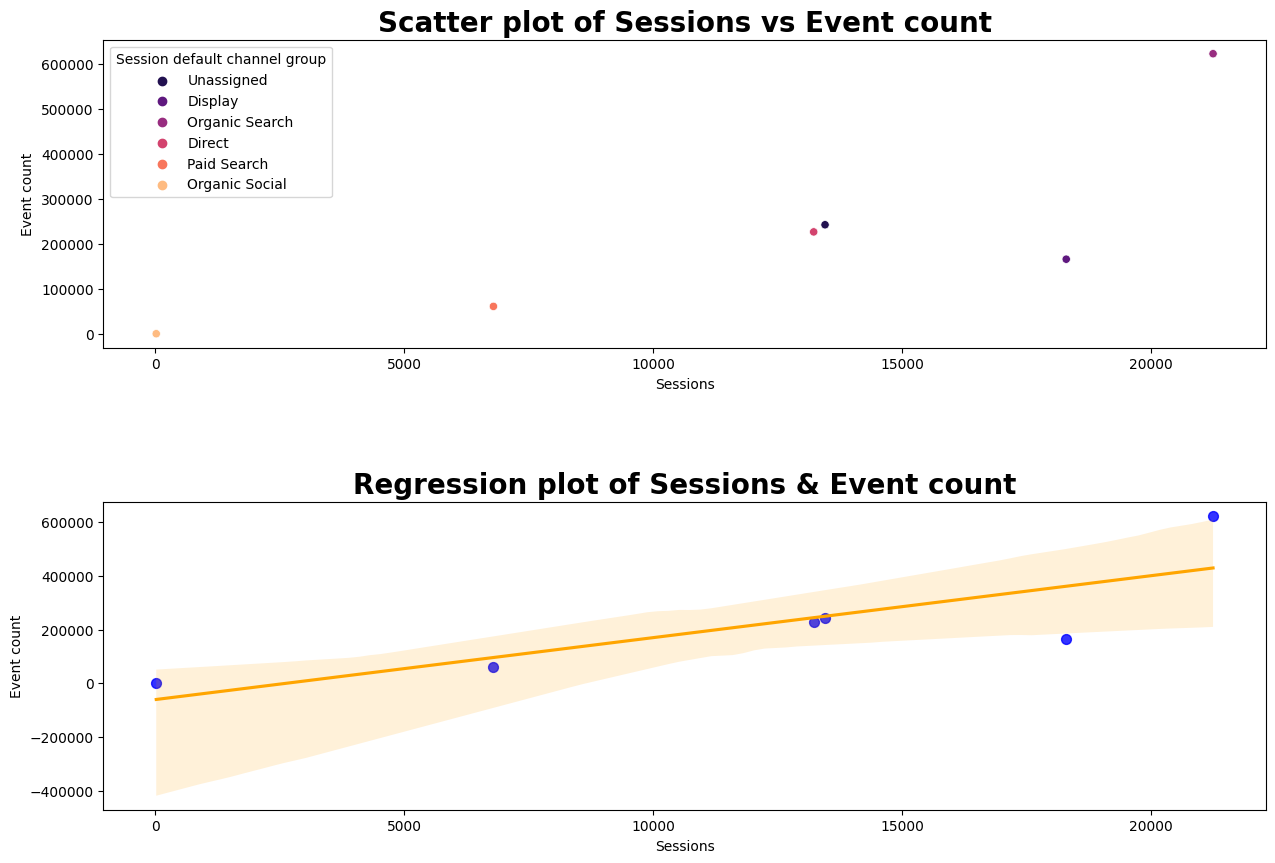

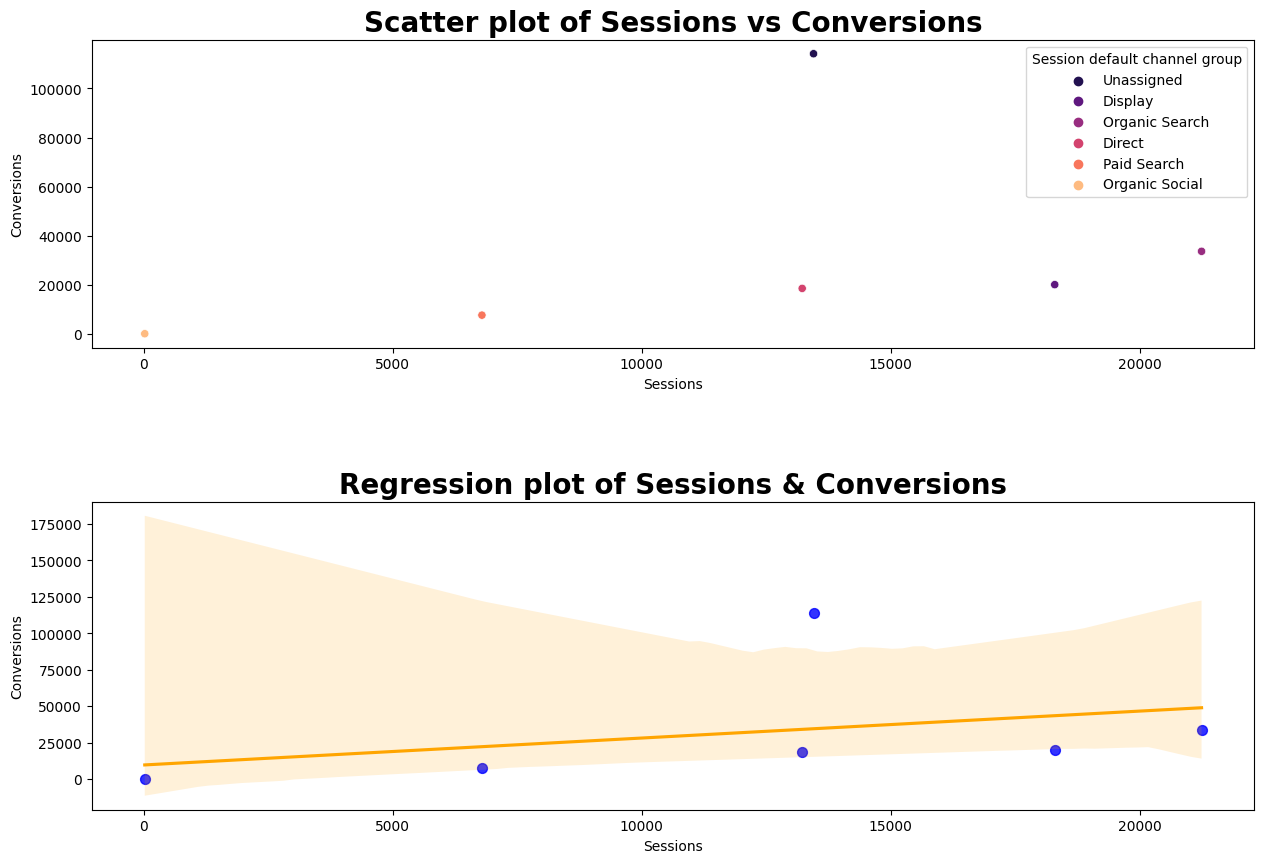

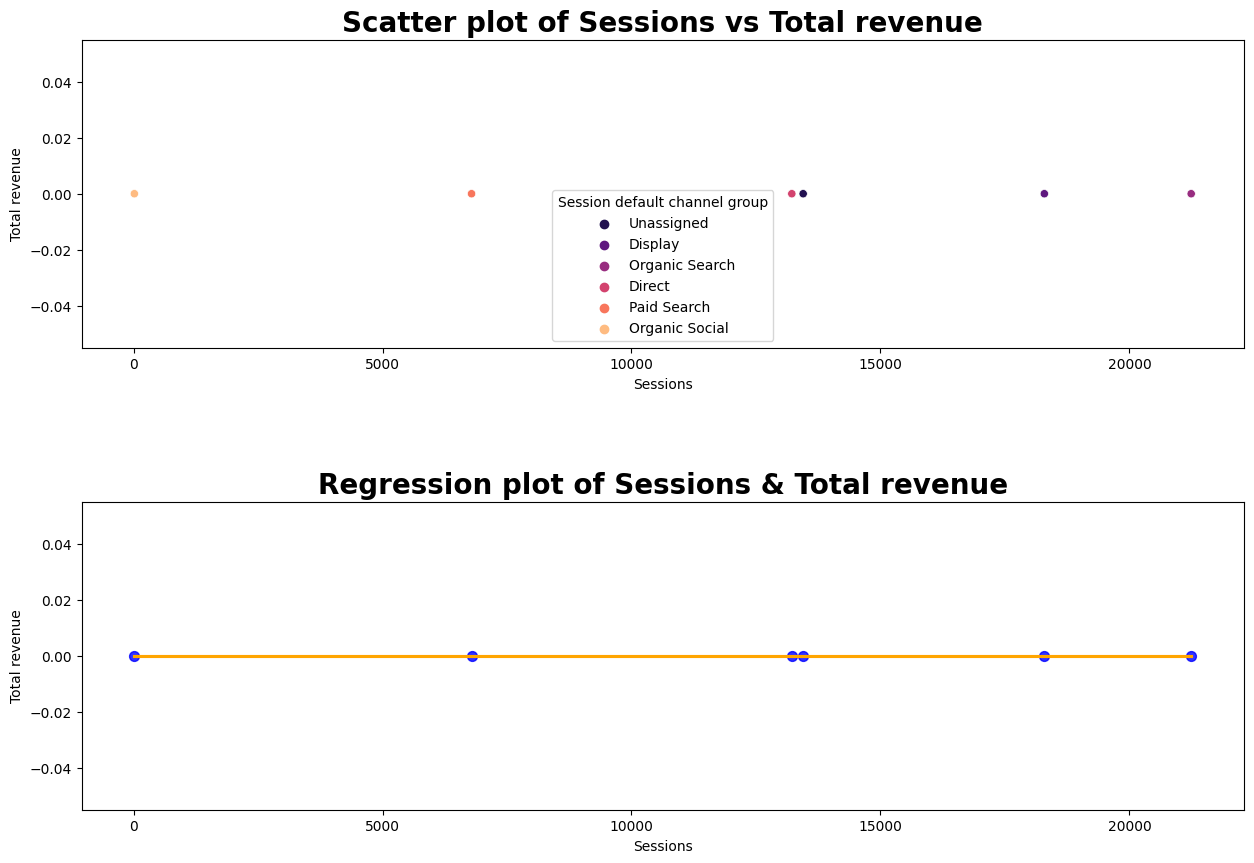

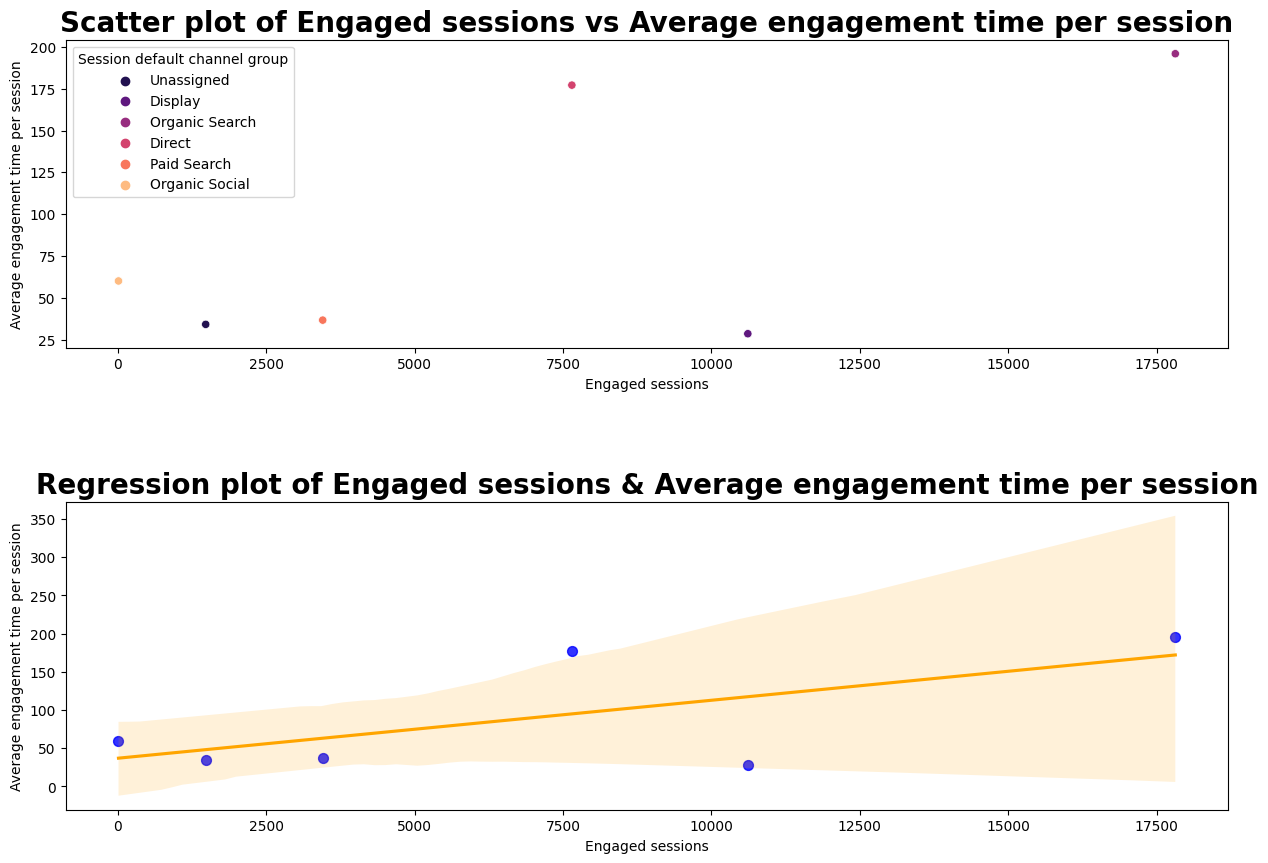

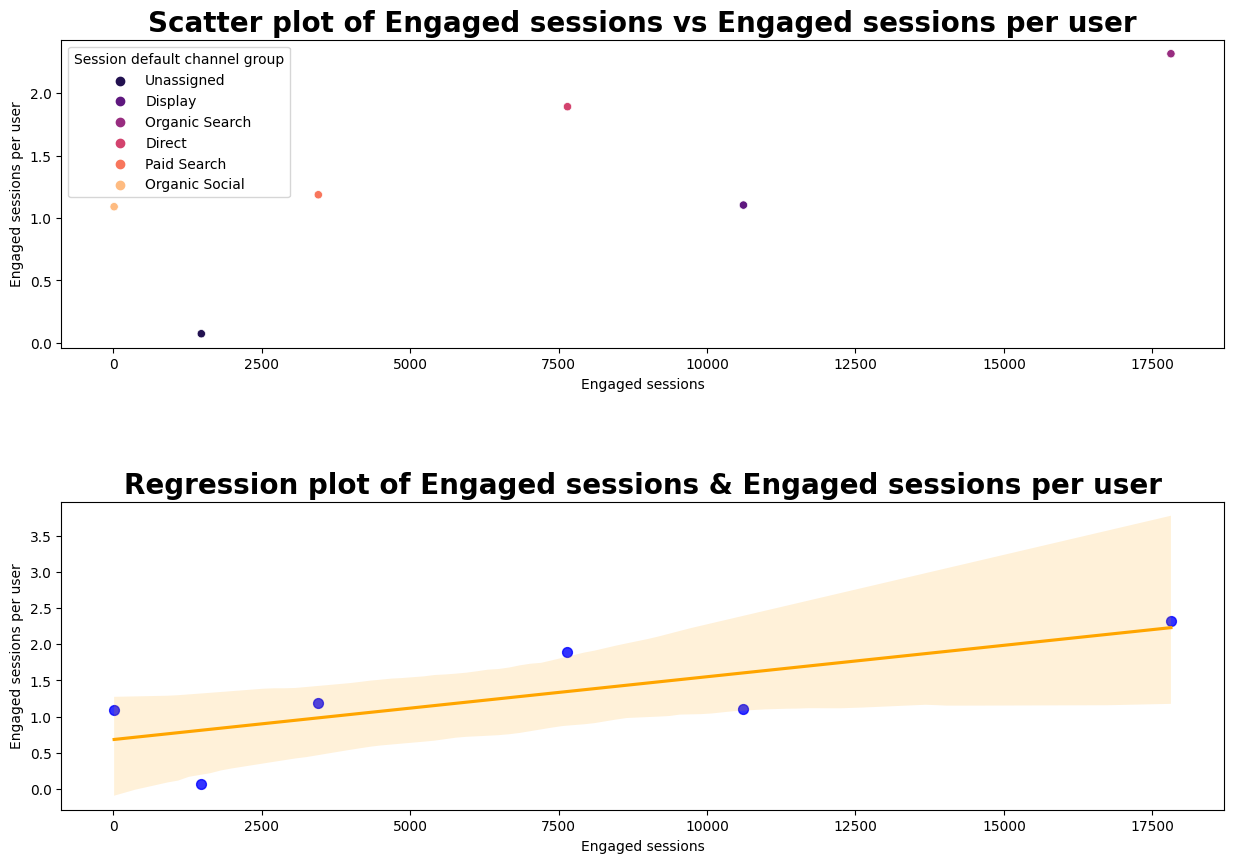

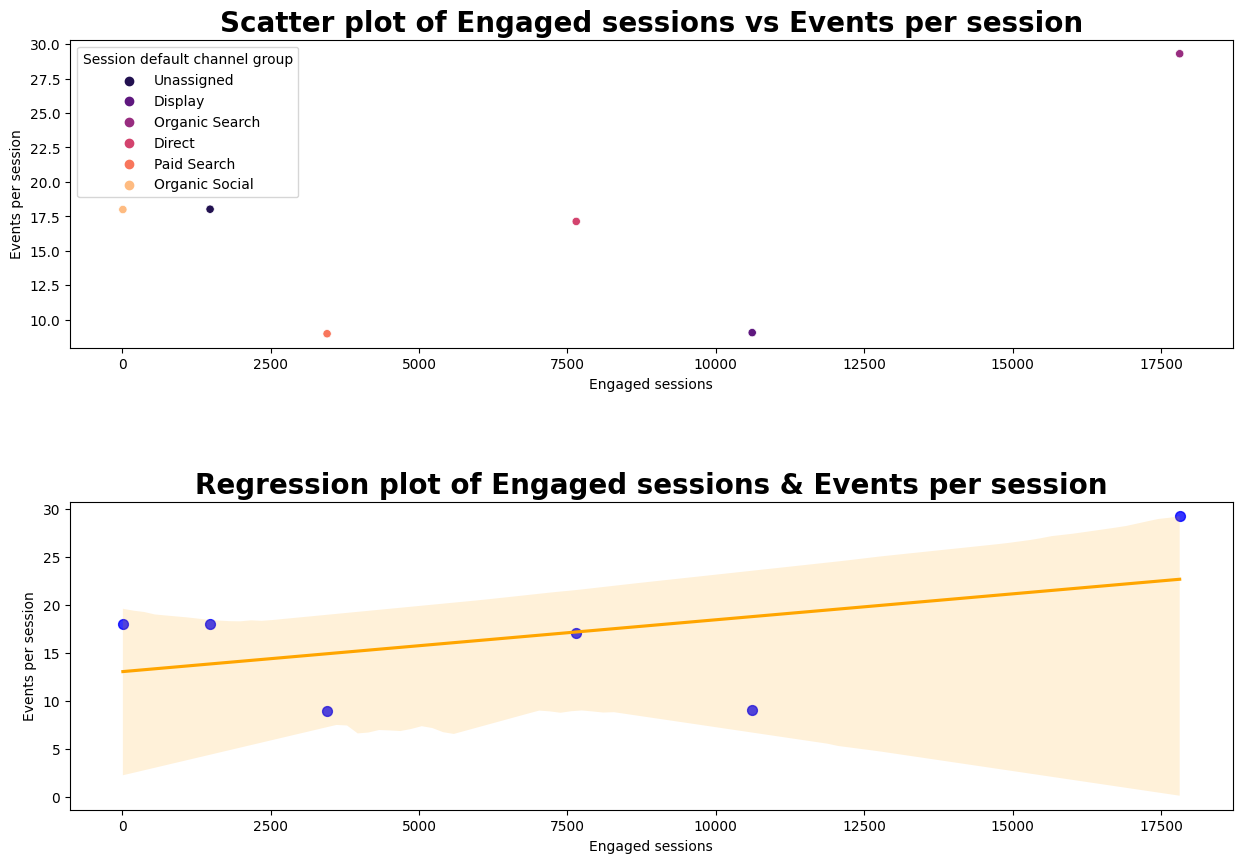

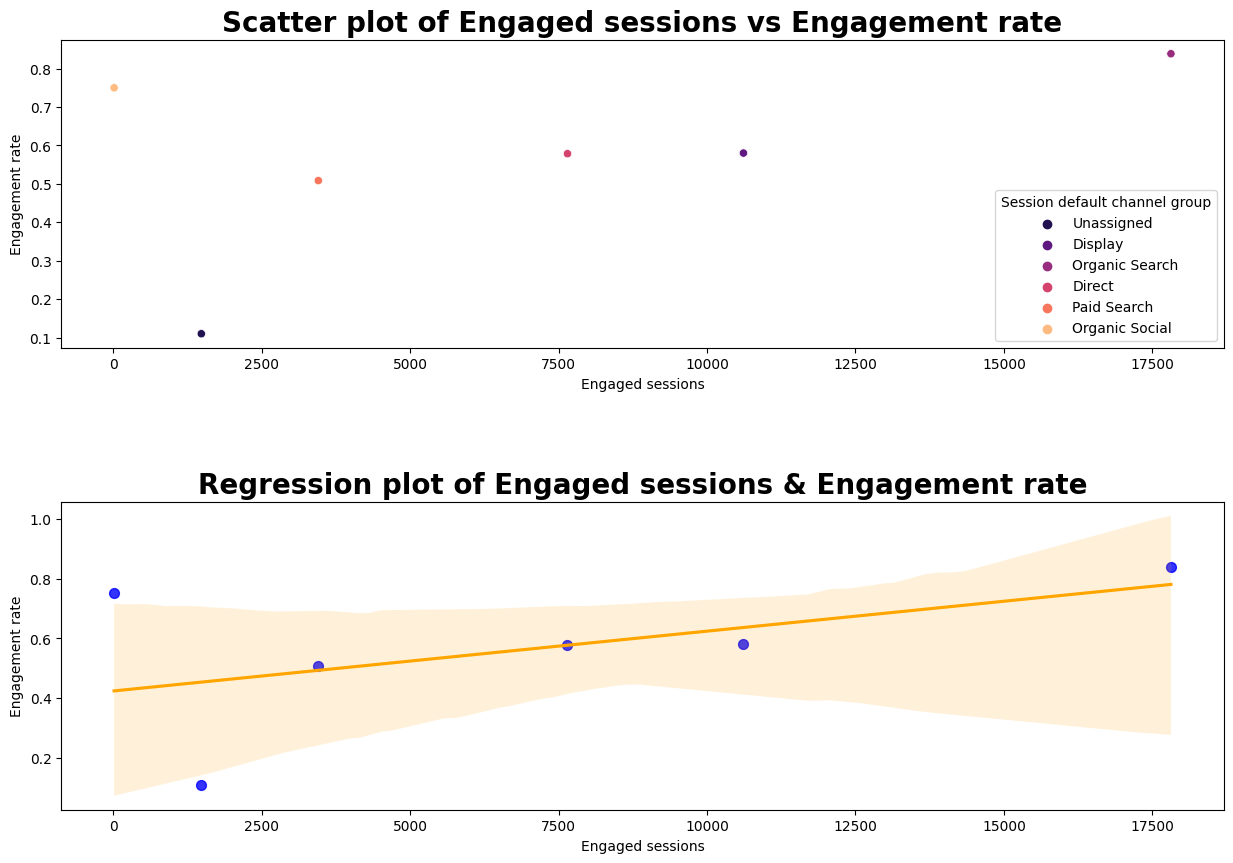

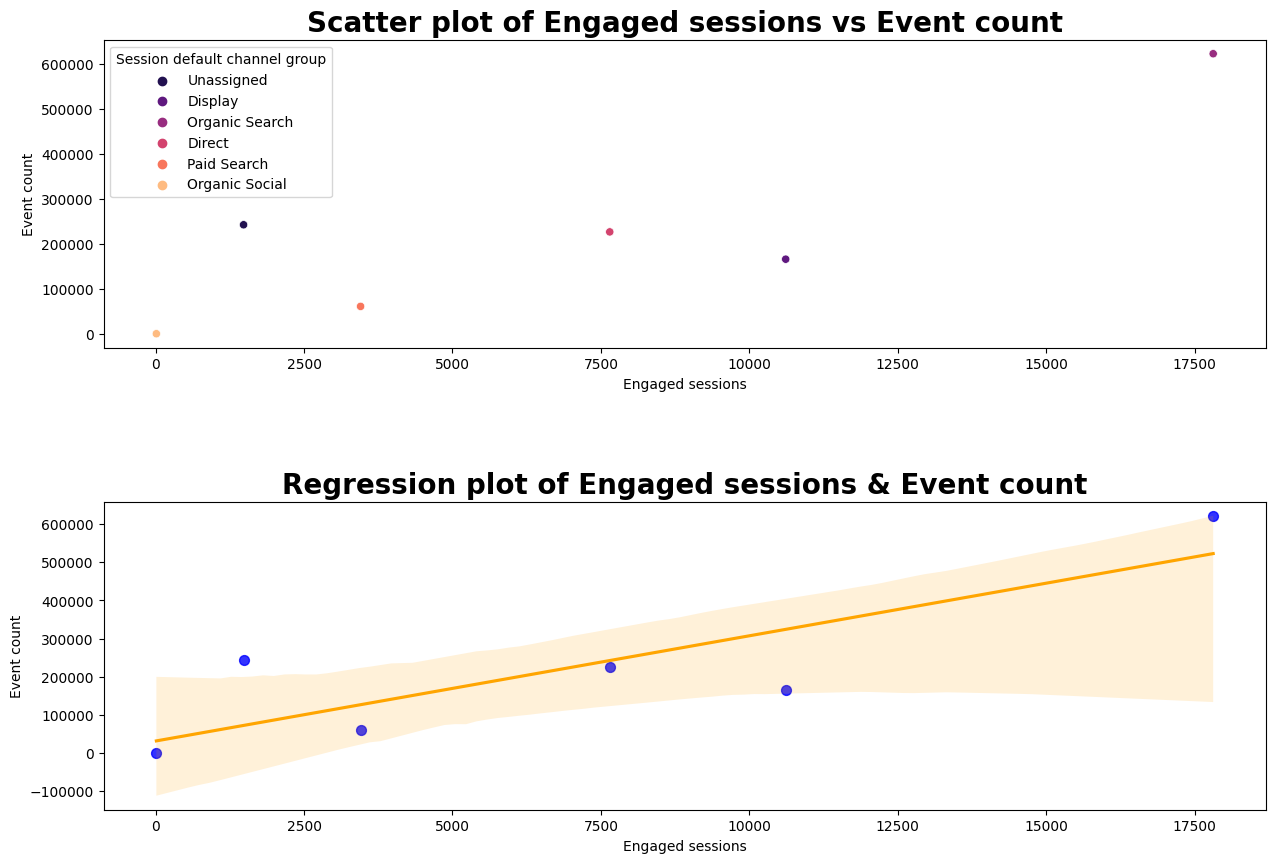

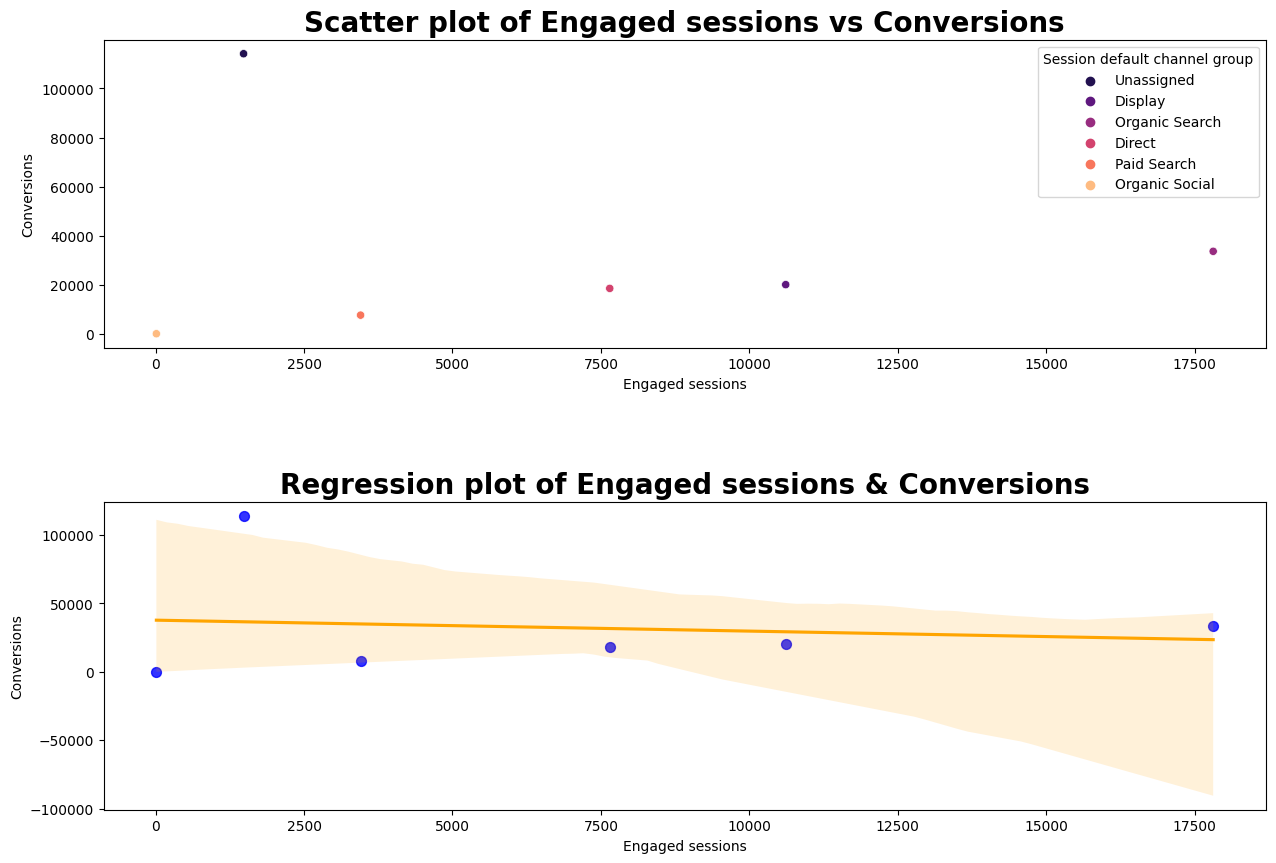

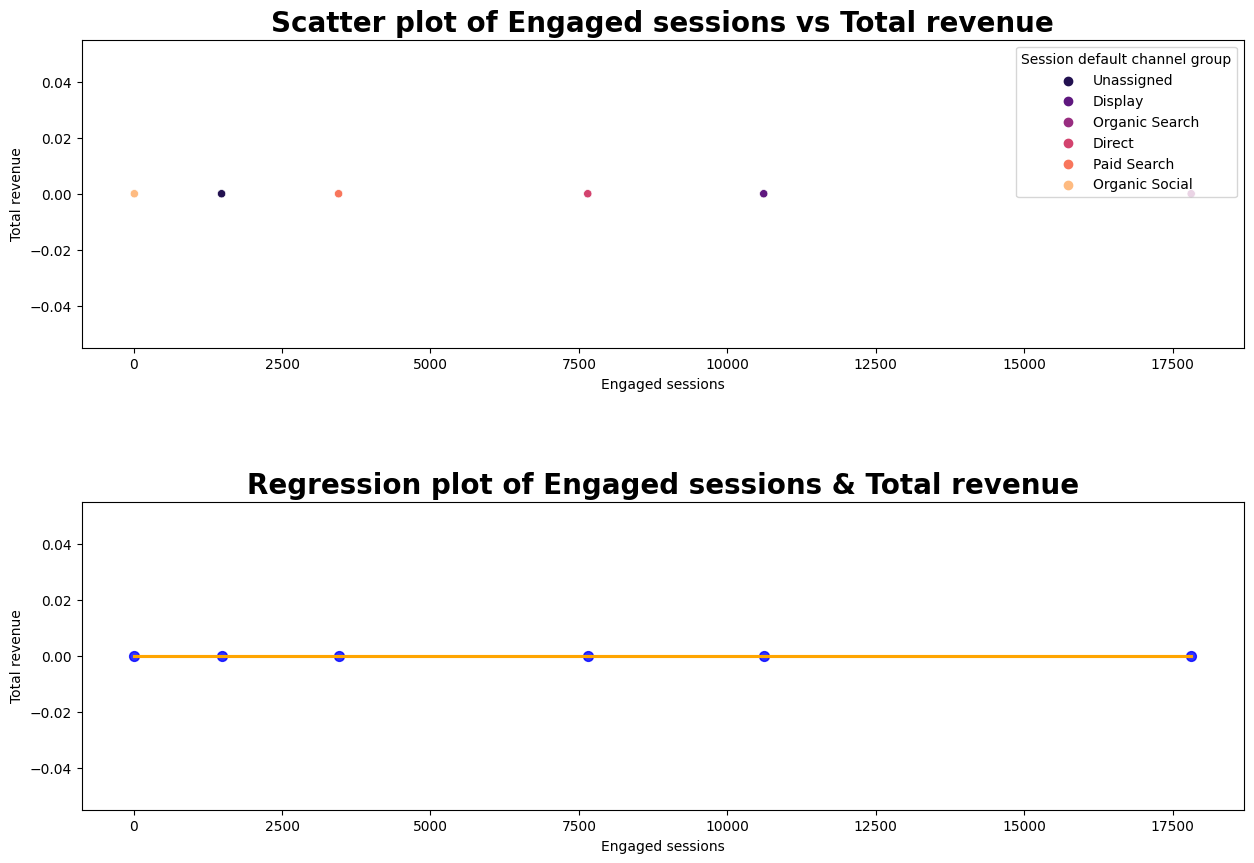

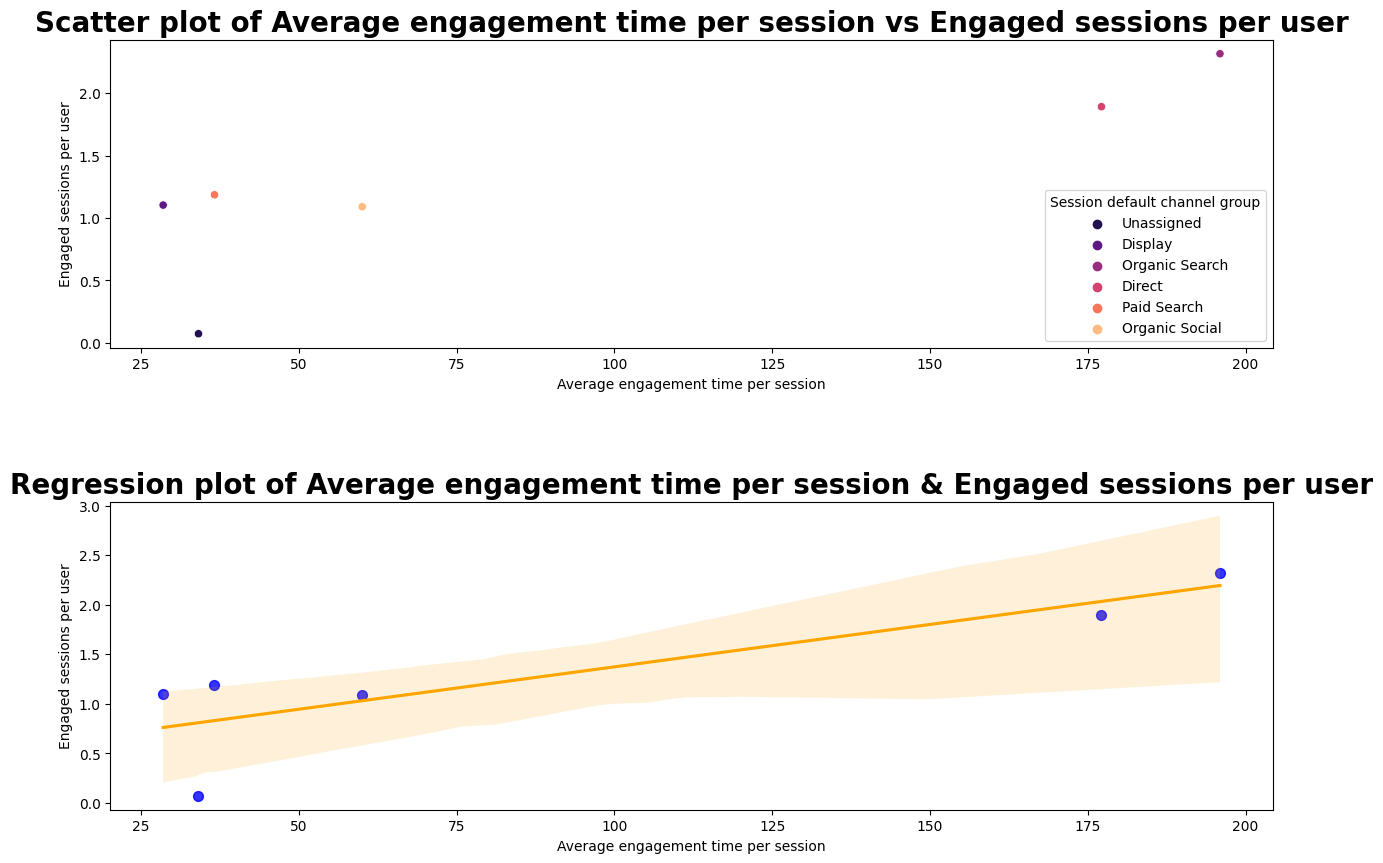

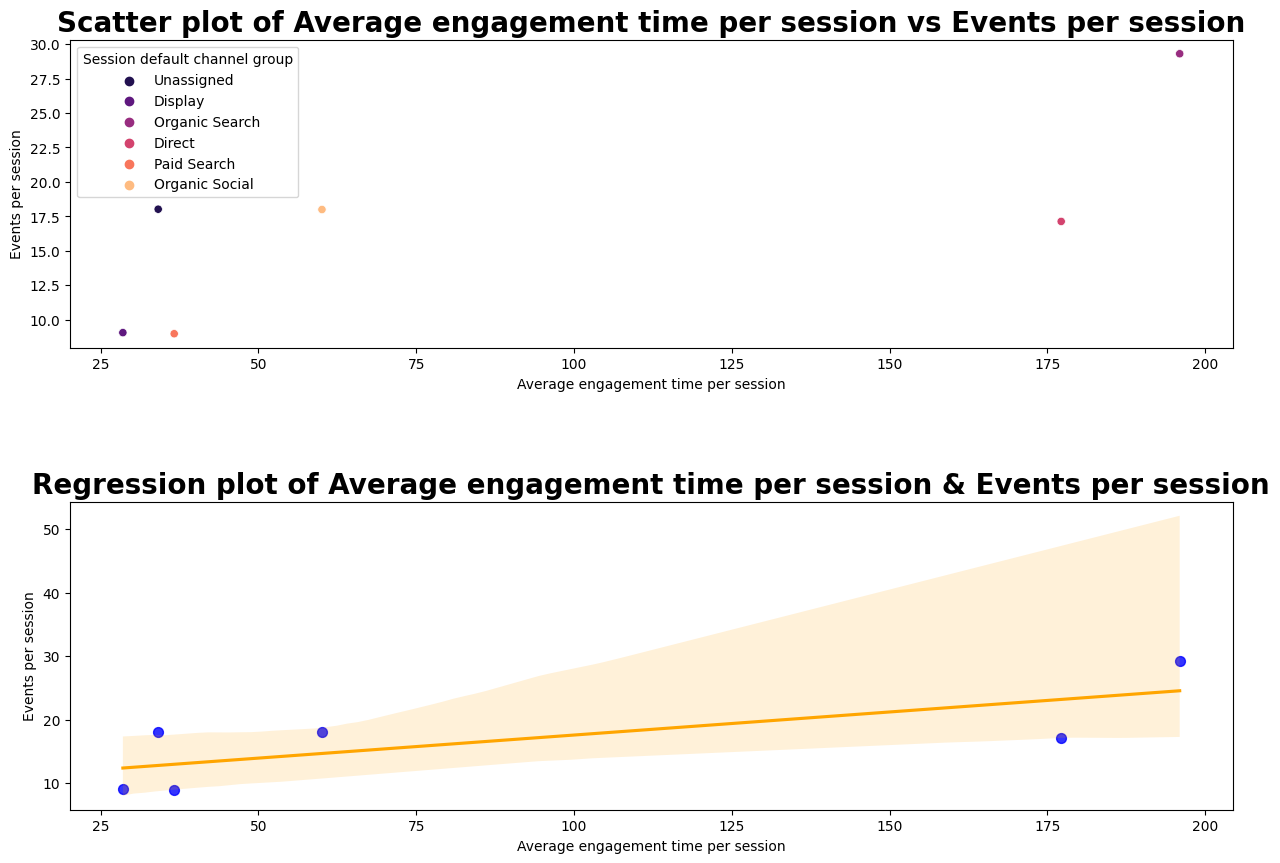

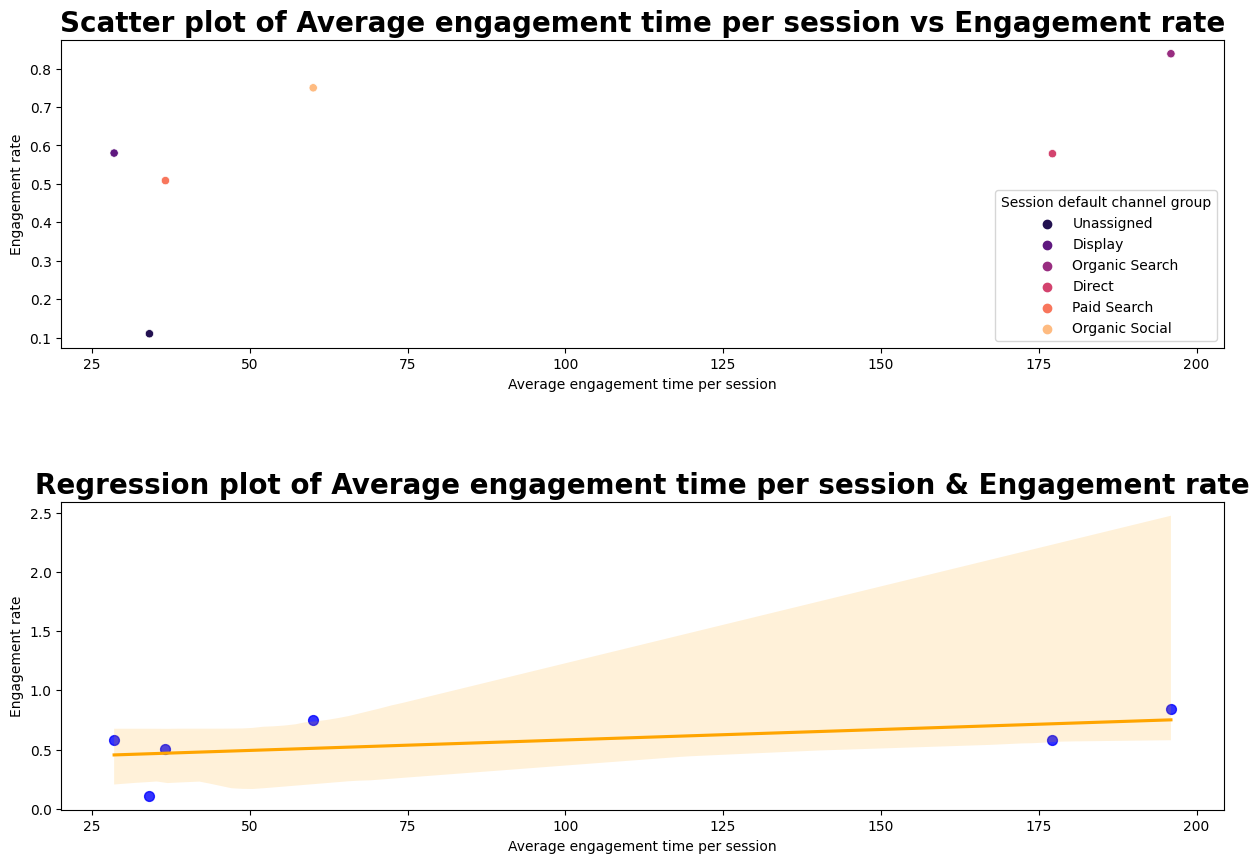

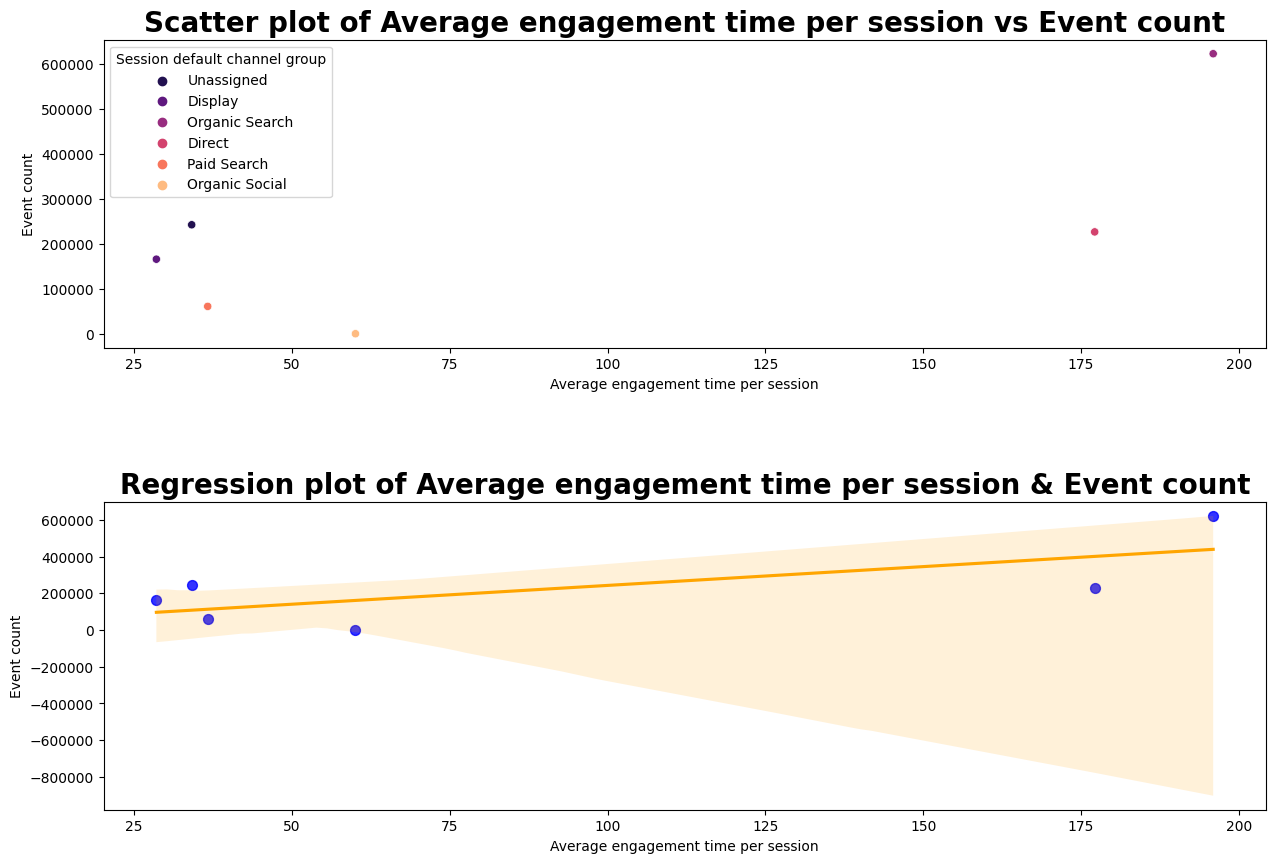

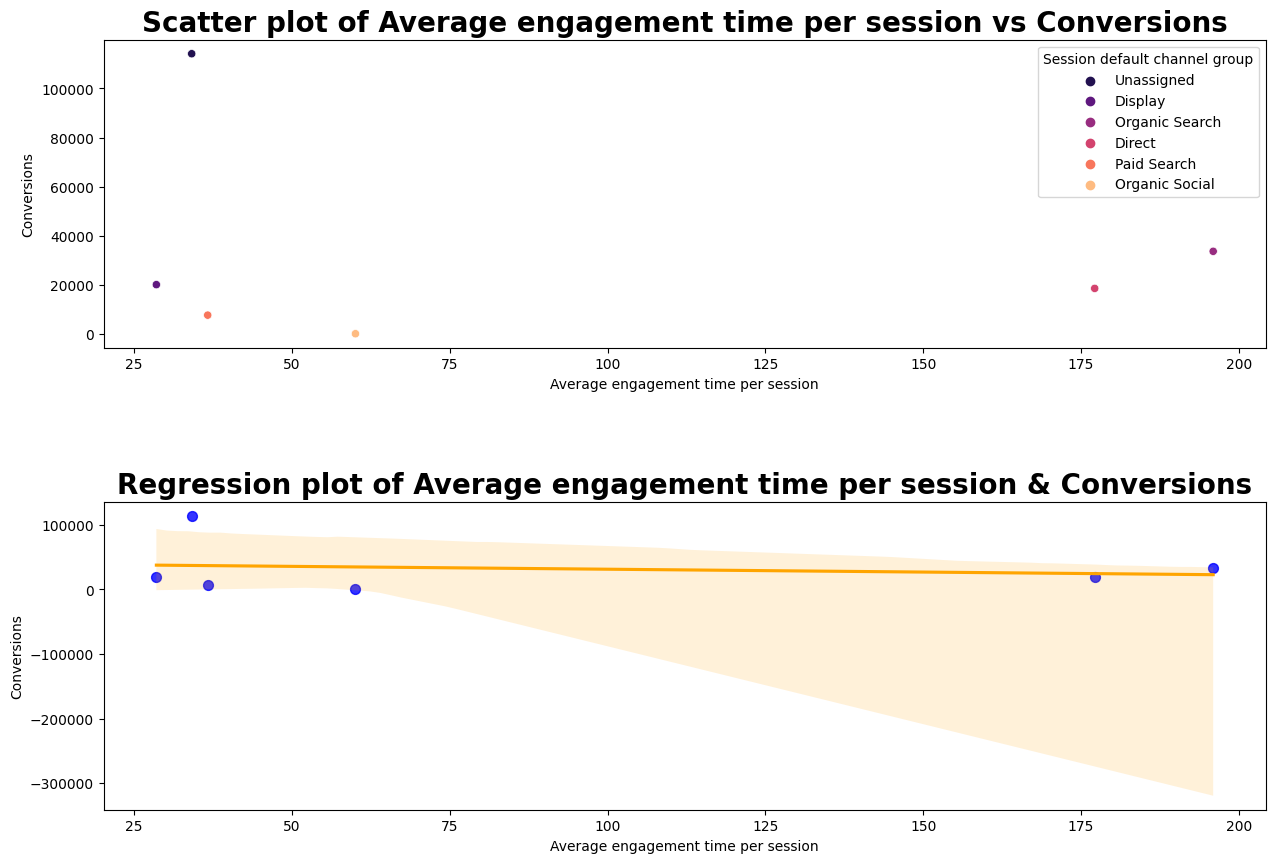

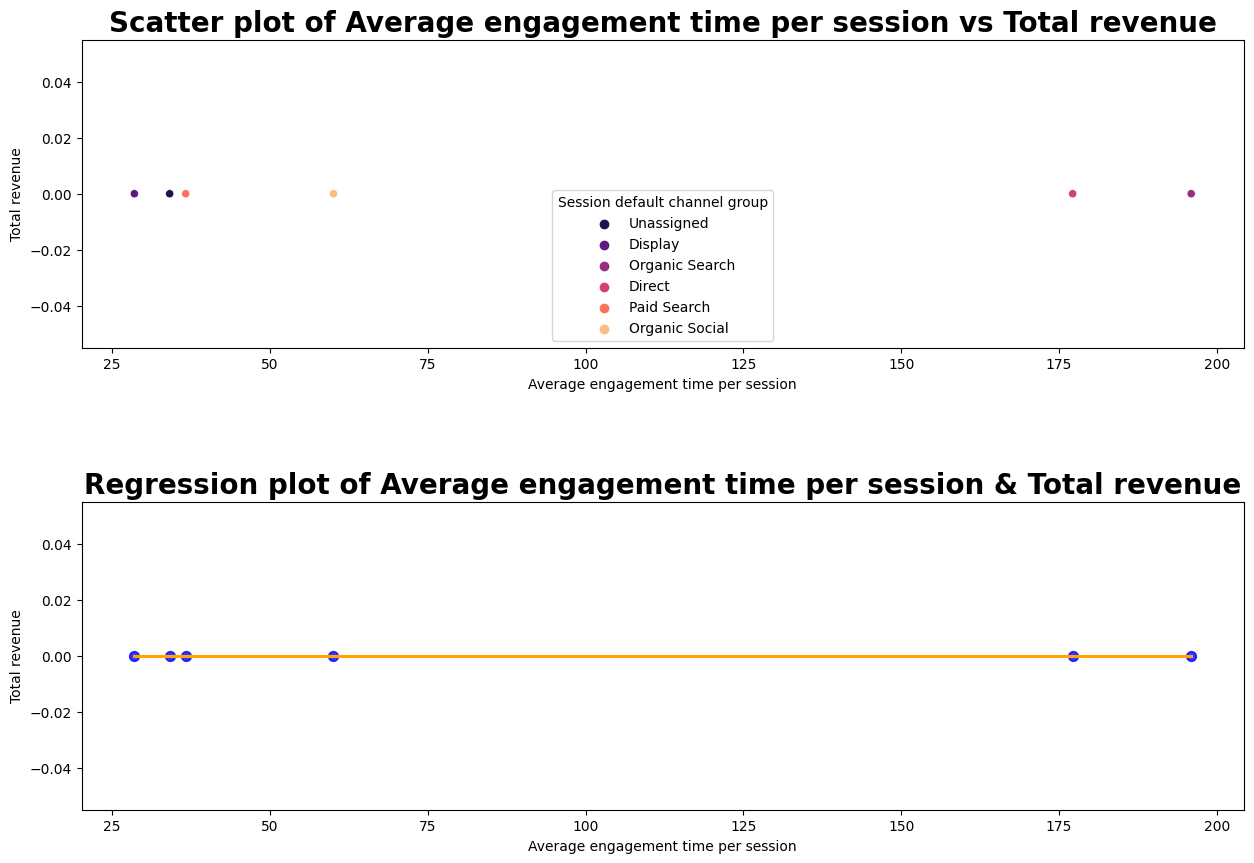

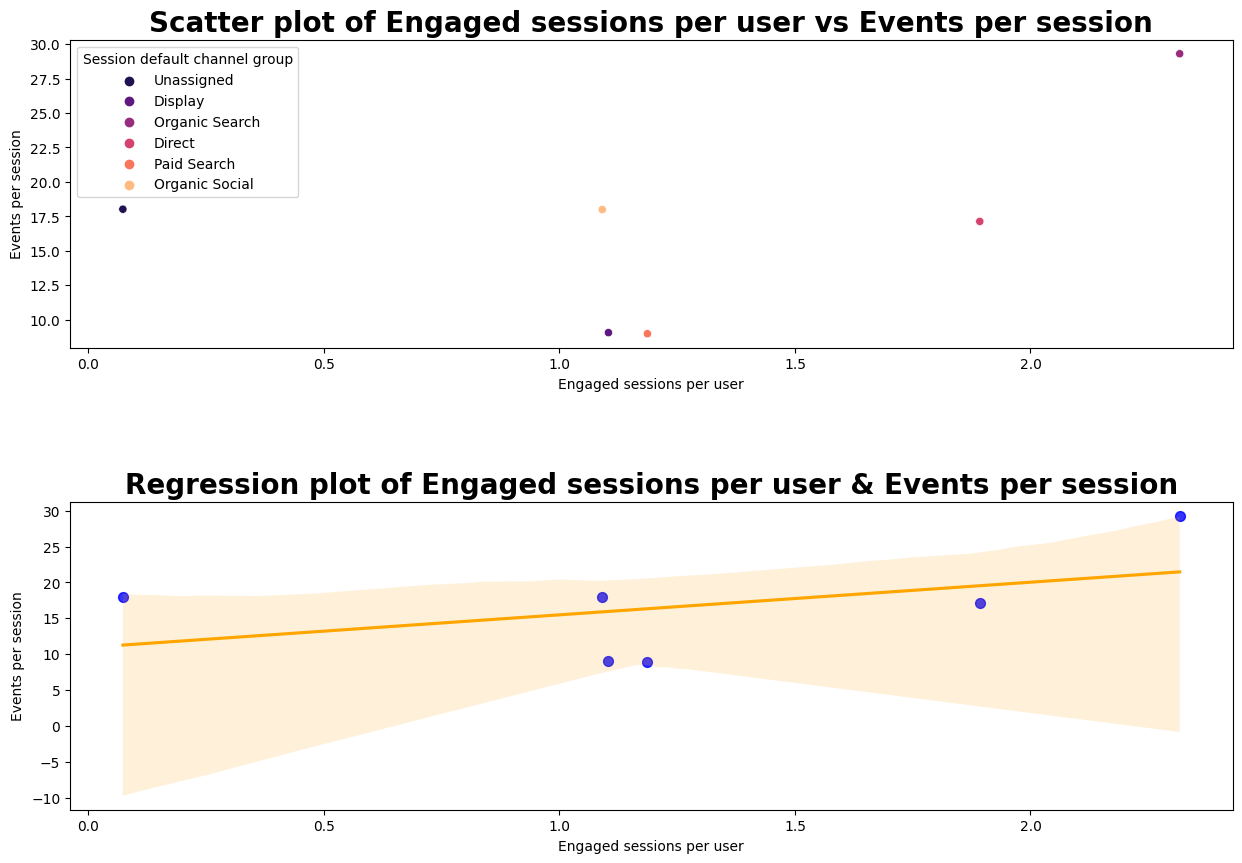

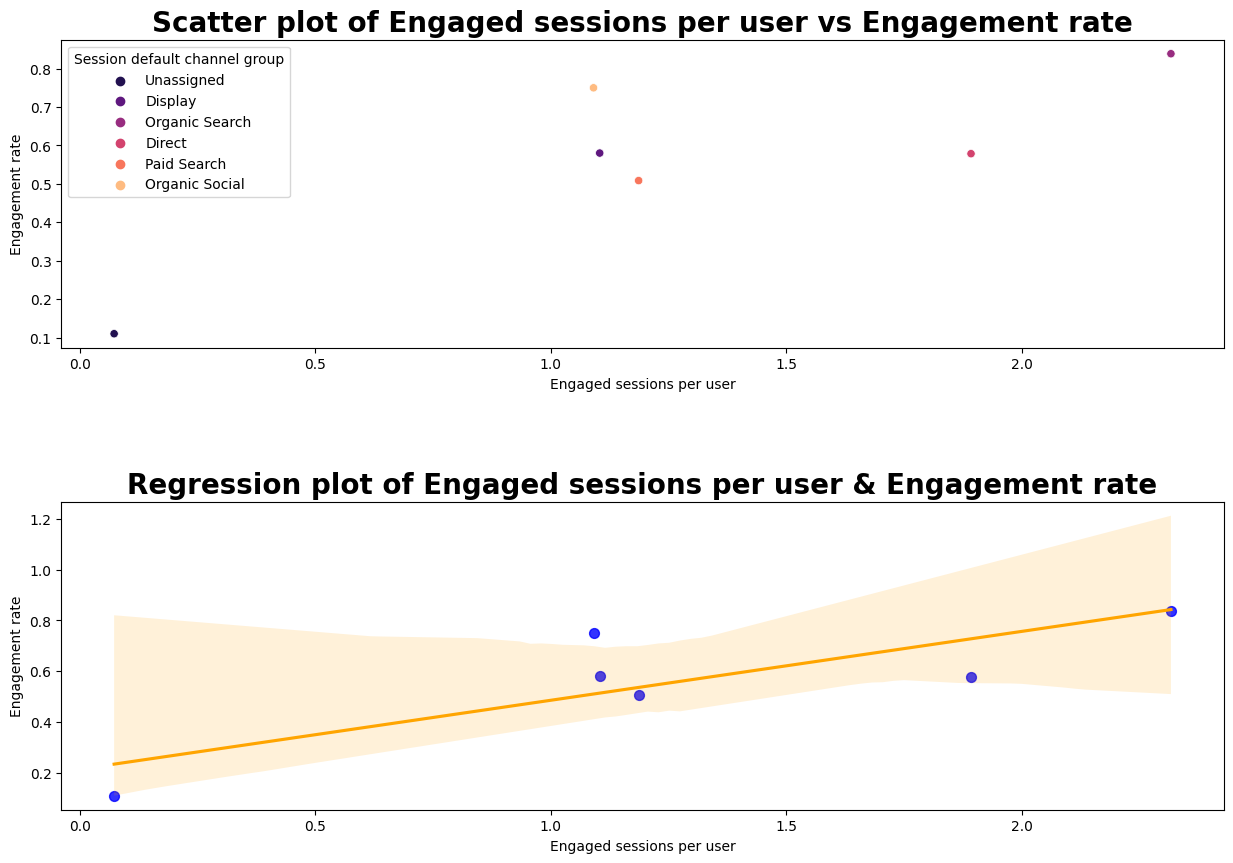

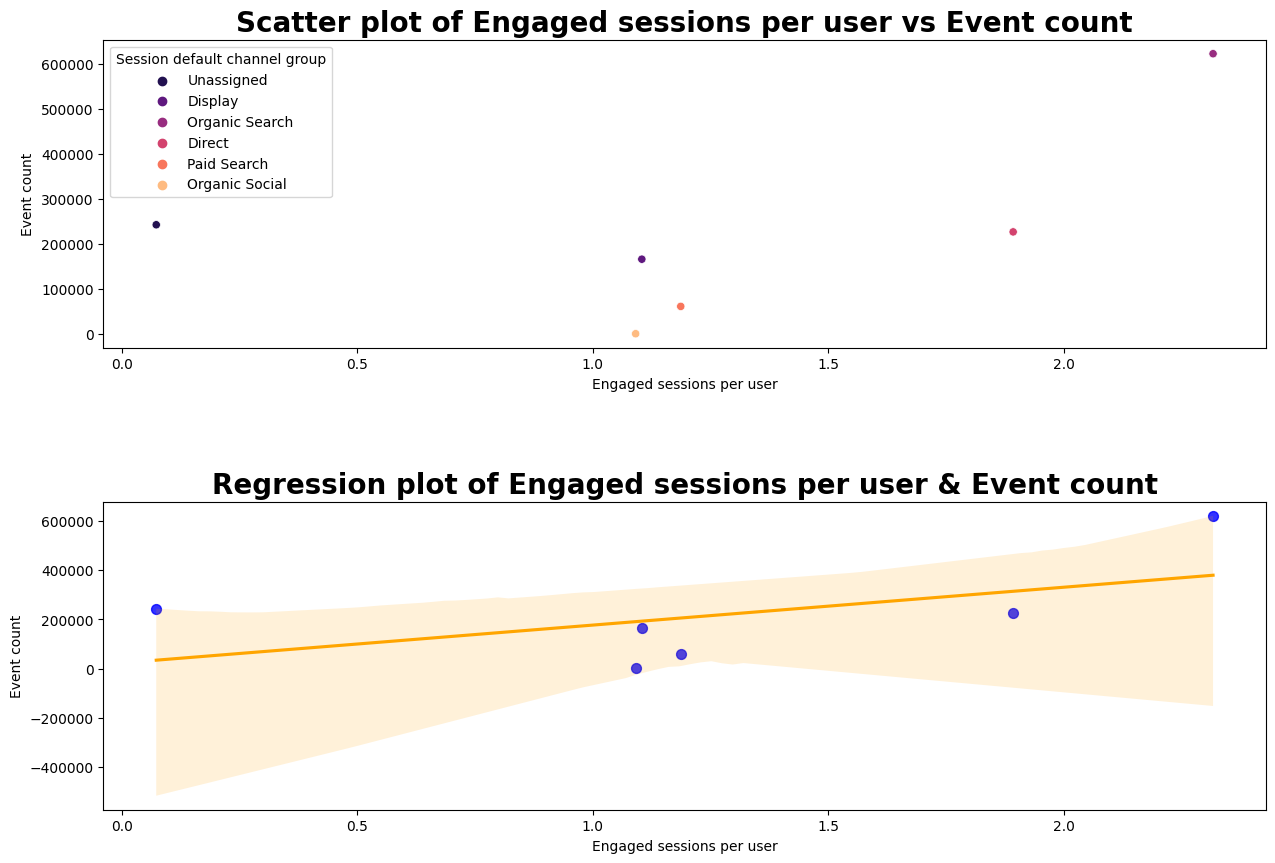

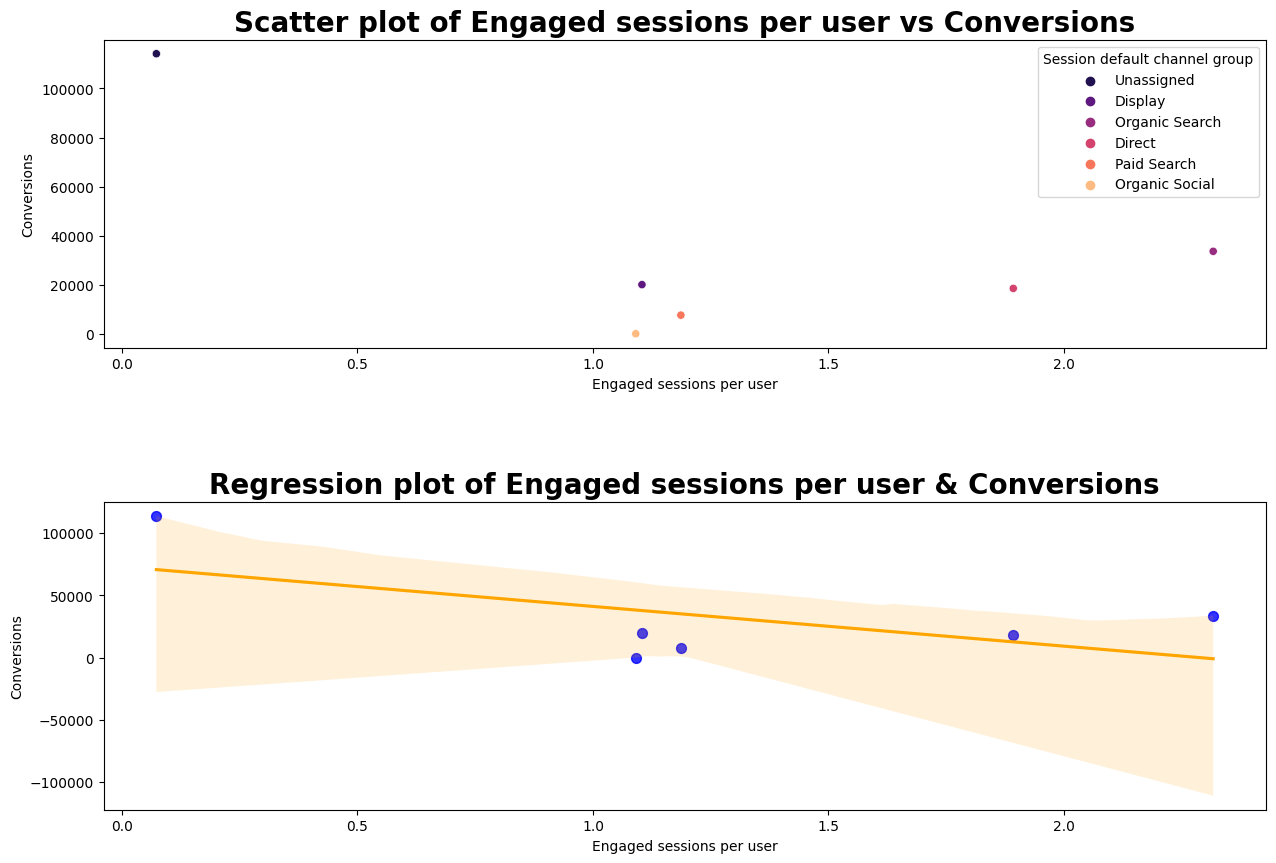

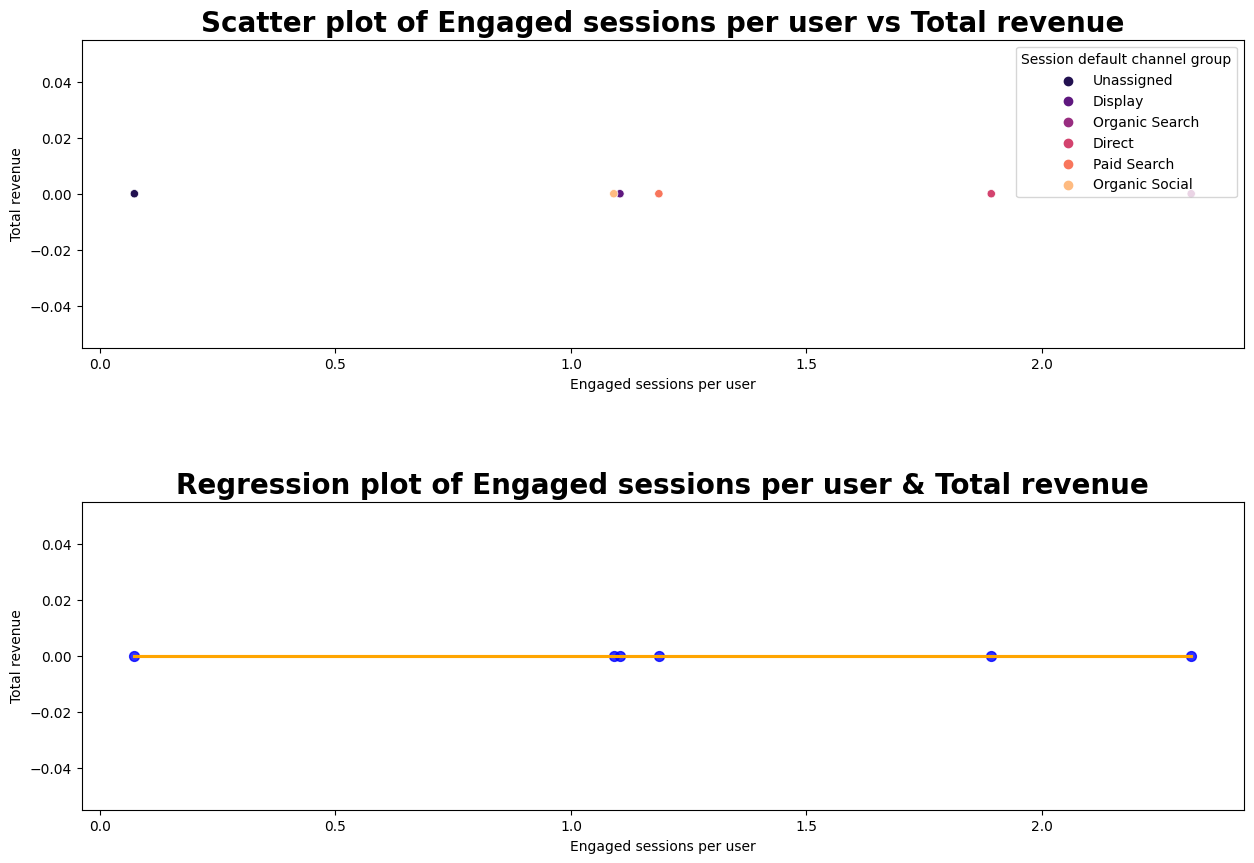

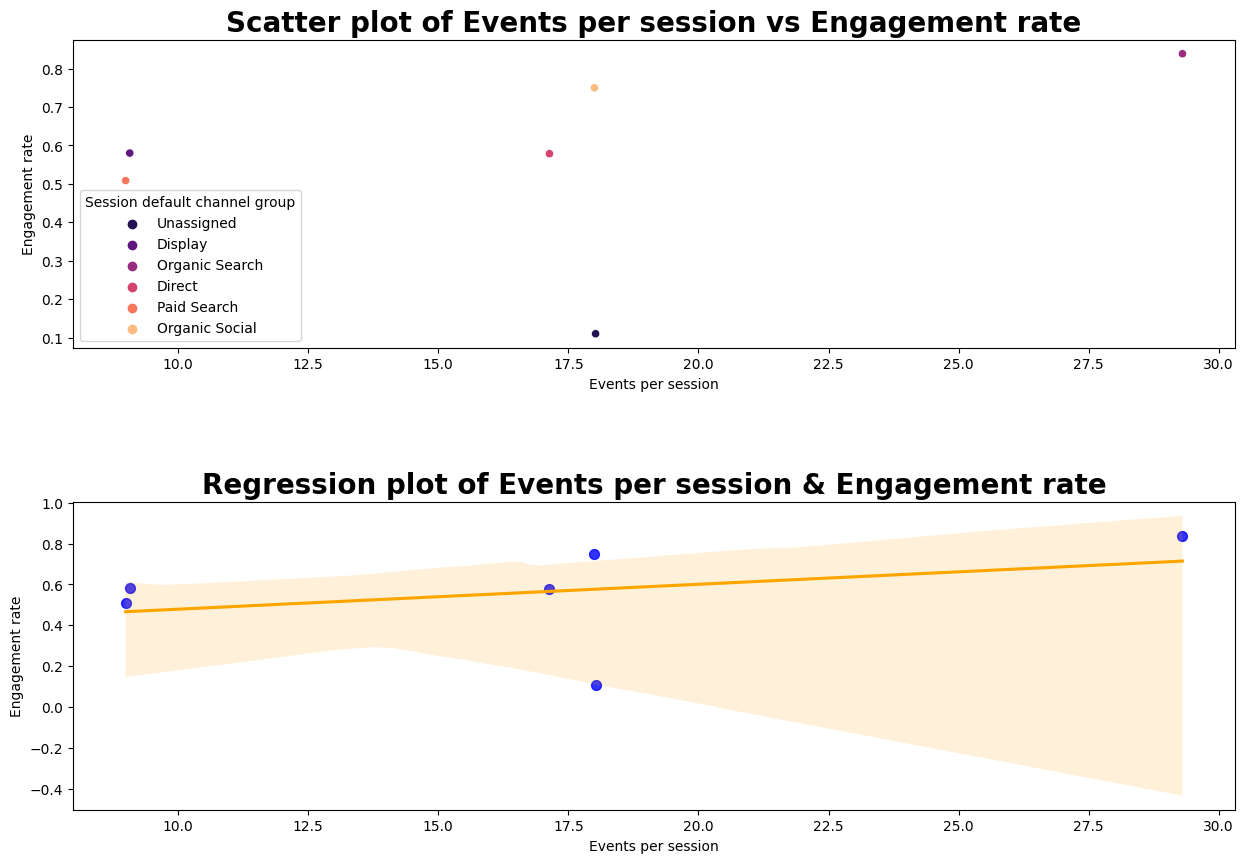

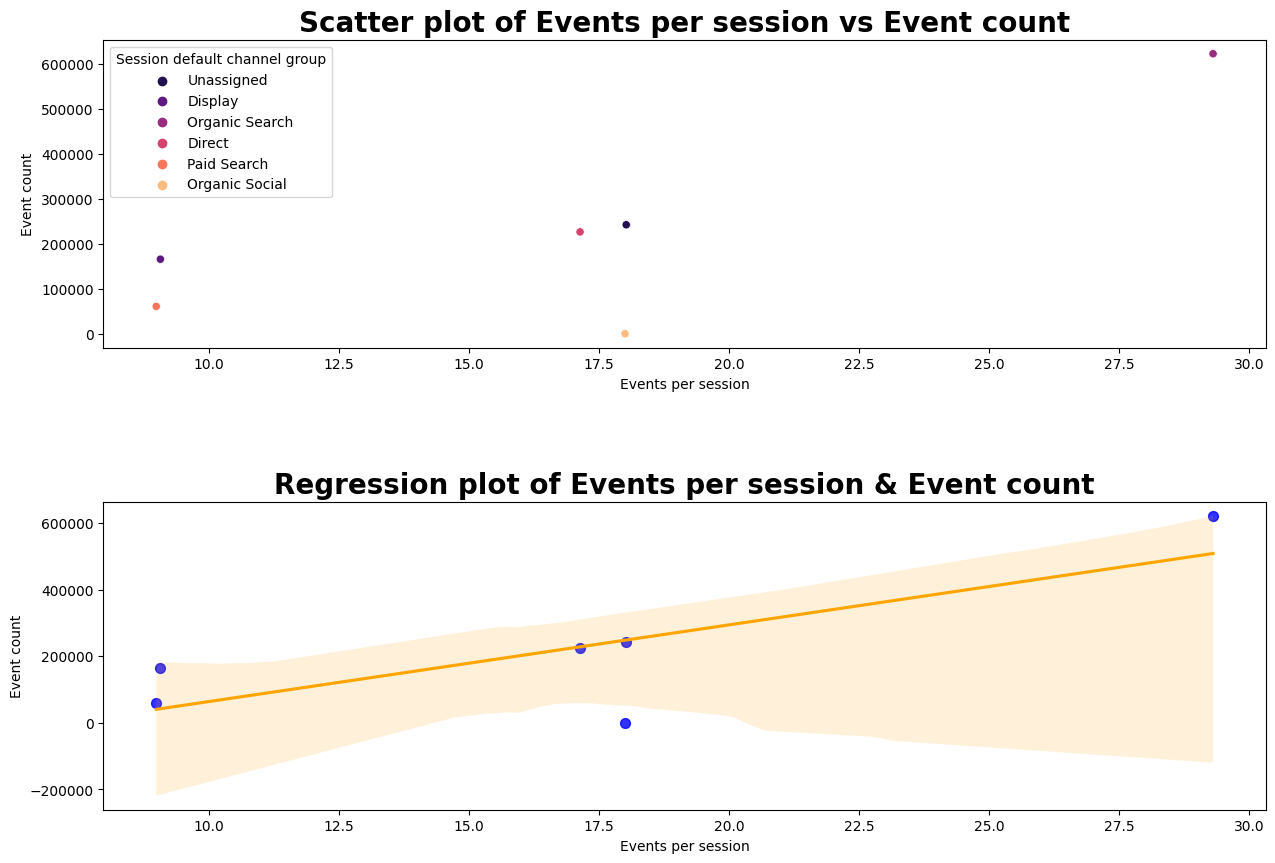

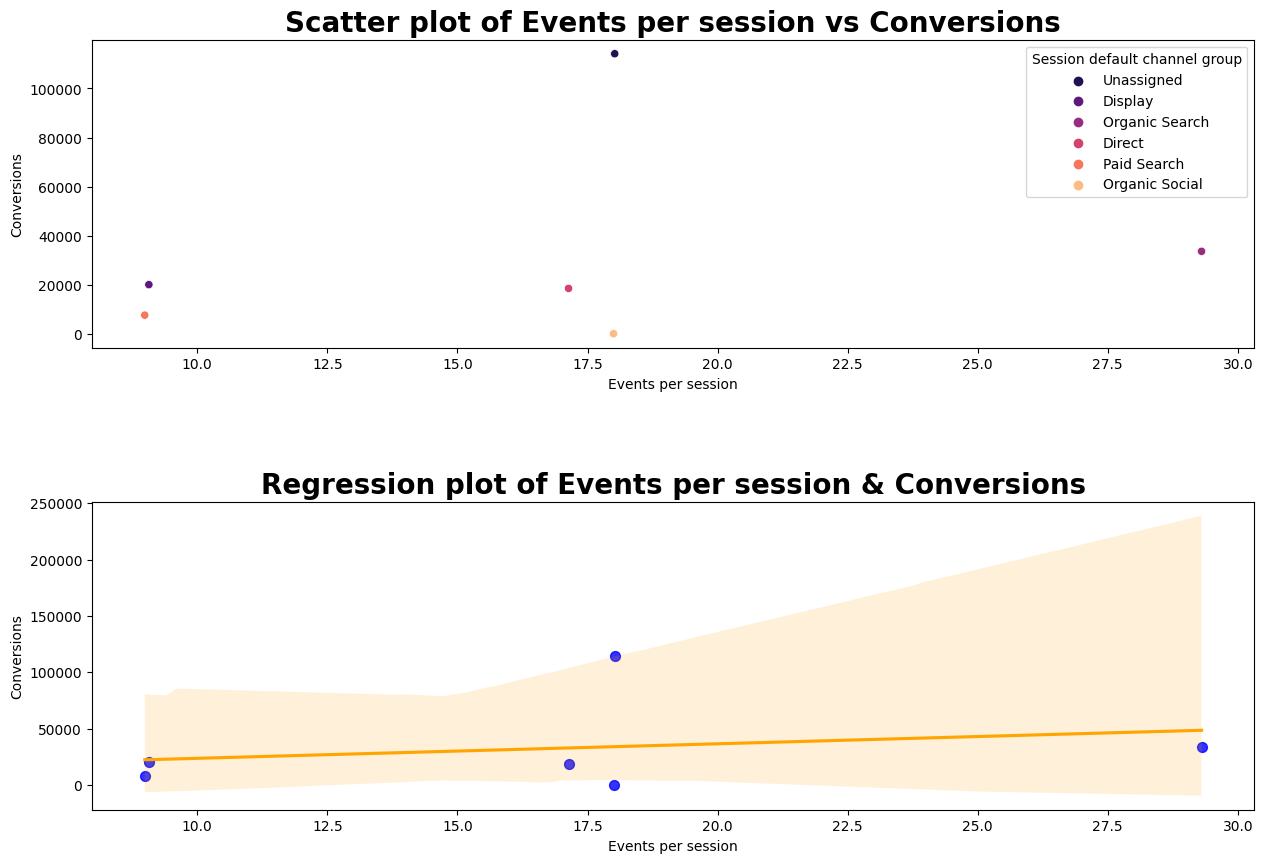

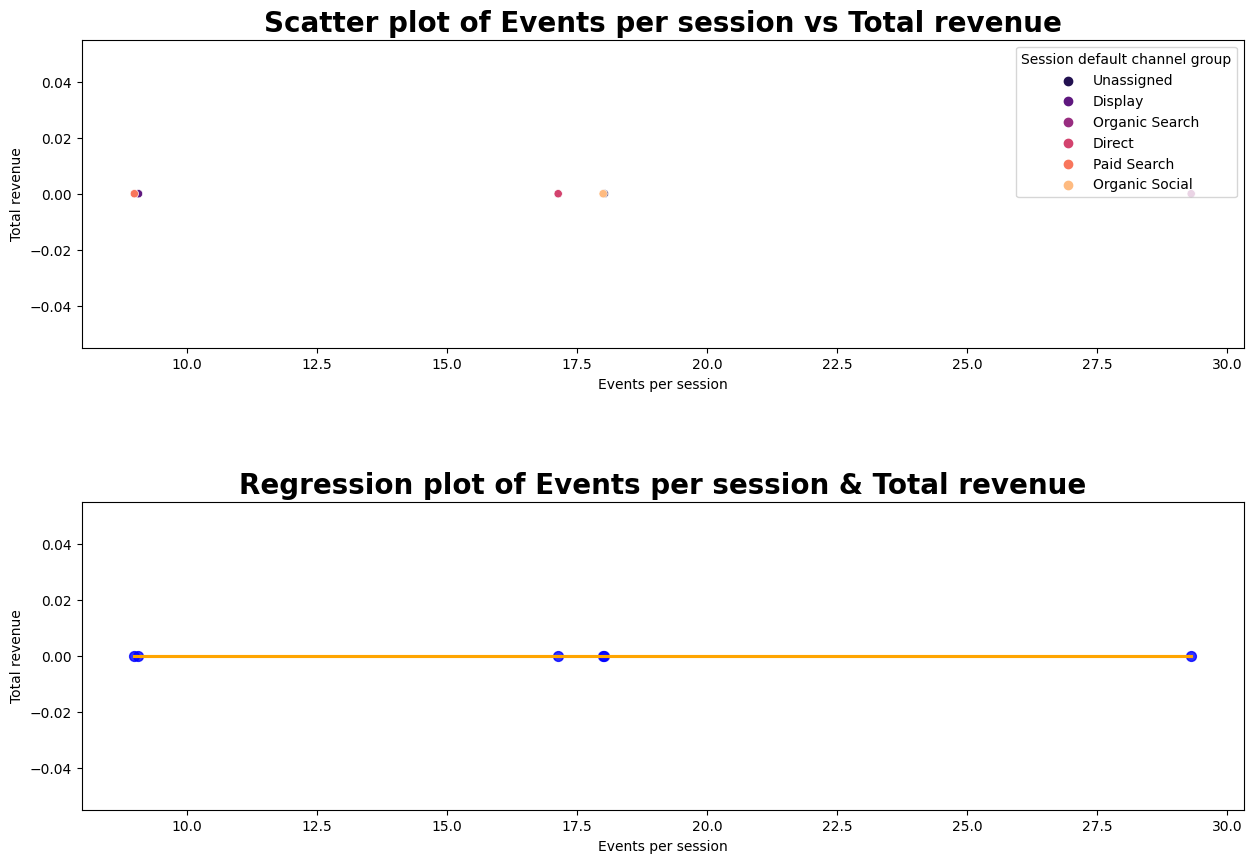

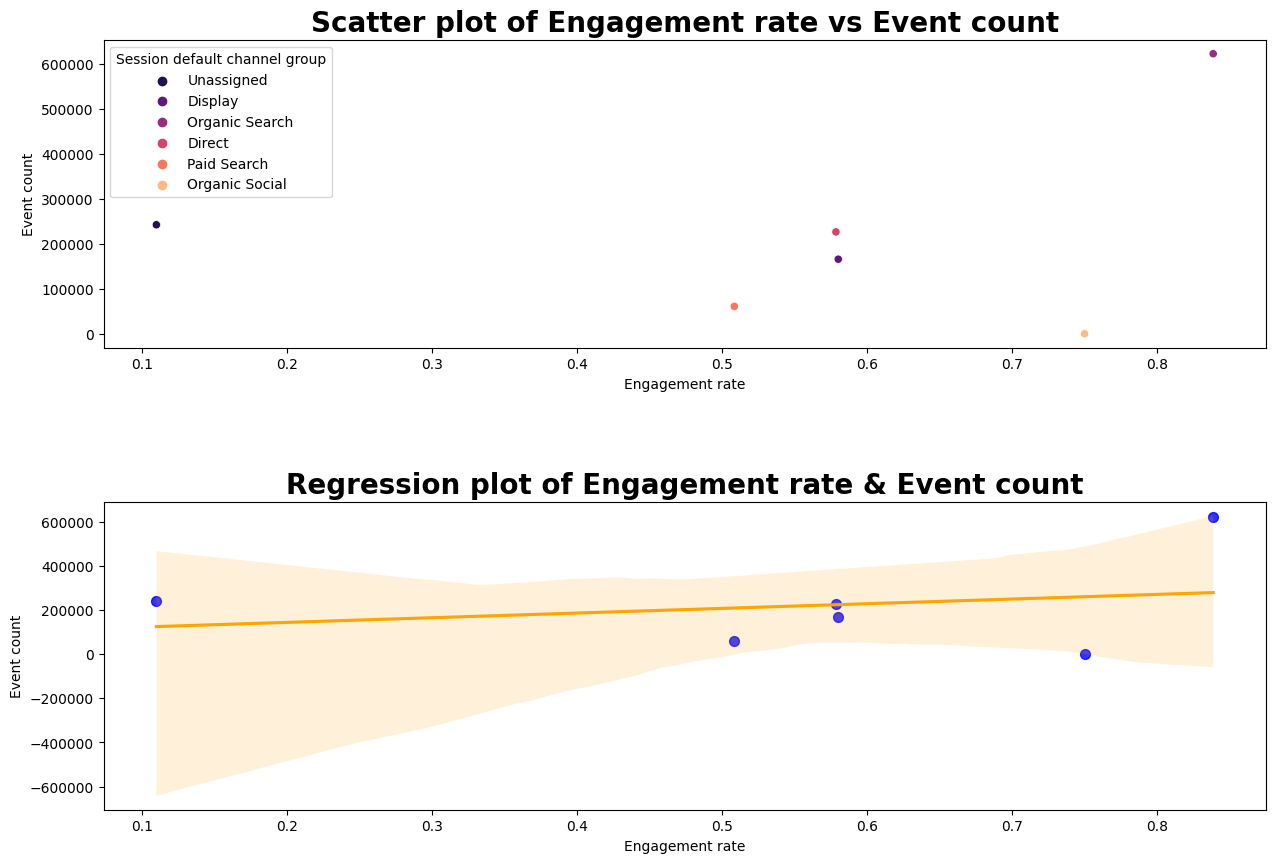

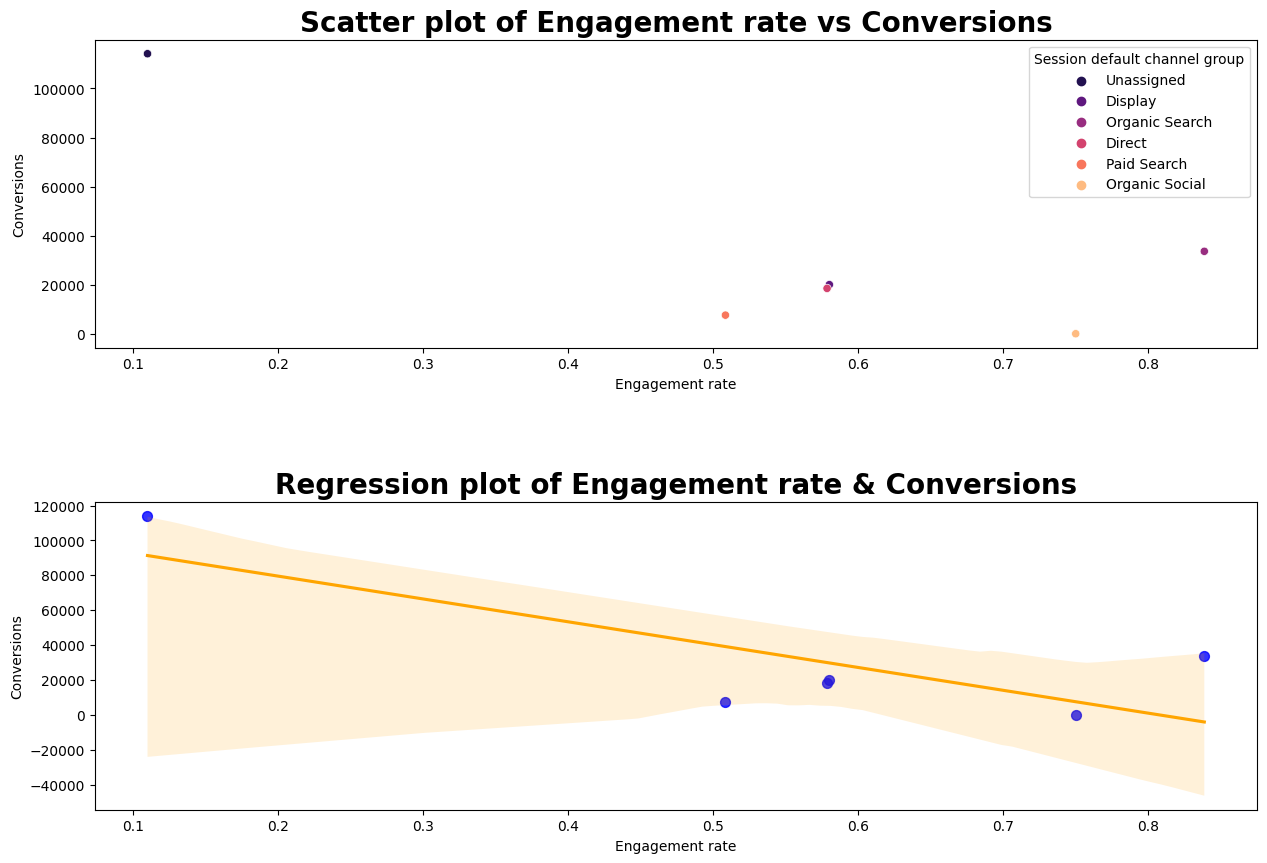

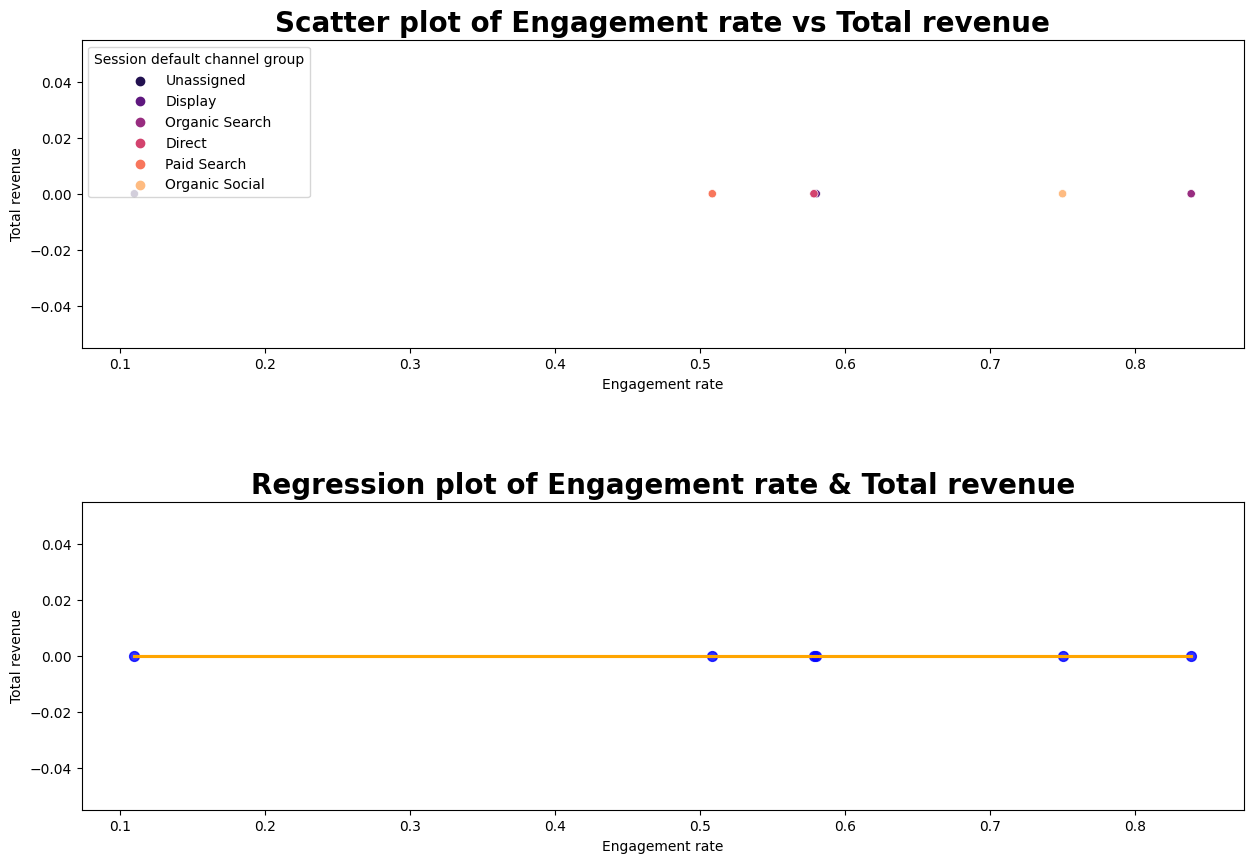

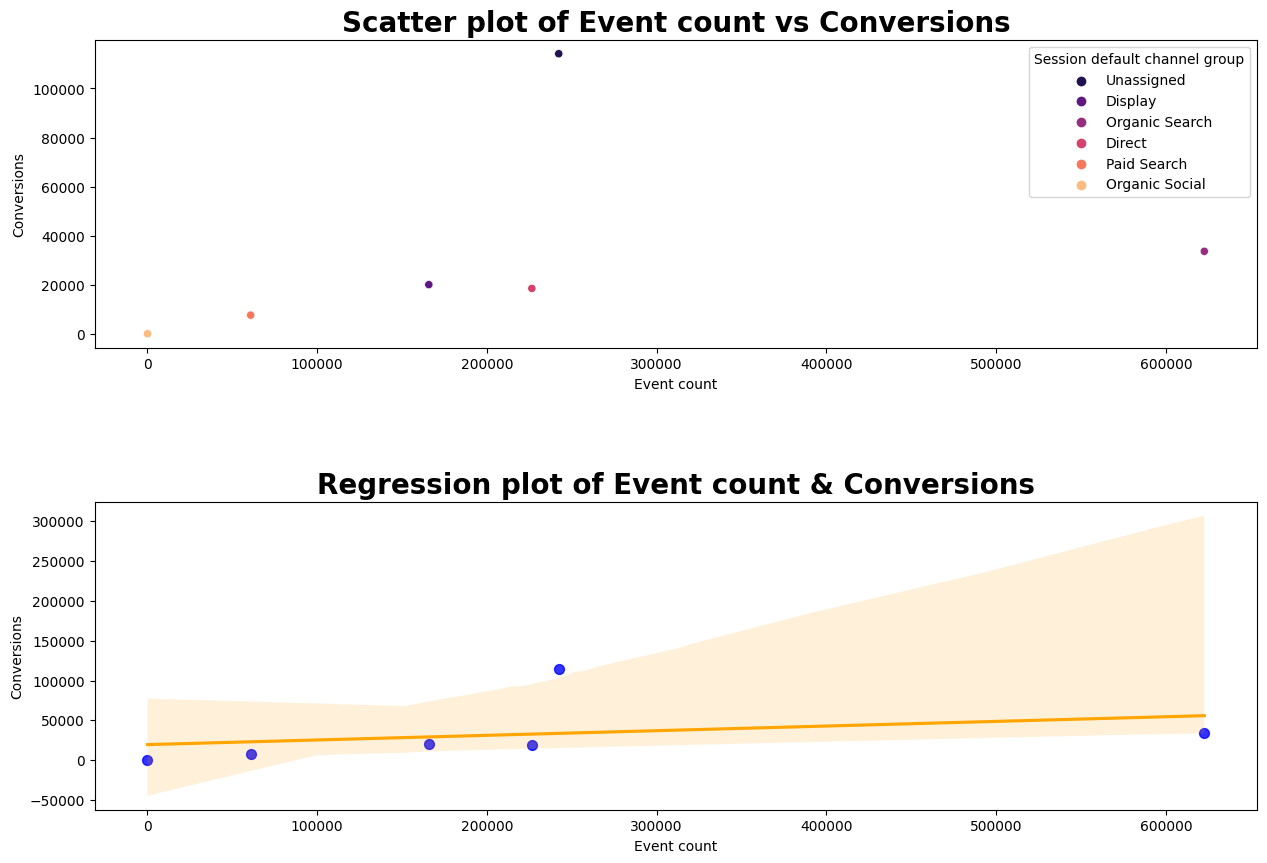

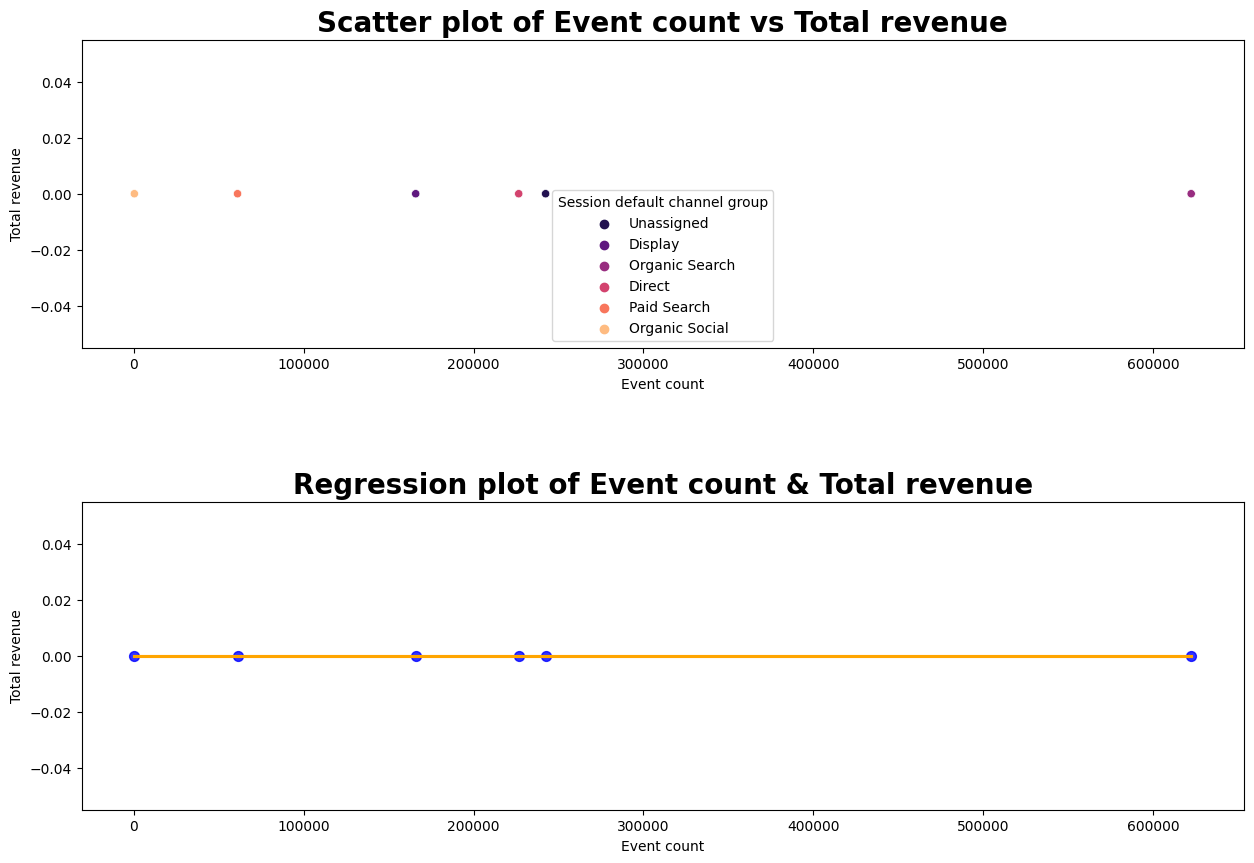

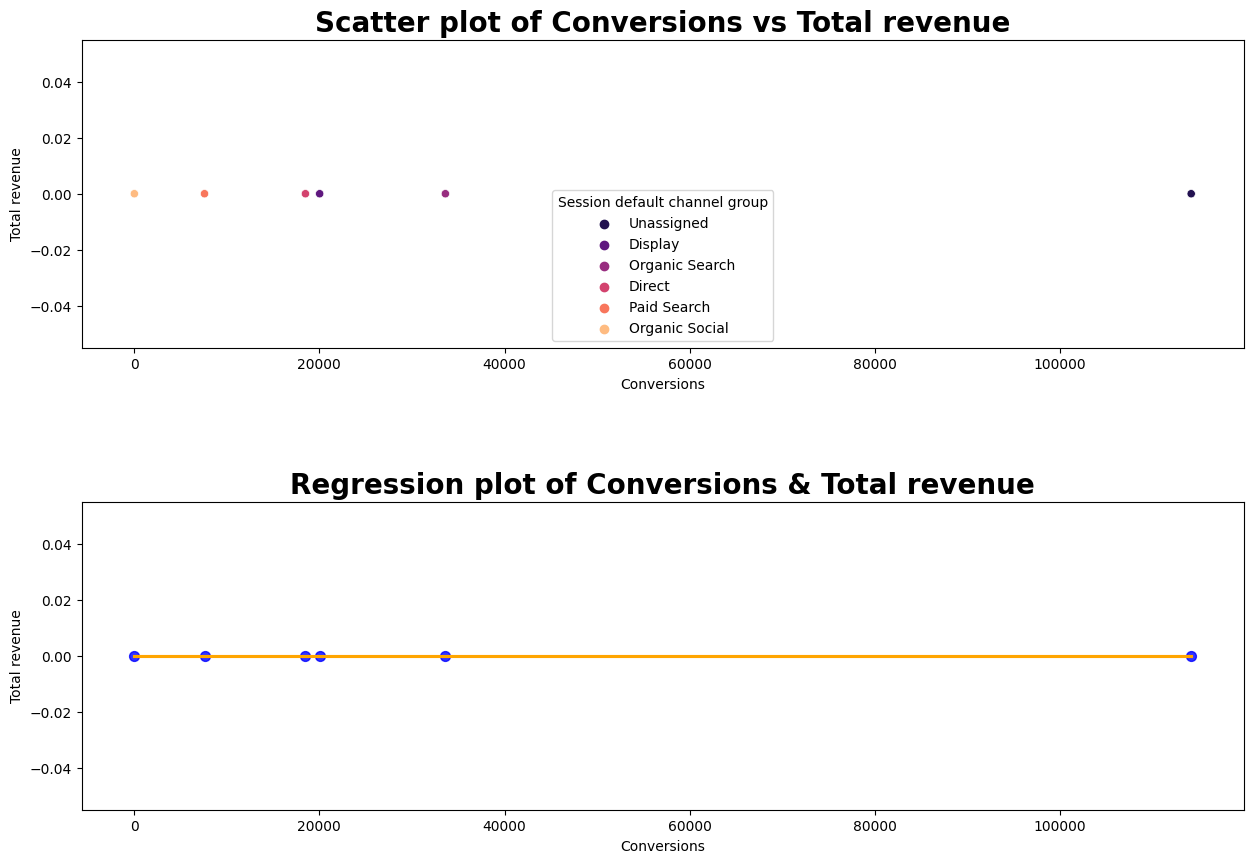

In [311]:
for x in combis:
  scatter_and_reg_plots(data_traffic_aqs,'Session default channel group',x[0],x[1])

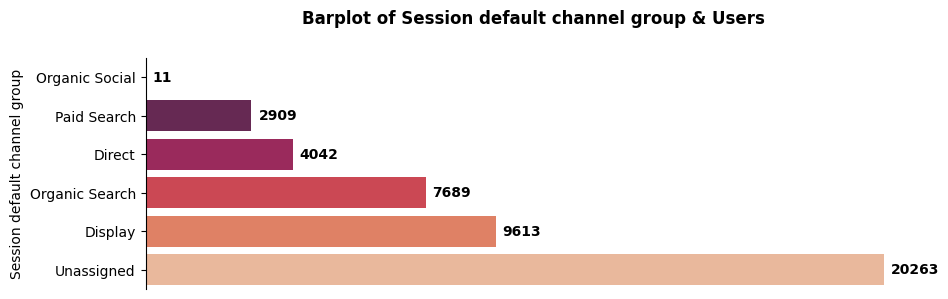

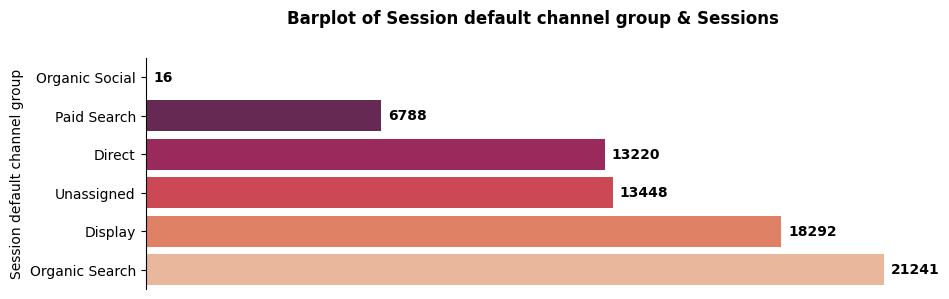

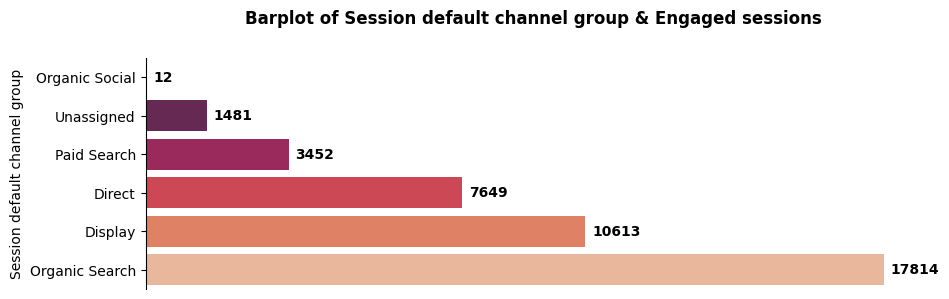

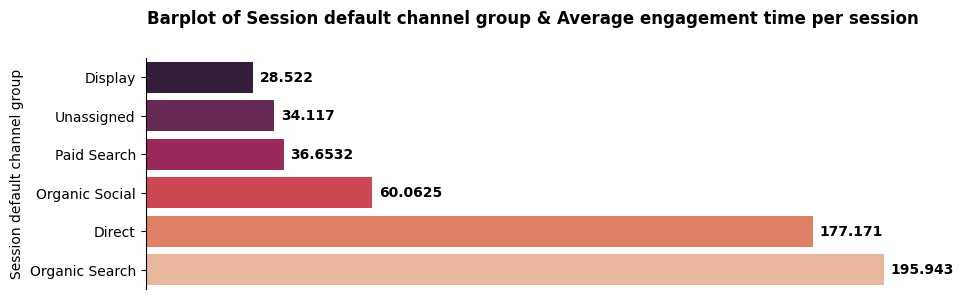

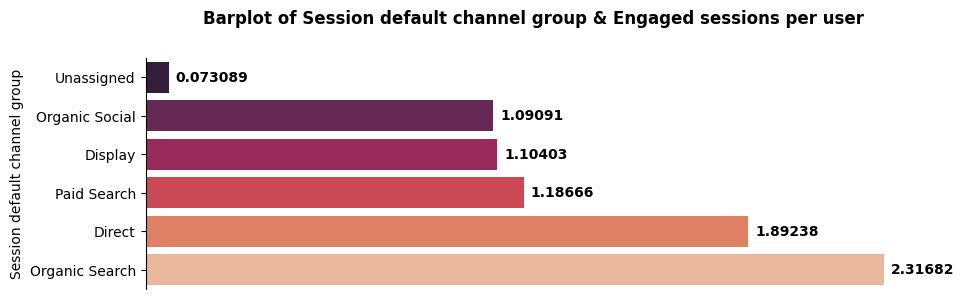

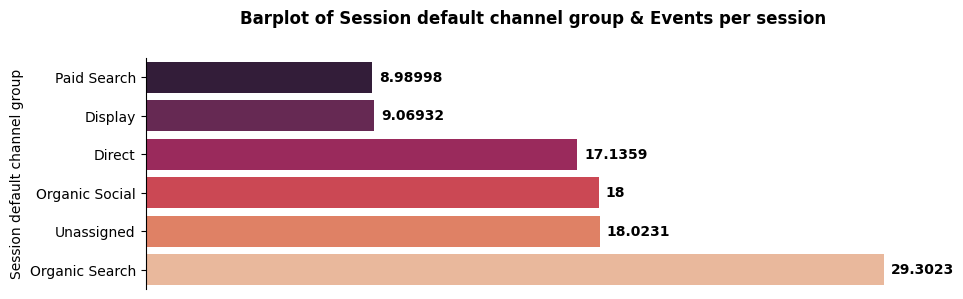

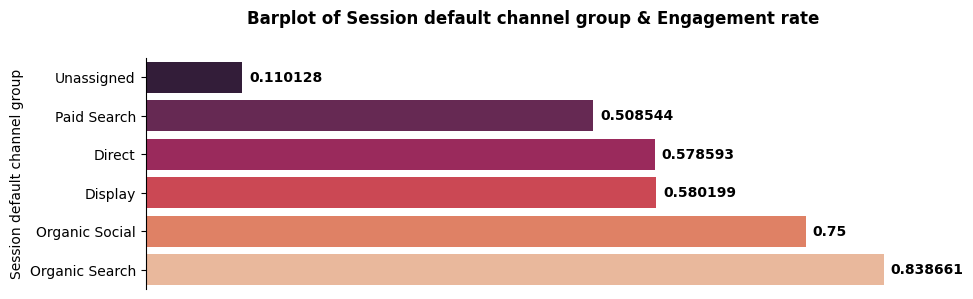

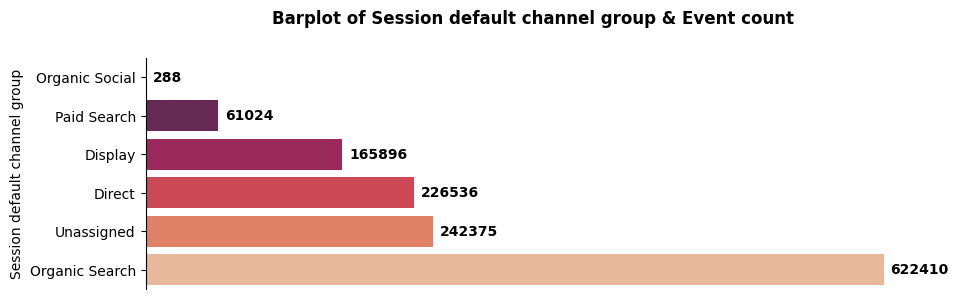

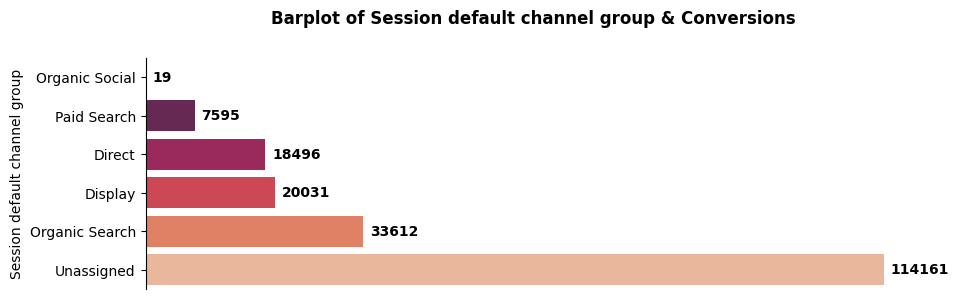

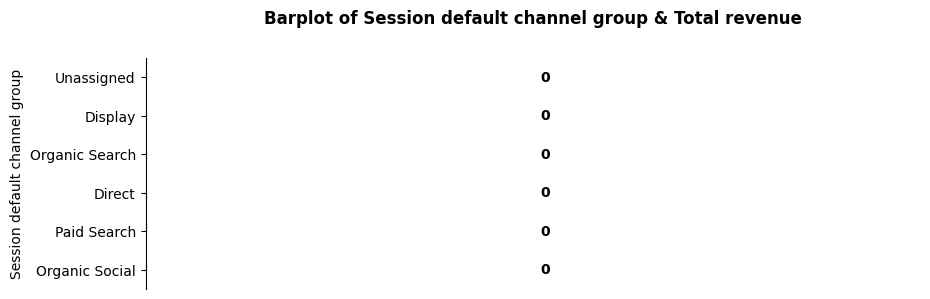

In [318]:
for x in numeric_cols:
  bar_plot(data_traffic_aqs,x,"Session default channel group")

In [321]:
correlation_matrix=data_traffic_aqs[numeric_cols[0:-2]].corr()

In [322]:
correlation_matrix

Users  Sessions  Engaged sessions  \
Users                                1.000000  0.516443          0.023209   
Sessions                             0.516443  1.000000          0.845102   
Engaged sessions                     0.023209  0.845102          1.000000   
Average engagement time per session -0.238669  0.422980          0.659011   
Engaged sessions per user           -0.573267  0.342450          0.749280   
Events per session                   0.101945  0.329705          0.481134   
Engagement rate                     -0.761850  0.006512          0.526670   
Event count                          0.332103  0.813759          0.842222   

                                     Average engagement time per session  \
Users                                                          -0.238669   
Sessions                                                        0.422980   
Engaged sessions                                                0.659011   
Average engagement time per session                             1.000000   
Engaged sessions per user                                       0.850616   
Events per session                                              0.745376   
Engagement rate                                                 0.537069   
Event count                                                     0.719141   

                                     Engaged sessions per user  \
Users                                                -0.573267   
Sessions                                              0.342450   
Engaged sessions                                      0.749280   
Average engagement time per session                   0.850616   
Engaged sessions per user                             1.000000   
Events per session                                    0.468970   
Engagement rate                                       0.828363   
Event count                                           0.545086   

                                     Events per session  Engagement rate  \
Users                                          0.101945        -0.761850   
Sessions                                       0.329705         0.006512   
Engaged sessions                               0.481134         0.526670   
Average engagement time per session            0.745376         0.537069   
Engaged sessions per user                      0.468970         0.828363   
Events per session                             1.000000         0.360857   
Engagement rate                                0.360857         1.000000   
Event count                                    0.789226         0.244410   

                                     Event count  
Users                                   0.332103  
Sessions                                0.813759  
Engaged sessions                        0.842222  
Average engagement time per session     0.719141  
Engaged sessions per user               0.545086  
Events per session                      0.789226  
Engagement rate                         0.244410  
Event count                             1.000000

<Axes: title={'center': 'Heatmap of correlation score of columns in Traffic acquistion'}>

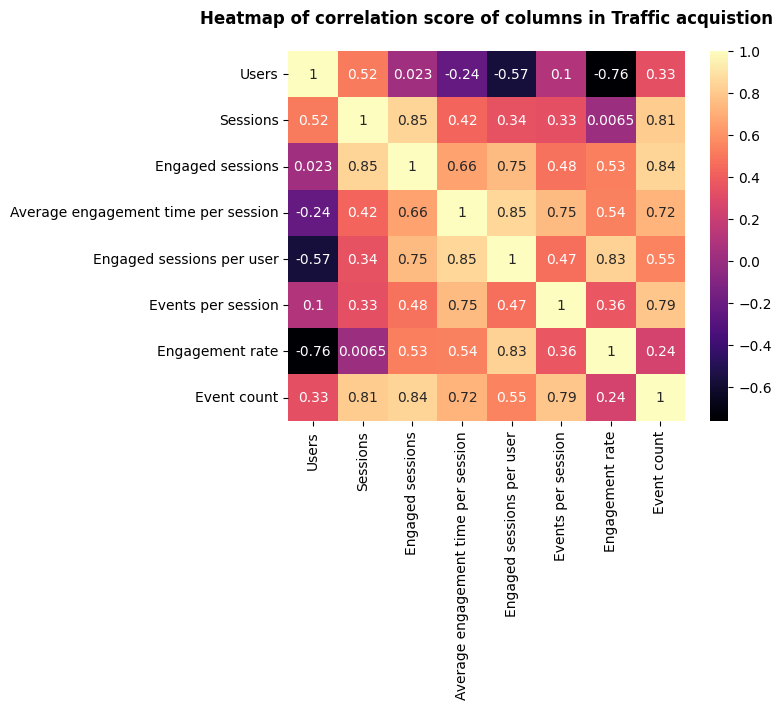

In [324]:
plt.title("Heatmap of correlation score of columns in Traffic acquistion",pad=20,fontweight='bold')
sns.heatmap(data=correlation_matrix,annot=True,cmap='magma')

**Good correlation score is observed between Users & Engagement rate, Sessions & Engaged sessions, Sessions & Event count, Sessions & Event count, Engaged sessions & Engaged sessions per user, Engaged sessions & Event count, Average engagement time per session & Engaged sessions per user, Average engagement time per session & Events per session, Average engagement time per session & Event count, Engaged sessions per user & Engagement rate, Events per session & Average engagement time per session and Events per session & Event count**

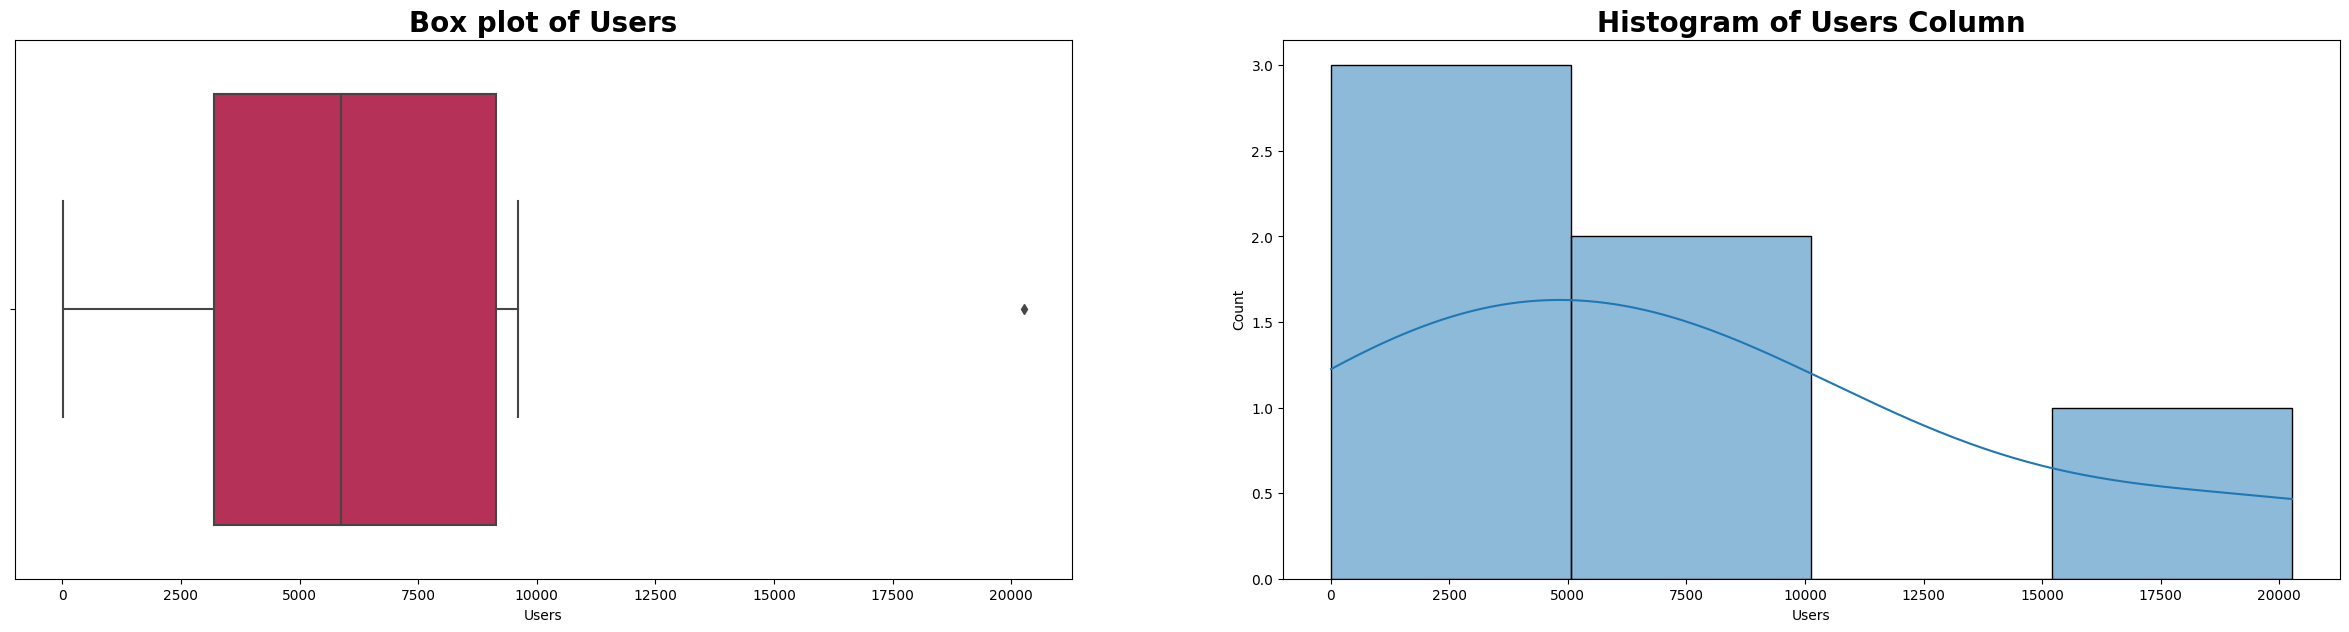

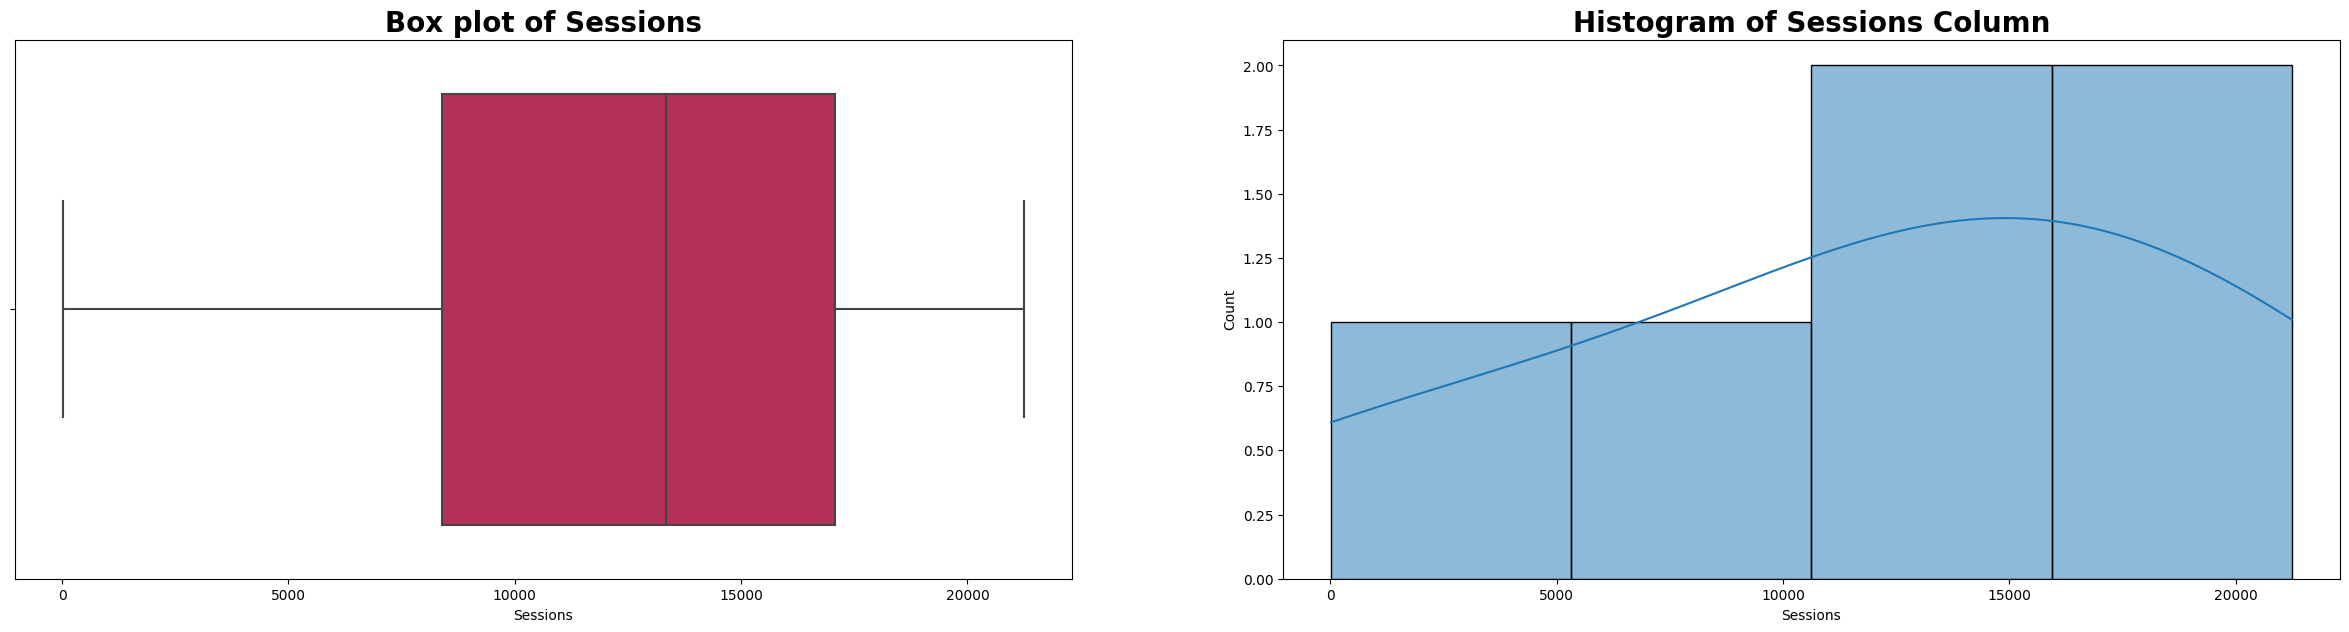

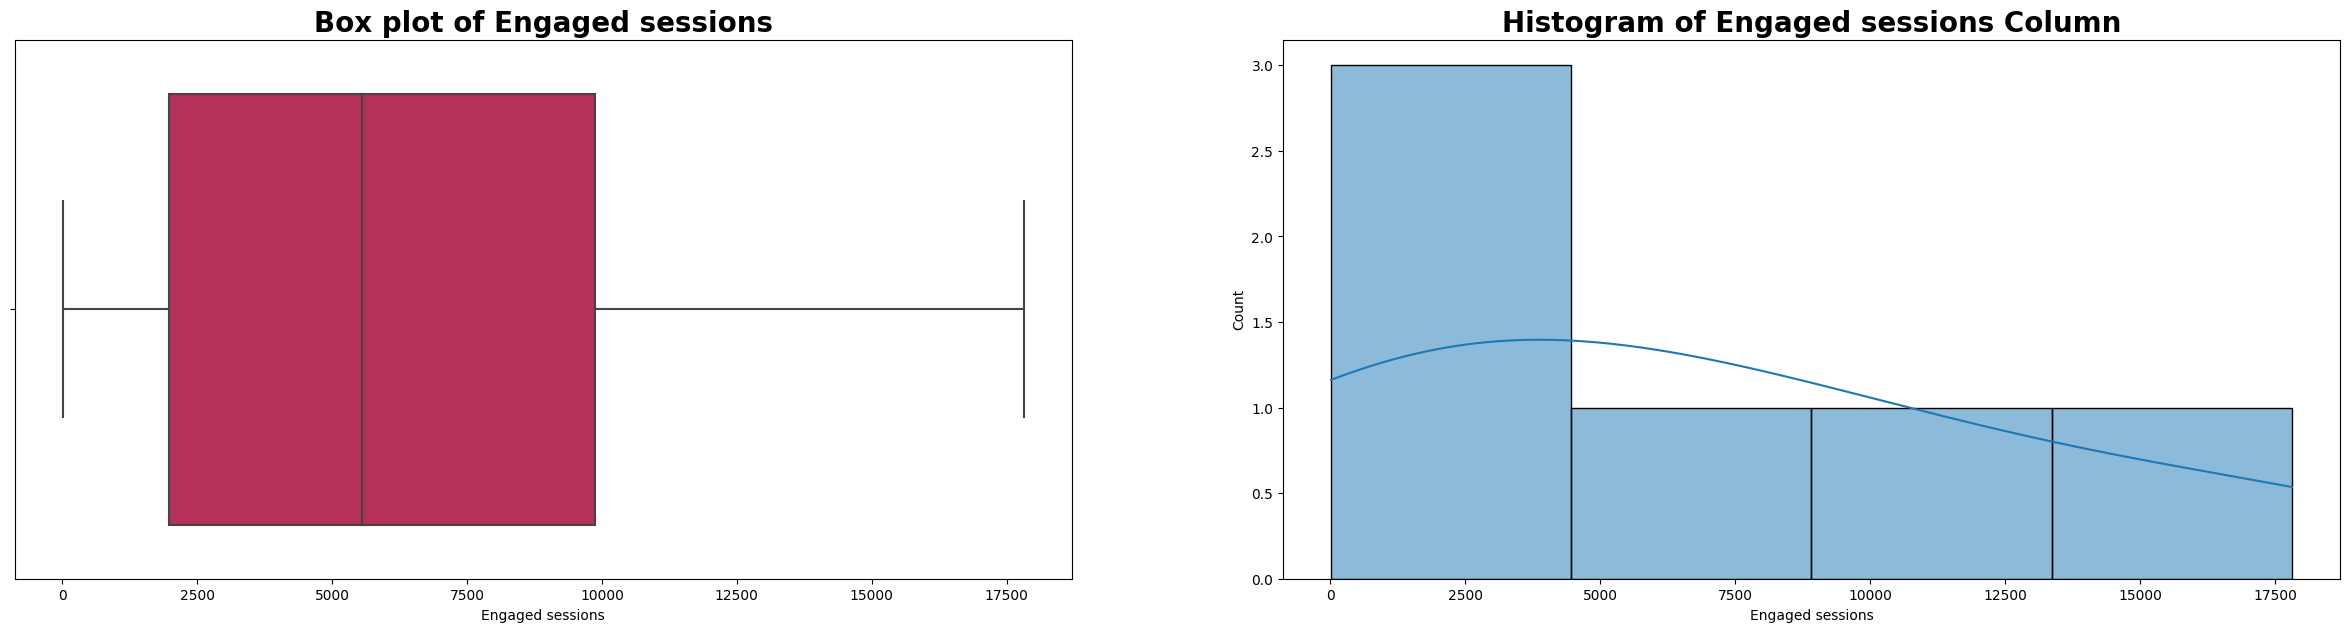

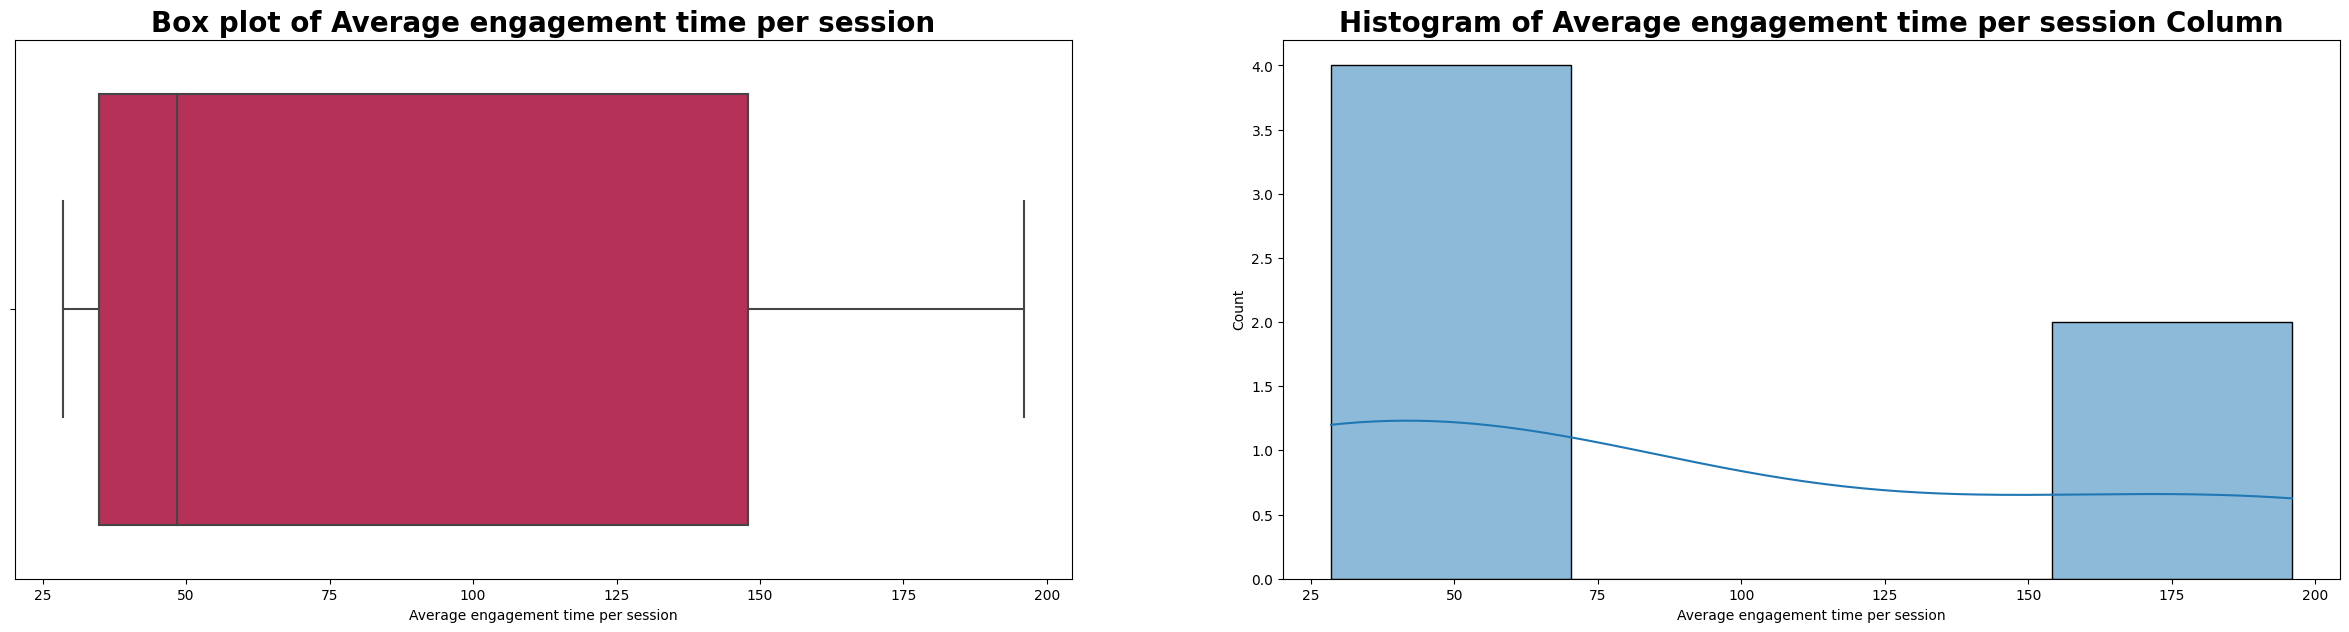

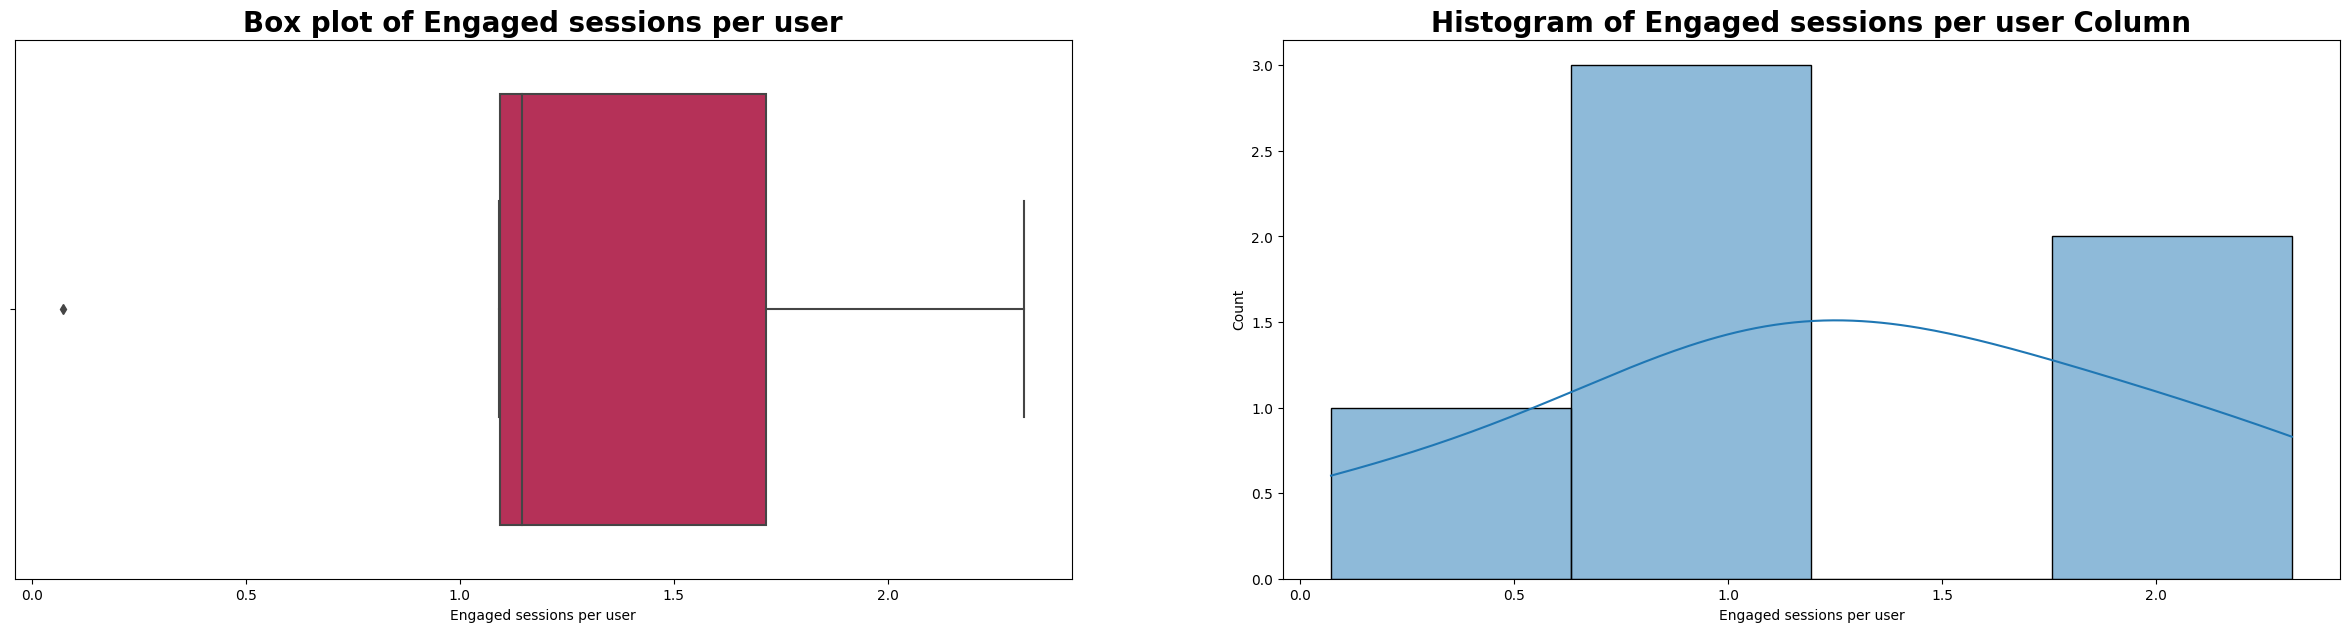

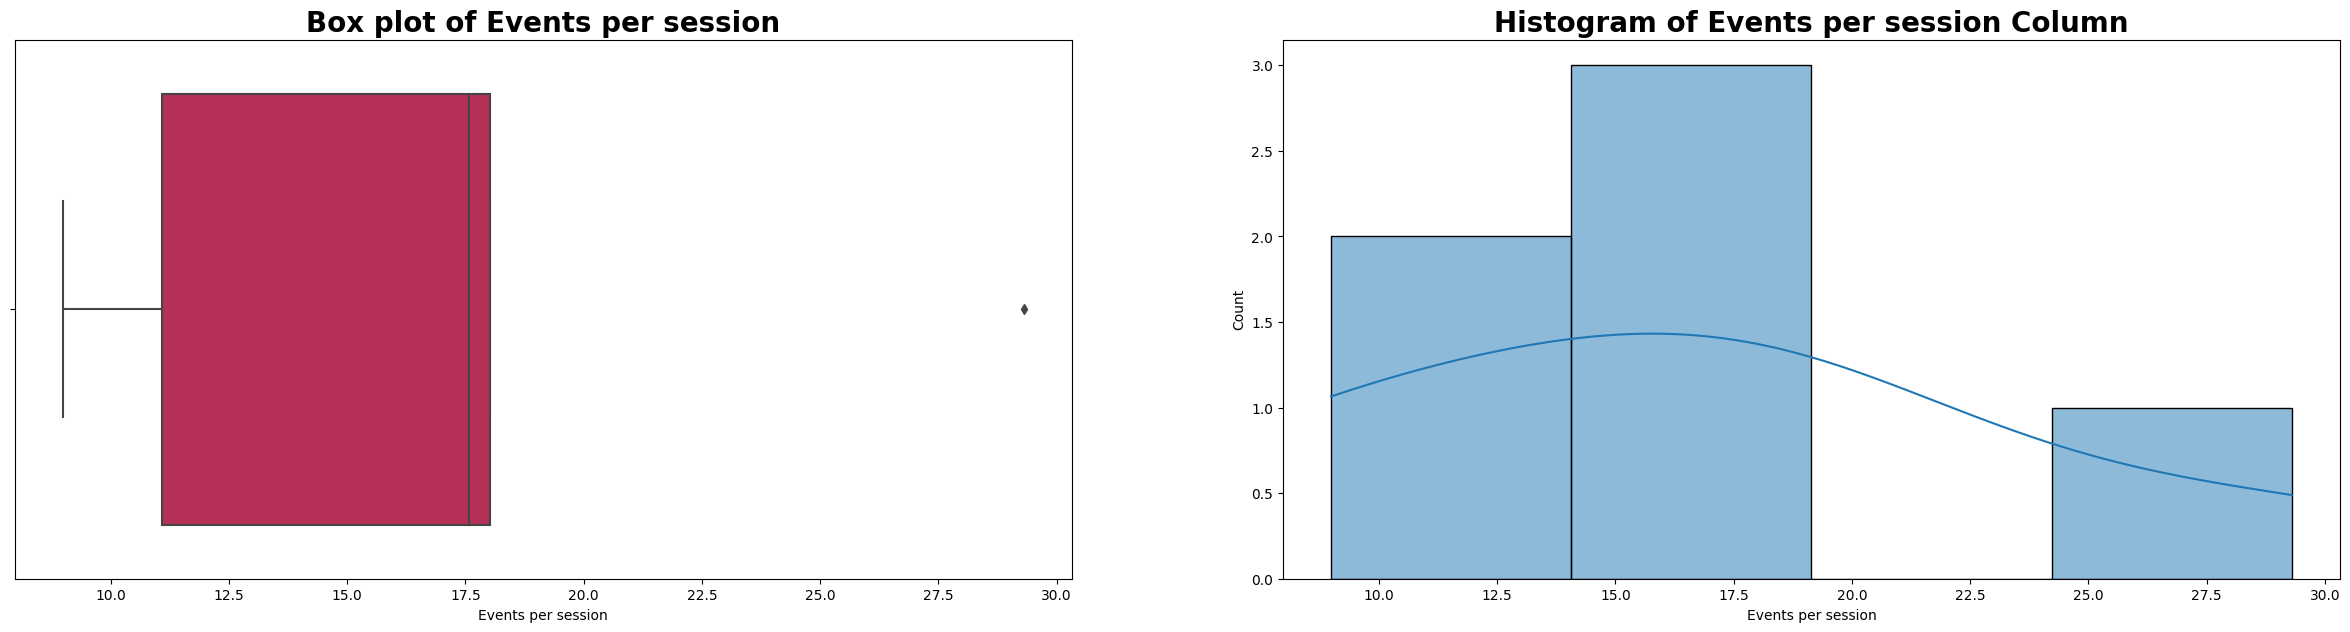

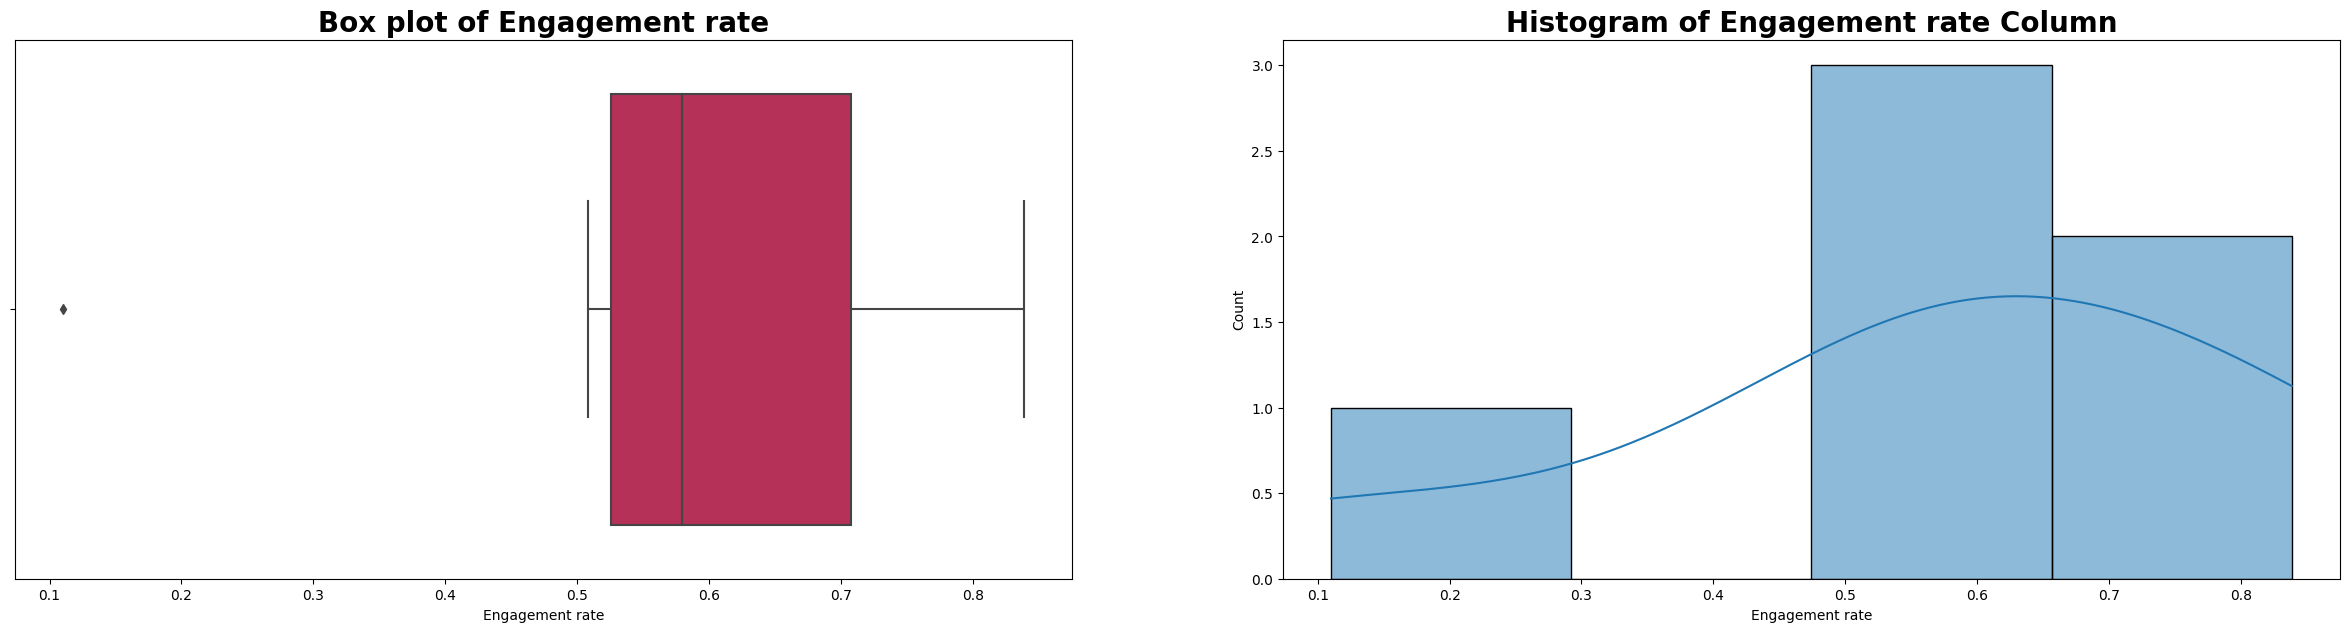

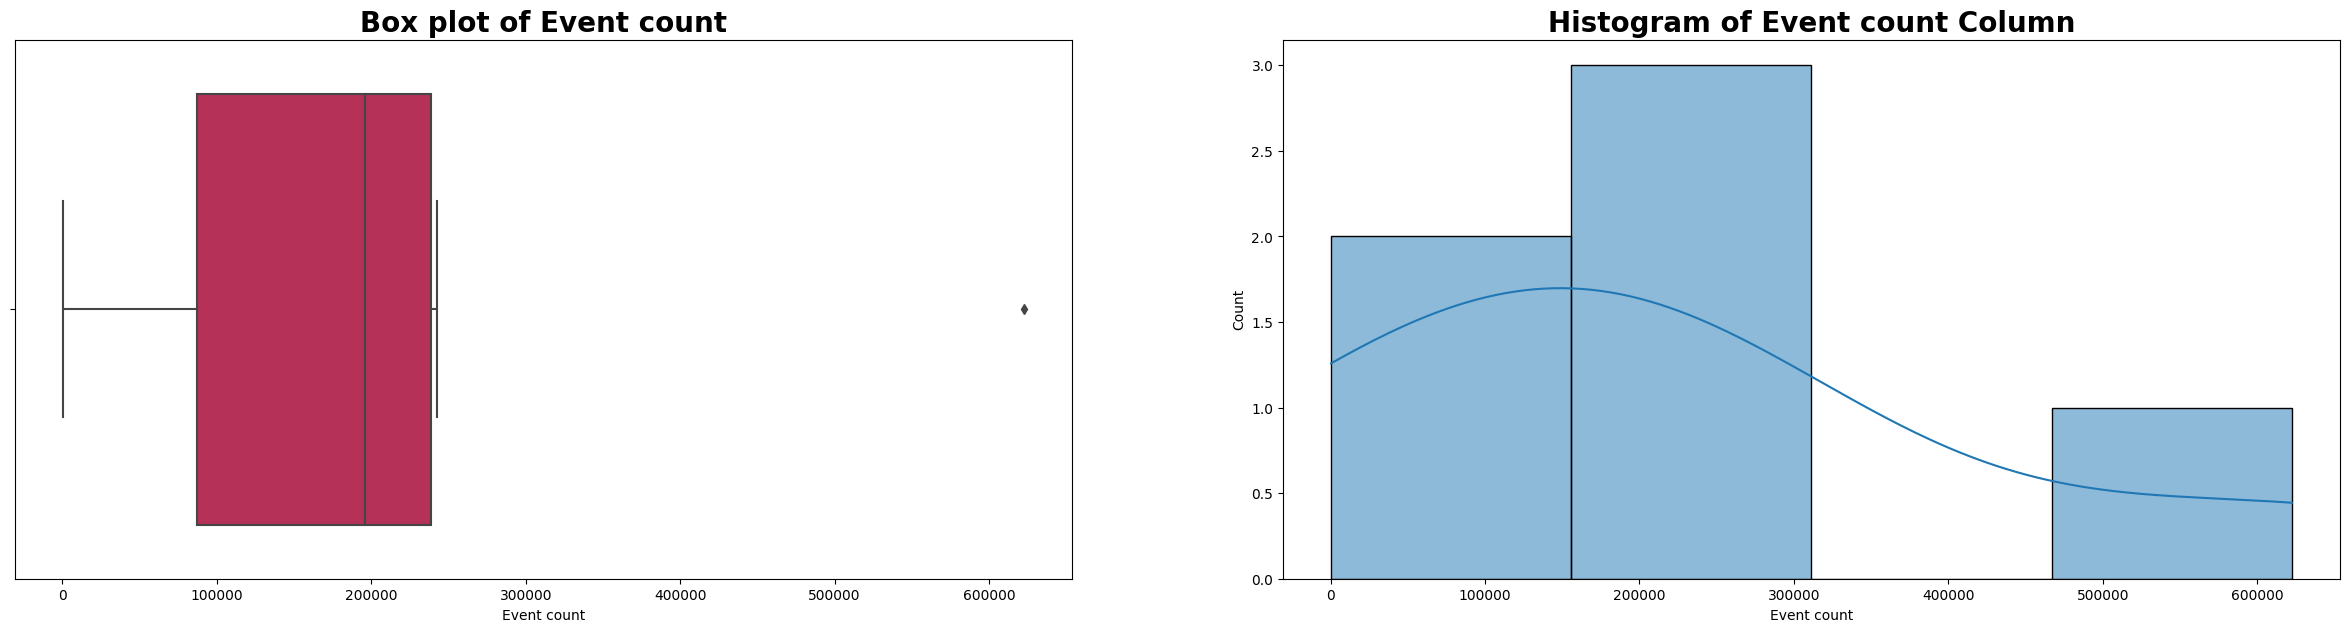

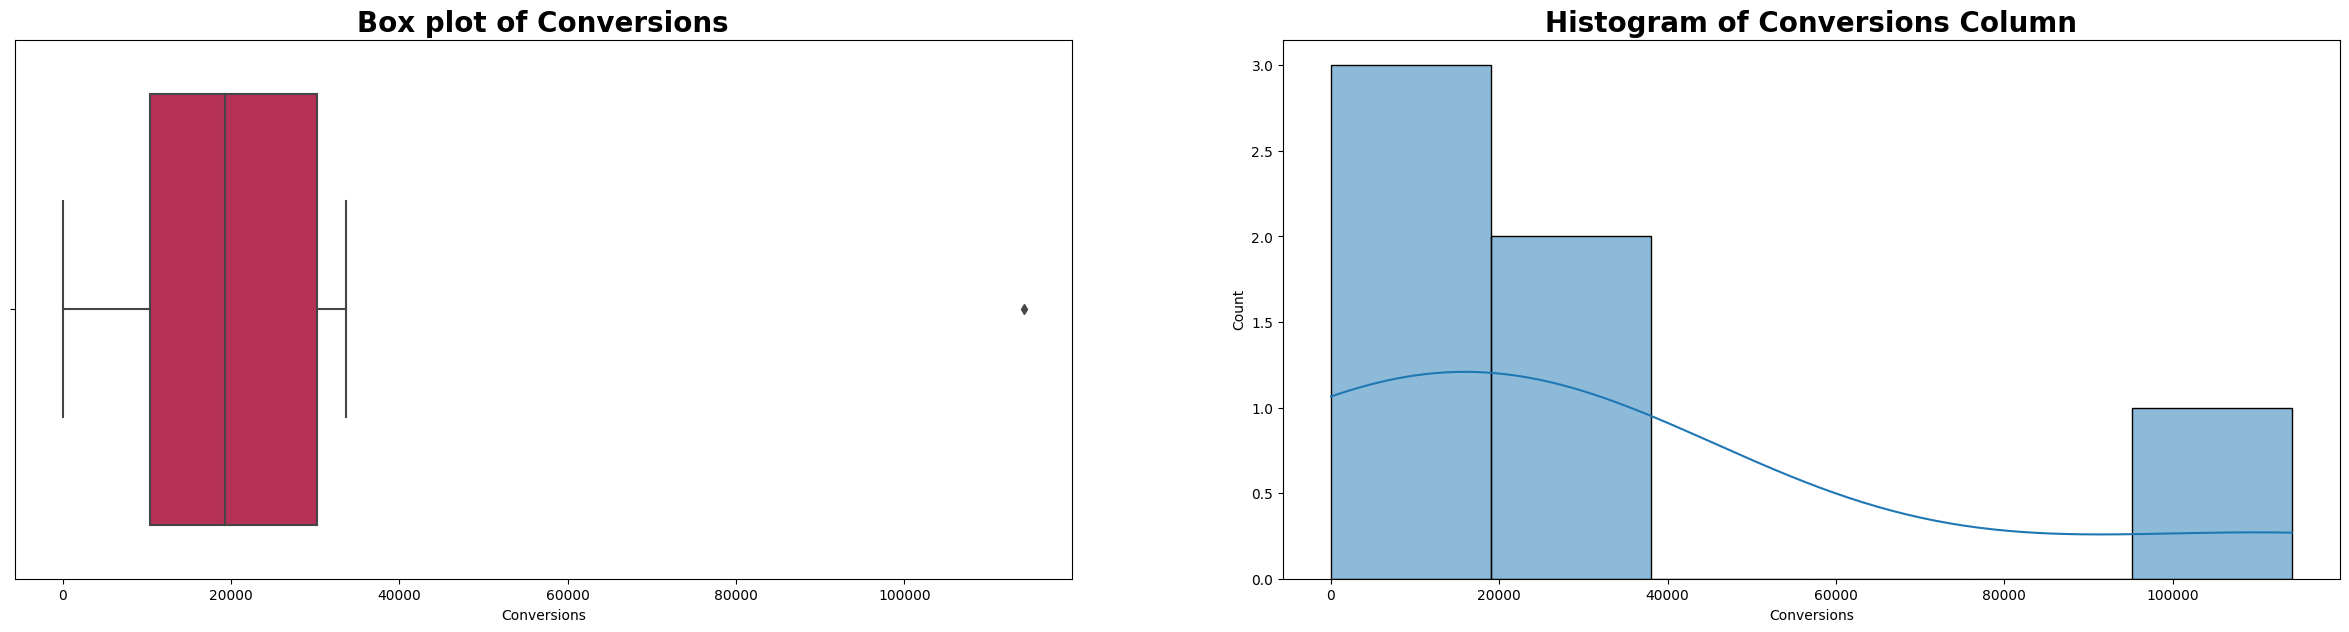

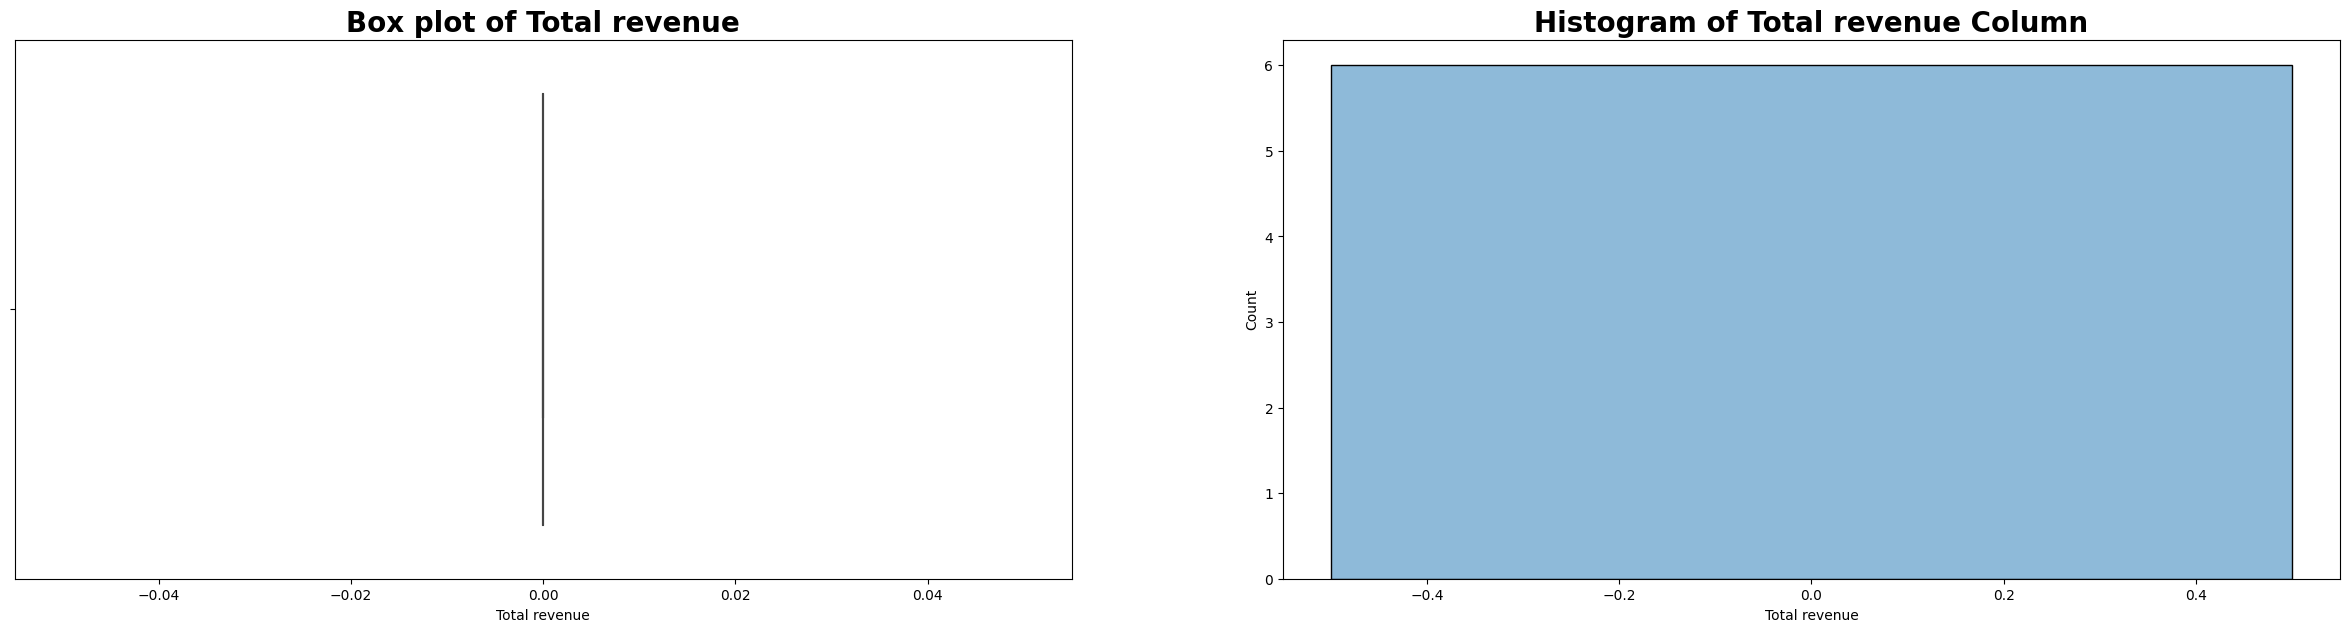

In [327]:
for x in numeric_cols:
  hist_and_box_plots(data_traffic_aqs,x)

**There are outliers in the following columns:** Users, Engaged sessions per user, Events per session, Engagement rate, Event count and Conversions